In [162]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error

In [242]:
train = pd.read_csv(r"C:\Users\tuke-\Desktop\1_GSB544_Computing_and_Machine_Learning\Final\Regression\data\train_new.csv")

train = train.dropna()

train['Yr Sold'] = train['Yr Sold'].astype(object)
train['Year Built'] = train['Year Built'].astype(object)
train['Lot Frontage'] = train['Lot Frontage'].astype('int64')

test = pd.read_csv(r"C:\Users\tuke-\Desktop\1_GSB544_Computing_and_Machine_Learning\Final\Regression\data\test_new.csv")

test = test.dropna()

In [243]:
print(train.dtypes)

SalePrice         int64
PID               int64
Lot Frontage      int64
Lot Area          int64
Street           object
Neighborhood     object
Bldg Type        object
House Style      object
Overall Qual      int64
Overall Cond      int64
Year Built       object
Roof Style       object
Heating          object
Central Air      object
Electrical       object
Full Bath         int64
Half Bath         int64
Bedroom AbvGr     int64
TotRms AbvGrd     int64
Gr Liv Area       int64
Functional       object
Screen Porch      int64
Pool Area         int64
Yr Sold          object
Sale Type        object
dtype: object


C:\Users\tuke-\AppData\Local\Temp\ipykernel_18684\1155163959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_plot['LogSalePrice'] = np.log(train_plot['SalePrice'])


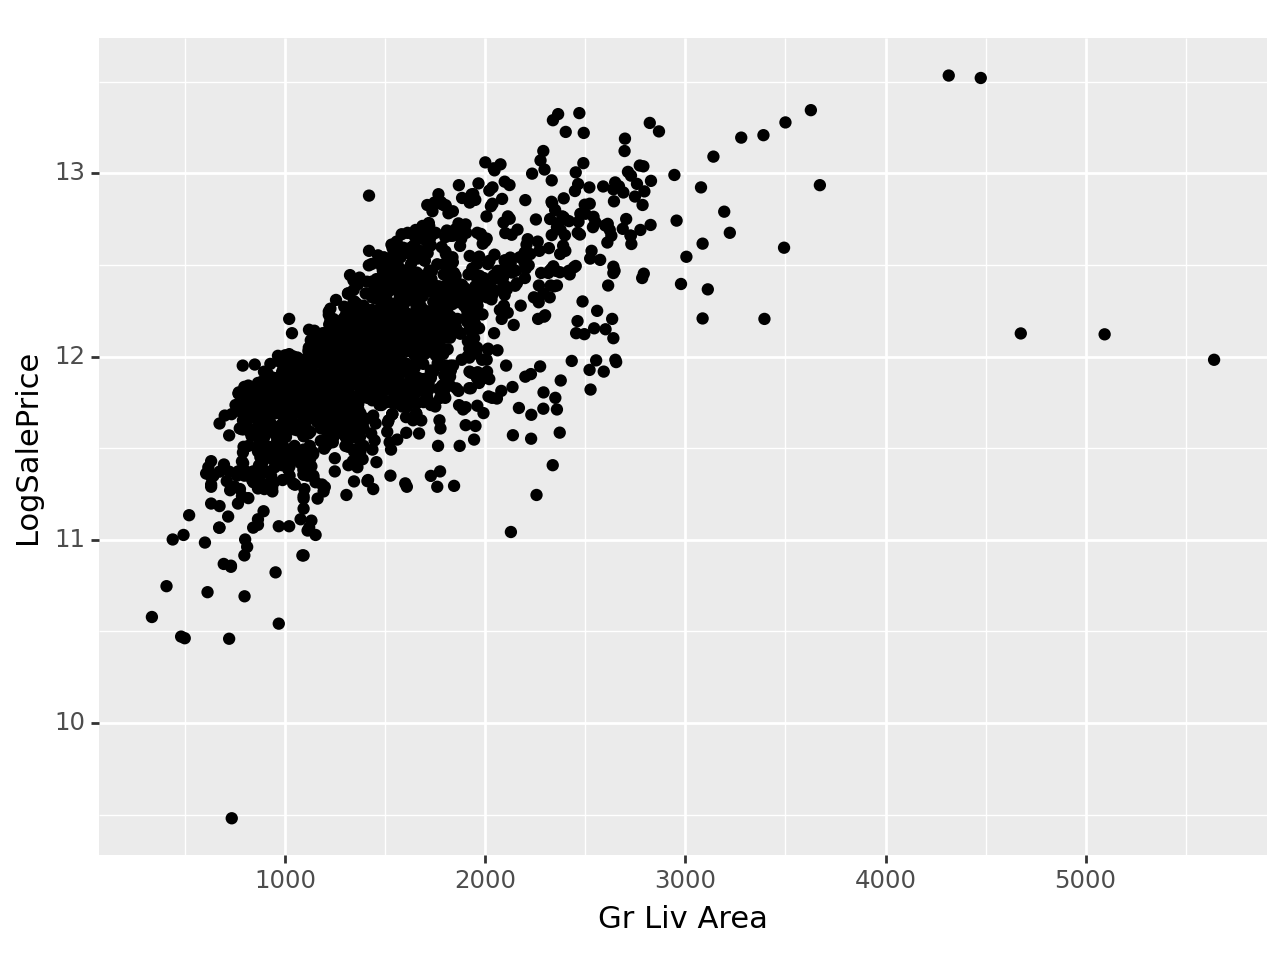

<Figure Size: (640 x 480)>

In [103]:
train_plot = train[['SalePrice', 'Gr Liv Area']]

train_plot['LogSalePrice'] = np.log(train_plot['SalePrice'])

from plotnine import (ggplot,
                     aes,
                     geom_point)

(ggplot(train_plot)
    + geom_point(aes(y='LogSalePrice', x = 'Gr Liv Area')))

C:\Users\tuke-\AppData\Local\Temp\ipykernel_18684\924375938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


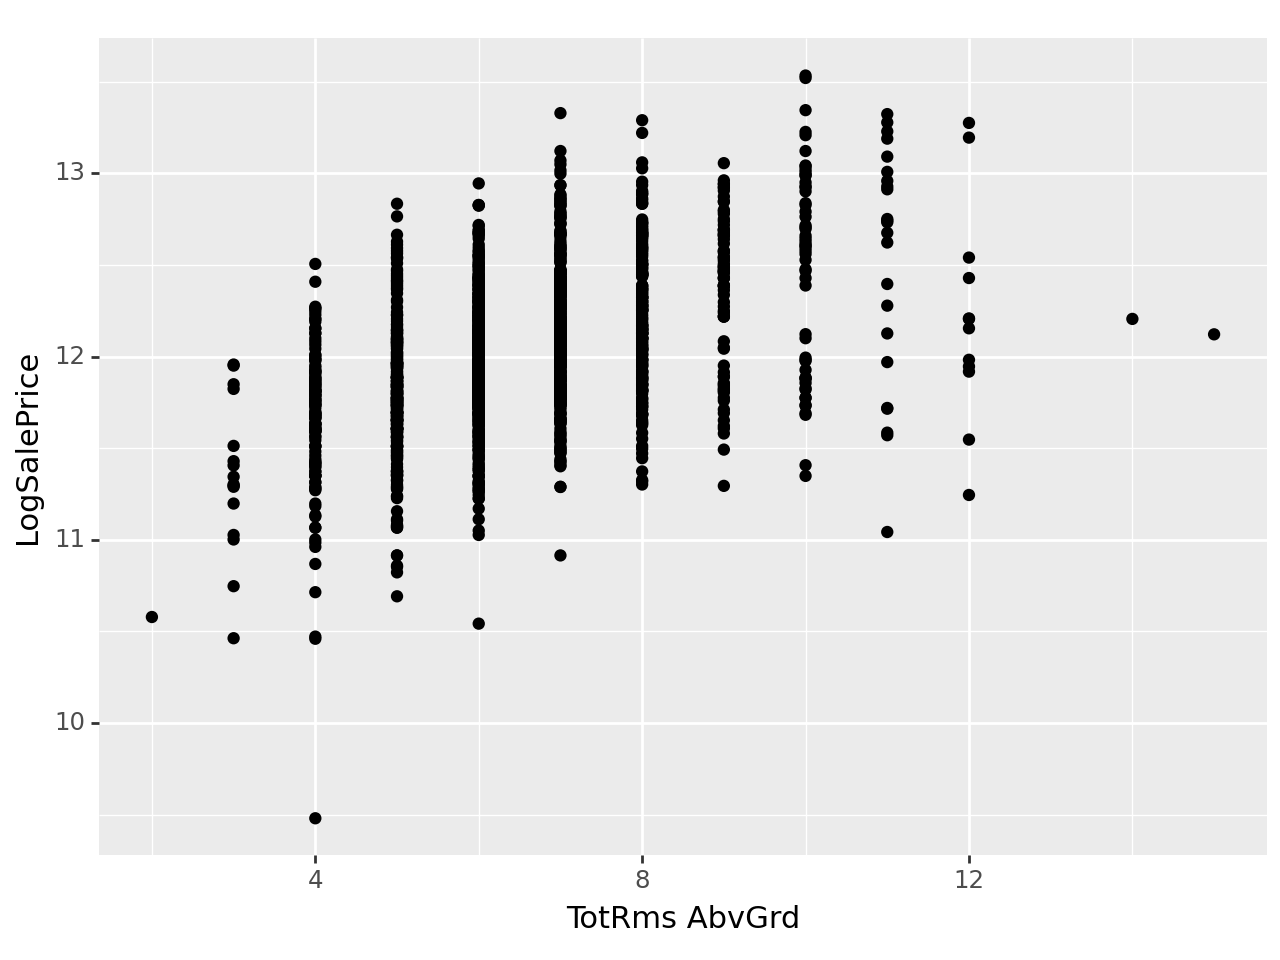

<Figure Size: (640 x 480)>

In [257]:
train_plot = train[['SalePrice', 'TotRms AbvGrd']]

train_plot['LogSalePrice'] = np.log(train_plot['SalePrice'])

from plotnine import (ggplot,
                     aes,
                     geom_point)

(ggplot(train_plot)
    + geom_point(aes(y='LogSalePrice', x = 'TotRms AbvGrd')))

In [181]:
X = train.drop(['SalePrice', 'PID'], axis = 1)

#y = np.log(train[['SalePrice']])

y = train[['SalePrice']]

y = np.ravel(y)

X_test, X_train, y_test, y_train = train_test_split(X,y, random_state = 42)


In [182]:
ct2 = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

In [185]:
pipeline = Pipeline(
  [("preprocessing", ct2),
  ("Regression", LogisticRegression(max_iter = 1000))]
)

fitted = pipeline.fit(X_train,y_train)

coef = fitted['Regression'].coef_

coef_name = pipeline['preprocessing'].get_feature_names_out()

df = pd.DataFrame({'Name':coef_name, 'lrcoef':coef[0]})

scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
MSE = -scores.mean()

print(MSE)

C:\Users\tuke-\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


2242231637.980053


In [184]:
temp = df[df['lrcoef'] == 0]
print(temp)

temp = df[(df['lrcoef'] > 0) | (df['lrcoef'] < 0)]
print(temp)

Empty DataFrame
Columns: [Name, lrcoef]
Index: []
                              Name    lrcoef
0             dummify__Street_Grvl -0.031083
1             dummify__Street_Pave  0.031654
2    dummify__Neighborhood_Blmngtn -0.001415
3    dummify__Neighborhood_Blueste -0.001294
4     dummify__Neighborhood_BrDale -0.005249
..                             ...       ...
170     standardize__Bedroom AbvGr -0.580023
171     standardize__TotRms AbvGrd -0.574651
172       standardize__Gr Liv Area -0.462059
173      standardize__Screen Porch -0.037557
174         standardize__Pool Area -0.000128

[175 rows x 2 columns]


In [186]:
pipeline = Pipeline(
  [("preprocessing", ct),
  ("Regression", Lasso(alpha = 0.001))]
)

fitted = pipeline.fit(X_train,y_train)

coef = fitted['Regression'].coef_

coef_name = pipeline['preprocessing'].get_feature_names_out()

df = pd.DataFrame({'Name':coef_name, 'lrcoef':coef[0]})
print(df)

scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
RMSE = -scores.mean()

print(RMSE)

ValueError: could not convert string to float: 'Pave'

In [ ]:
X = train.drop(['SalePrice','PID', 'Functional', 'Lot Area', 'Screen Porch'], axis = 1)

X_test, X_train, y_test, y_train = train_test_split(X,y, random_state = 42)

In [ ]:
pipeline = Pipeline(
  [("preprocessing", ct),
  ("Regression", Lasso(alpha = 0.01))]
)

fitted = pipeline.fit(X_train,y_train)

#coef = fitted['Regression'].coef_

#coef_name = pipeline['preprocessing'].get_feature_names_out()

#df = pd.DataFrame({'Name':coef_name, 'lrcoef':coef})
#print(df)

scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
RMSE = -scores.mean()

print(RMSE)

degrees = {'Regression__alpha': list(np.arange(0.001, 10, 0.001))}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='neg_root_mean_squared_error')

gscv_fitted = gscv.fit(X_train, y_train)

scores = gscv_fitted.cv_results_['mean_test_score']

df = pd.DataFrame(-scores)

df.min()

In [ ]:
X = train.drop(['SalePrice','PID', 'Functional', 'Lot Area', 'Screen Porch'], axis = 1)

y = np.log(train[['SalePrice']])

y = np.ravel(y)

X_test, X_train, y_test, y_train = train_test_split(X,y, random_state = 42)

In [3]:
ct = ColumnTransformer(
  [("Polynomial", PolynomialFeatures(degree = 2), ['Gr Liv Area'])],
  remainder = "passthrough"
).set_output(transform = "pandas")

In [4]:
ct2 = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

In [272]:
X = train.drop(['SalePrice','PID', 'Functional', 'Lot Area', 'Screen Porch', 'Year Built'], axis = 1)

y = np.log(train[['SalePrice']])

y = np.ravel(y)

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.25)

pipeline = Pipeline(
  [("Poly", ct),
   ("preprocessing", ct2),
  ("Regression", Lasso(alpha = 0.001))]
)

fitted = pipeline.fit(X_train,y_train)

coef = fitted['Regression'].coef_

coef_name = pipeline['preprocessing'].get_feature_names_out()

df = pd.DataFrame({'Name':coef_name, 'lrcoef':coef})
print(df)

scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
RMSE = -scores.mean()

print(RMSE)

# Predict the values for the test set
y_pred = pipeline.predict(X_test)

# Calculate the RMSE for the test set
mse = mean_squared_error(y_test, y_pred)
r_mse = np.sqrt(mse)

print('Test RMSE: %f' % r_mse)

                                        Name    lrcoef
0            dummify__remainder__Street_Grvl -0.000000
1            dummify__remainder__Street_Pave  0.000000
2   dummify__remainder__Neighborhood_Blmngtn -0.000000
3   dummify__remainder__Neighborhood_Blueste  0.000000
4    dummify__remainder__Neighborhood_BrDale -0.000000
..                                       ...       ...
72         standardize__remainder__Full Bath  0.023746
73         standardize__remainder__Half Bath  0.016353
74     standardize__remainder__Bedroom AbvGr -0.035779
75     standardize__remainder__TotRms AbvGrd  0.005281
76         standardize__remainder__Pool Area  0.006738

[77 rows x 2 columns]
0.1511882635519365
Test RMSE: 0.158233


In [260]:
train = pd.read_csv(r"C:\Users\tuke-\Desktop\1_GSB544_Computing_and_Machine_Learning\Final\Regression\data\train_new.csv")

train = train.dropna()

train['Yr Sold'] = train['Yr Sold'].astype(object)
train['Year Built'] = train['Year Built'].astype(object)
train['Lot Frontage'] = train['Lot Frontage'].astype('int64')

test = pd.read_csv(r"C:\Users\tuke-\Desktop\1_GSB544_Computing_and_Machine_Learning\Final\Regression\data\test_new.csv")

test = test.dropna()

test['Yr Sold'] = test['Yr Sold'].astype(object)
test['Year Built'] = test['Year Built'].astype(object)
test['Lot Frontage'] = test['Lot Frontage'].astype('int64')

In [237]:
X = train.drop(['SalePrice','PID', 'Functional', 'Lot Area', 'Screen Porch'], axis = 1)

y = train[['SalePrice']]

y = np.ravel(y)

pipeline = Pipeline(
  [("Poly", ct),
   ("preprocessing", ct2),
  ("Regression", Lasso(alpha = 0.001, max_iter = 10000))]
)

fitted = pipeline.fit(X,y)

C:\Users\tuke-\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.746e+11, tolerance: 1.317e+09


In [239]:
final_predictions = pd.DataFrame(
    {"PID": test['PID'],
    "SalePrice": fitted.predict(test)}
)

print(final_predictions)

           PID      SalePrice
0    907135180  130008.455321
1    528181040  243948.326305
2    528175010  252477.947130
3    531379030  207836.470759
4    923275090  139051.827637
..         ...            ...
600  528174060  209425.803455
601  903400180  180769.024607
602  903227150  129099.067787
603  909250070  153752.502557
604  909425180  213527.241089

[605 rows x 2 columns]


In [240]:
final_predictions.to_csv(r'C:\Users\tuke-\Desktop\final_predictions.csv', index=False)

In [277]:
from itertools import combinations
from sklearn.metrics import mean_squared_error
import numpy as np

X = train.drop(['SalePrice','PID', 'Functional', 'Lot Area', 'Screen Porch'], axis = 1)

y = np.log(train[['SalePrice']])

y = np.ravel(y)

pipeline = Pipeline(
  [#("Poly", ct),
   ("preprocessing", ct2),
  ("Regression", Lasso(alpha = 0.001))]
)

# Get all column names
columns = X.columns.tolist()

# Loop over all combinations of columns
for r in range(1, len(columns) + 1):
    for subset in combinations(columns, r):
        # Use only the columns in this combination
        X_subset = X[list(subset)]
        
        # Split the data
        X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_subset, y, test_size=0.25)
        
        # Fit the pipeline
        fitted = pipeline.fit(X_train_subset, y_train)
        
        # Predict the values for the test set
        y_pred = pipeline.predict(X_test_subset)
        
        # Calculate the RMSE for the test set
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        print(f'Columns: {subset}, Test RMSE: {rmse}')


Columns: ('Lot Frontage',), Test RMSE: 0.3911138181881342
Columns: ('Street',), Test RMSE: 0.41984717943421357
Columns: ('Neighborhood',), Test RMSE: 0.2647421566116174
Columns: ('Bldg Type',), Test RMSE: 0.4165505638500885
Columns: ('House Style',), Test RMSE: 0.4180395526545234
Columns: ('Overall Qual',), Test RMSE: 0.2266749217215284
Columns: ('Overall Cond',), Test RMSE: 0.42346111200367964
Columns: ('Year Built',), Test RMSE: 0.33330554581048044
Columns: ('Roof Style',), Test RMSE: 0.3984005729000694
Columns: ('Heating',), Test RMSE: 0.4162344603063869
Columns: ('Central Air',), Test RMSE: 0.40193658409512795
Columns: ('Electrical',), Test RMSE: 0.4027340641586871
Columns: ('Full Bath',), Test RMSE: 0.35118898927627246
Columns: ('Half Bath',), Test RMSE: 0.37170250718330367
Columns: ('Bedroom AbvGr',), Test RMSE: 0.43736002299442917
Columns: ('TotRms AbvGrd',), Test RMSE: 0.3656783290153235
Columns: ('Gr Liv Area',), Test RMSE: 0.31707897468794277
Columns: ('Pool Area',), Test RMS

Columns: ('Overall Cond', 'Electrical'), Test RMSE: 0.38507633227502375
Columns: ('Overall Cond', 'Full Bath'), Test RMSE: 0.3644125877565964
Columns: ('Overall Cond', 'Half Bath'), Test RMSE: 0.39152566232736397
Columns: ('Overall Cond', 'Bedroom AbvGr'), Test RMSE: 0.42039448900147663
Columns: ('Overall Cond', 'TotRms AbvGrd'), Test RMSE: 0.3717330019806059
Columns: ('Overall Cond', 'Gr Liv Area'), Test RMSE: 0.27911475647885114
Columns: ('Overall Cond', 'Pool Area'), Test RMSE: 0.44602057825157915
Columns: ('Overall Cond', 'Yr Sold'), Test RMSE: 0.4274270277615967
Columns: ('Overall Cond', 'Sale Type'), Test RMSE: 0.40648584410040217
Columns: ('Year Built', 'Roof Style'), Test RMSE: 0.2954910203082421
Columns: ('Year Built', 'Heating'), Test RMSE: 0.3094762546732451
Columns: ('Year Built', 'Central Air'), Test RMSE: 0.2872009151163742
Columns: ('Year Built', 'Electrical'), Test RMSE: 0.30000460843030724
Columns: ('Year Built', 'Full Bath'), Test RMSE: 0.29017607358411657
Columns: ('

Columns: ('Lot Frontage', 'Neighborhood', 'TotRms AbvGrd'), Test RMSE: 0.2406646428913251
Columns: ('Lot Frontage', 'Neighborhood', 'Gr Liv Area'), Test RMSE: 0.2089355558143282
Columns: ('Lot Frontage', 'Neighborhood', 'Pool Area'), Test RMSE: 0.25840939233812843
Columns: ('Lot Frontage', 'Neighborhood', 'Yr Sold'), Test RMSE: 0.2780324240662401
Columns: ('Lot Frontage', 'Neighborhood', 'Sale Type'), Test RMSE: 0.2528479986627656
Columns: ('Lot Frontage', 'Bldg Type', 'House Style'), Test RMSE: 0.3379922947089175
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual'), Test RMSE: 0.22848347912465738
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond'), Test RMSE: 0.38794319255712817
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built'), Test RMSE: 0.284493689828627
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style'), Test RMSE: 0.3631217904464064
Columns: ('Lot Frontage', 'Bldg Type', 'Heating'), Test RMSE: 0.37542255756348625
Columns: ('Lot Frontage', 'Bldg Type', 'Central Air'), Te

Columns: ('Lot Frontage', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.3526001539816534
Columns: ('Lot Frontage', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.3394853196207422
Columns: ('Lot Frontage', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.28847472813877123
Columns: ('Lot Frontage', 'Central Air', 'Pool Area'), Test RMSE: 0.38472752971543084
Columns: ('Lot Frontage', 'Central Air', 'Yr Sold'), Test RMSE: 0.3472018793682996
Columns: ('Lot Frontage', 'Central Air', 'Sale Type'), Test RMSE: 0.33773628951523377
Columns: ('Lot Frontage', 'Electrical', 'Full Bath'), Test RMSE: 0.3257098924744723
Columns: ('Lot Frontage', 'Electrical', 'Half Bath'), Test RMSE: 0.3612923988761375
Columns: ('Lot Frontage', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.37101858127891446
Columns: ('Lot Frontage', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.3226733073929662
Columns: ('Lot Frontage', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.30213563416782063
Columns: ('Lot Frontage', 'Electrical', 'Pool A

Columns: ('Street', 'Overall Cond', 'Year Built'), Test RMSE: 0.33961597209220684
Columns: ('Street', 'Overall Cond', 'Roof Style'), Test RMSE: 0.39320383989378516
Columns: ('Street', 'Overall Cond', 'Heating'), Test RMSE: 0.44847921245073
Columns: ('Street', 'Overall Cond', 'Central Air'), Test RMSE: 0.3725675613659658
Columns: ('Street', 'Overall Cond', 'Electrical'), Test RMSE: 0.38954800975065
Columns: ('Street', 'Overall Cond', 'Full Bath'), Test RMSE: 0.33477263886011843
Columns: ('Street', 'Overall Cond', 'Half Bath'), Test RMSE: 0.3976196943401607
Columns: ('Street', 'Overall Cond', 'Bedroom AbvGr'), Test RMSE: 0.4081505138239075
Columns: ('Street', 'Overall Cond', 'TotRms AbvGrd'), Test RMSE: 0.36680181052895483
Columns: ('Street', 'Overall Cond', 'Gr Liv Area'), Test RMSE: 0.30767214650892516
Columns: ('Street', 'Overall Cond', 'Pool Area'), Test RMSE: 0.42601161489424433
Columns: ('Street', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.41771634821049947
Columns: ('Street', 'Overa

Columns: ('Neighborhood', 'House Style', 'Overall Qual'), Test RMSE: 0.19952963719216693
Columns: ('Neighborhood', 'House Style', 'Overall Cond'), Test RMSE: 0.260808356575323
Columns: ('Neighborhood', 'House Style', 'Year Built'), Test RMSE: 0.22923575576079475
Columns: ('Neighborhood', 'House Style', 'Roof Style'), Test RMSE: 0.2649257924038698
Columns: ('Neighborhood', 'House Style', 'Heating'), Test RMSE: 0.27355765381735836
Columns: ('Neighborhood', 'House Style', 'Central Air'), Test RMSE: 0.258631643485178
Columns: ('Neighborhood', 'House Style', 'Electrical'), Test RMSE: 0.2593106514628968
Columns: ('Neighborhood', 'House Style', 'Full Bath'), Test RMSE: 0.26949330711044406
Columns: ('Neighborhood', 'House Style', 'Half Bath'), Test RMSE: 0.25829045367136305
Columns: ('Neighborhood', 'House Style', 'Bedroom AbvGr'), Test RMSE: 0.24321490802044665
Columns: ('Neighborhood', 'House Style', 'TotRms AbvGrd'), Test RMSE: 0.2571388623528772
Columns: ('Neighborhood', 'House Style', 'Gr

Columns: ('Neighborhood', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.25581235765964316
Columns: ('Neighborhood', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.26518491869034594
Columns: ('Neighborhood', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.20716440916434034
Columns: ('Neighborhood', 'Half Bath', 'Pool Area'), Test RMSE: 0.2562277243646932
Columns: ('Neighborhood', 'Half Bath', 'Yr Sold'), Test RMSE: 0.285594825951885
Columns: ('Neighborhood', 'Half Bath', 'Sale Type'), Test RMSE: 0.2910198814528883
Columns: ('Neighborhood', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.24073771131580485
Columns: ('Neighborhood', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.20901712155015928
Columns: ('Neighborhood', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2849002752609715
Columns: ('Neighborhood', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2533616497088399
Columns: ('Neighborhood', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.24333927783807266
Columns: ('Neighborhood', 'TotRms AbvGrd', 'Gr Liv

Columns: ('Bldg Type', 'Central Air', 'Yr Sold'), Test RMSE: 0.3897067541826721
Columns: ('Bldg Type', 'Central Air', 'Sale Type'), Test RMSE: 0.3891663932775939
Columns: ('Bldg Type', 'Electrical', 'Full Bath'), Test RMSE: 0.3259456331645665
Columns: ('Bldg Type', 'Electrical', 'Half Bath'), Test RMSE: 0.3977679446482903
Columns: ('Bldg Type', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.39009290277442815
Columns: ('Bldg Type', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.33058720173839834
Columns: ('Bldg Type', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.24509601602833256
Columns: ('Bldg Type', 'Electrical', 'Pool Area'), Test RMSE: 0.38789488931325783
Columns: ('Bldg Type', 'Electrical', 'Yr Sold'), Test RMSE: 0.4052039736340615
Columns: ('Bldg Type', 'Electrical', 'Sale Type'), Test RMSE: 0.36785956731379005
Columns: ('Bldg Type', 'Full Bath', 'Half Bath'), Test RMSE: 0.3328774753810464
Columns: ('Bldg Type', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.33842441721299404
Columns: ('B

Columns: ('House Style', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.3653835783496808
Columns: ('House Style', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.30403857498689657
Columns: ('House Style', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.2559014948021655
Columns: ('House Style', 'Central Air', 'Pool Area'), Test RMSE: 0.3700329358566585
Columns: ('House Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.36453737221266735
Columns: ('House Style', 'Central Air', 'Sale Type'), Test RMSE: 0.3466851657336506
Columns: ('House Style', 'Electrical', 'Full Bath'), Test RMSE: 0.33431942810362136
Columns: ('House Style', 'Electrical', 'Half Bath'), Test RMSE: 0.36577576014820523
Columns: ('House Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.4094641371635117
Columns: ('House Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.3357628672918107
Columns: ('House Style', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.2627678379224169
Columns: ('House Style', 'Electrical', 'Pool Area'), Test R

Columns: ('Overall Qual', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.2078417326893597
Columns: ('Overall Qual', 'Electrical', 'Pool Area'), Test RMSE: 0.229433040546594
Columns: ('Overall Qual', 'Electrical', 'Yr Sold'), Test RMSE: 0.21644868852320048
Columns: ('Overall Qual', 'Electrical', 'Sale Type'), Test RMSE: 0.215100254964144
Columns: ('Overall Qual', 'Full Bath', 'Half Bath'), Test RMSE: 0.21550928415745646
Columns: ('Overall Qual', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2254806462851111
Columns: ('Overall Qual', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2166341906961168
Columns: ('Overall Qual', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.18525281799869955
Columns: ('Overall Qual', 'Full Bath', 'Pool Area'), Test RMSE: 0.22626642232383656
Columns: ('Overall Qual', 'Full Bath', 'Yr Sold'), Test RMSE: 0.20500378212091744
Columns: ('Overall Qual', 'Full Bath', 'Sale Type'), Test RMSE: 0.2202358848940467
Columns: ('Overall Qual', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.23

Columns: ('Overall Cond', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.36662083062302664
Columns: ('Overall Cond', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.362431218250503
Columns: ('Overall Cond', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3493093486558121
Columns: ('Overall Cond', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.3027470229335099
Columns: ('Overall Cond', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.30194943960135584
Columns: ('Overall Cond', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28659861057629515
Columns: ('Overall Cond', 'Pool Area', 'Yr Sold'), Test RMSE: 0.4126672075833169
Columns: ('Overall Cond', 'Pool Area', 'Sale Type'), Test RMSE: 0.40282092738943154
Columns: ('Overall Cond', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3824218144353068
Columns: ('Year Built', 'Roof Style', 'Heating'), Test RMSE: 0.3178826384153388
Columns: ('Year Built', 'Roof Style', 'Central Air'), Test RMSE: 0.29622023190747476
Columns: ('Year Built', 'Roof Style', 'Electrical'), Test RMSE: 0.312394753

Columns: ('Roof Style', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.33661208773104695
Columns: ('Roof Style', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2878205551509381
Columns: ('Roof Style', 'Full Bath', 'Pool Area'), Test RMSE: 0.31428427566469774
Columns: ('Roof Style', 'Full Bath', 'Yr Sold'), Test RMSE: 0.33602299374763844
Columns: ('Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.344274420094941
Columns: ('Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.38057862909231666
Columns: ('Roof Style', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.37809222228979744
Columns: ('Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.3099010796993133
Columns: ('Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.4007618987874176
Columns: ('Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3756654024162929
Columns: ('Roof Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.382591591943113
Columns: ('Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3300770456163228
Colum

Columns: ('Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3964110106314446
Columns: ('Central Air', 'Pool Area', 'Sale Type'), Test RMSE: 0.3767644669393469
Columns: ('Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.37553904546153655
Columns: ('Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.31348576389711885
Columns: ('Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.35248488637519215
Columns: ('Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.3333630772120416
Columns: ('Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2966061881485017
Columns: ('Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.321671108937299
Columns: ('Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.33364349165823304
Columns: ('Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.3276450851053729
Columns: ('Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3880127185092219
Columns: ('Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.36840266263294347
Columns: 

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Half Bath'), Test RMSE: 0.28254914786452323
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bedroom AbvGr'), Test RMSE: 0.2434495010027477
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'TotRms AbvGrd'), Test RMSE: 0.23681560375125038
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Gr Liv Area'), Test RMSE: 0.20652725698718882
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Pool Area'), Test RMSE: 0.2662060721423953
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Yr Sold'), Test RMSE: 0.28826194242492054
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Sale Type'), Test RMSE: 0.24961102932165957
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style'), Test RMSE: 0.34623117187233476
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Qual'), Test RMSE: 0.22411272910301874
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Cond'), Test RMSE: 0.3770665629275718
Columns: ('Lot Frontage', 

Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Yr Sold'), Test RMSE: 0.38219234524800205
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Sale Type'), Test RMSE: 0.3706726131224126
Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air'), Test RMSE: 0.37607655552651226
Columns: ('Lot Frontage', 'Street', 'Heating', 'Electrical'), Test RMSE: 0.36118432790787935
Columns: ('Lot Frontage', 'Street', 'Heating', 'Full Bath'), Test RMSE: 0.32474296102910344
Columns: ('Lot Frontage', 'Street', 'Heating', 'Half Bath'), Test RMSE: 0.38082414657863317
Columns: ('Lot Frontage', 'Street', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.3750220003608983
Columns: ('Lot Frontage', 'Street', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.33888474446514705
Columns: ('Lot Frontage', 'Street', 'Heating', 'Gr Liv Area'), Test RMSE: 0.2936768368156325
Columns: ('Lot Frontage', 'Street', 'Heating', 'Pool Area'), Test RMSE: 0.3785354189761234
Columns: ('Lot Frontage', 'Street', 'Heating', 'Yr Sold'), Test RMS

Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Pool Area'), Test RMSE: 0.2772330771758987
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Yr Sold'), Test RMSE: 0.25393377385200494
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Sale Type'), Test RMSE: 0.275890419367348
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Overall Cond'), Test RMSE: 0.20156087563492014
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Year Built'), Test RMSE: 0.2090990749948519
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Roof Style'), Test RMSE: 0.19201986971953652
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Heating'), Test RMSE: 0.21144010247887457
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Central Air'), Test RMSE: 0.19401415075860948
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical'), Test RMSE: 0.19195134166149708
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Full Bath'), Test

Columns: ('Lot Frontage', 'Neighborhood', 'Full Bath', 'Yr Sold'), Test RMSE: 0.22946507130483493
Columns: ('Lot Frontage', 'Neighborhood', 'Full Bath', 'Sale Type'), Test RMSE: 0.214543848669301
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.23623948369213876
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.24483334138937674
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.19339146230320994
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Pool Area'), Test RMSE: 0.24679864332570917
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Yr Sold'), Test RMSE: 0.28121115144039704
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Sale Type'), Test RMSE: 0.266812270950889
Columns: ('Lot Frontage', 'Neighborhood', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.22598407237103194
Columns: ('Lot Frontage', 'Neighborhood', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.21

Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Bedroom AbvGr'), Test RMSE: 0.34893215082967166
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.3309170137665722
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.30582034971617095
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Pool Area'), Test RMSE: 0.3582696232224518
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Yr Sold'), Test RMSE: 0.39811345261651454
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Sale Type'), Test RMSE: 0.37333057010686327
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Central Air'), Test RMSE: 0.3579750864930809
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Electrical'), Test RMSE: 0.36857506424310305
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath'), Test RMSE: 0.3023615082299249
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Half Bath'), Test RMSE: 0.3559452859495074
Columns: ('Lot Frontage', 

Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.37848330131870617
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Sale Type'), Test RMSE: 0.3765409350085356
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Roof Style'), Test RMSE: 0.2865290973953286
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Heating'), Test RMSE: 0.3104165823375342
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Central Air'), Test RMSE: 0.2791789984817973
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Electrical'), Test RMSE: 0.30160619603539096
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Full Bath'), Test RMSE: 0.28923181423778344
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Half Bath'), Test RMSE: 0.28278448957737906
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr'), Test RMSE: 0.2842782784332044
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.25958983896

Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Half Bath'), Test RMSE: 0.20398558028877262
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Bedroom AbvGr'), Test RMSE: 0.20725231022554913
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd'), Test RMSE: 0.22053464855121133
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Gr Liv Area'), Test RMSE: 0.221663408370046
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Pool Area'), Test RMSE: 0.23357902374151068
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.2232801608368506
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Sale Type'), Test RMSE: 0.2318865069082129
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Roof Style'), Test RMSE: 0.2116113547483464
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Heating'), Test RMSE: 0.22147290061456798
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Central Air'), Tes

Columns: ('Lot Frontage', 'Overall Qual', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.17764023981113367
Columns: ('Lot Frontage', 'Overall Qual', 'Pool Area', 'Yr Sold'), Test RMSE: 0.21297586967631937
Columns: ('Lot Frontage', 'Overall Qual', 'Pool Area', 'Sale Type'), Test RMSE: 0.23208954755415684
Columns: ('Lot Frontage', 'Overall Qual', 'Yr Sold', 'Sale Type'), Test RMSE: 0.21498915244837888
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Roof Style'), Test RMSE: 0.2897558106333673
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Heating'), Test RMSE: 0.3155992511239902
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Central Air'), Test RMSE: 0.2939082563640388
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Electrical'), Test RMSE: 0.27002137231804524
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Full Bath'), Test RMSE: 0.25711172594019893
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Half Bath'), Test RMSE: 0.288443997133320

Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Central Air'), Test RMSE: 0.27870567696170556
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Electrical'), Test RMSE: 0.28870593188993066
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Full Bath'), Test RMSE: 0.26608331514118677
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Half Bath'), Test RMSE: 0.3033315535923107
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Bedroom AbvGr'), Test RMSE: 0.2918359256267817
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.2567087103936621
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.2558678771030076
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Pool Area'), Test RMSE: 0.30280780593255163
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Yr Sold'), Test RMSE: 0.27173615337656365
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Sale Type'), Test RMSE: 0.30068278804908427
Col

Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.3623675506362418
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.3359717662233751
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.32234976839468166
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Pool Area'), Test RMSE: 0.3771851008450023
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Yr Sold'), Test RMSE: 0.35675935931335145
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Sale Type'), Test RMSE: 0.3526760555005007
Columns: ('Lot Frontage', 'Roof Style', 'Full Bath', 'Half Bath'), Test RMSE: 0.29998051592704755
Columns: ('Lot Frontage', 'Roof Style', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.32074023612480984
Columns: ('Lot Frontage', 'Roof Style', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.3170205702113808
Columns: ('Lot Frontage', 'Roof Style', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2750784223470498
Co

Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.3830437315258265
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.3621401647215822
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.316871480217453
Columns: ('Lot Frontage', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.29447651176714423
Columns: ('Lot Frontage', 'Central Air', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.31745290147611266
Columns: ('Lot Frontage', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.31482378237755815
Columns: ('Lot Frontage', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.24708060332345852
Columns: ('Lot Frontage', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.3054671491632039
Columns: ('Lot Frontage', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3087784347220173
Columns: ('Lot Frontage', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.28949632565568867
Columns

Columns: ('Lot Frontage', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3961284333201329
Columns: ('Lot Frontage', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.36617559113643333
Columns: ('Lot Frontage', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.3456636613143077
Columns: ('Lot Frontage', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.35681012906138393
Columns: ('Lot Frontage', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3655136506960606
Columns: ('Lot Frontage', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.31656627823476324
Columns: ('Lot Frontage', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.29934987371395105
Columns: ('Lot Frontage', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.31978383697599994
Columns: ('Lot Frontage', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2729376522663313
Columns: ('Lot Frontage', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.399956909445919
Columns: ('L

Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Pool Area'), Test RMSE: 0.27750710007686613
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.26473623197950474
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Sale Type'), Test RMSE: 0.26513878962626647
Columns: ('Street', 'Neighborhood', 'Year Built', 'Roof Style'), Test RMSE: 0.2516952522708489
Columns: ('Street', 'Neighborhood', 'Year Built', 'Heating'), Test RMSE: 0.2516894613707126
Columns: ('Street', 'Neighborhood', 'Year Built', 'Central Air'), Test RMSE: 0.24727933596058096
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical'), Test RMSE: 0.24362786185754537
Columns: ('Street', 'Neighborhood', 'Year Built', 'Full Bath'), Test RMSE: 0.2564618417348846
Columns: ('Street', 'Neighborhood', 'Year Built', 'Half Bath'), Test RMSE: 0.24287832516592162
Columns: ('Street', 'Neighborhood', 'Year Built', 'Bedroom AbvGr'), Test RMSE: 0.25746930738451673
Columns: ('Street', 'Neighborhood', 'Year B

Columns: ('Street', 'Bldg Type', 'House Style', 'Electrical'), Test RMSE: 0.38871699460168524
Columns: ('Street', 'Bldg Type', 'House Style', 'Full Bath'), Test RMSE: 0.32171331187768964
Columns: ('Street', 'Bldg Type', 'House Style', 'Half Bath'), Test RMSE: 0.3841178333784945
Columns: ('Street', 'Bldg Type', 'House Style', 'Bedroom AbvGr'), Test RMSE: 0.3971484257750841
Columns: ('Street', 'Bldg Type', 'House Style', 'TotRms AbvGrd'), Test RMSE: 0.3285041152860097
Columns: ('Street', 'Bldg Type', 'House Style', 'Gr Liv Area'), Test RMSE: 0.30946960401933993
Columns: ('Street', 'Bldg Type', 'House Style', 'Pool Area'), Test RMSE: 0.3989682354157486
Columns: ('Street', 'Bldg Type', 'House Style', 'Yr Sold'), Test RMSE: 0.41331745047843904
Columns: ('Street', 'Bldg Type', 'House Style', 'Sale Type'), Test RMSE: 0.3516573009939291
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond'), Test RMSE: 0.21996830030481754
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built')

Columns: ('Street', 'Bldg Type', 'Full Bath', 'Pool Area'), Test RMSE: 0.3113666677759365
Columns: ('Street', 'Bldg Type', 'Full Bath', 'Yr Sold'), Test RMSE: 0.35771794453484457
Columns: ('Street', 'Bldg Type', 'Full Bath', 'Sale Type'), Test RMSE: 0.3107049657221999
Columns: ('Street', 'Bldg Type', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3745150130355763
Columns: ('Street', 'Bldg Type', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3500732478471829
Columns: ('Street', 'Bldg Type', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2745893736614094
Columns: ('Street', 'Bldg Type', 'Half Bath', 'Pool Area'), Test RMSE: 0.39260184241858764
Columns: ('Street', 'Bldg Type', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3804733814144725
Columns: ('Street', 'Bldg Type', 'Half Bath', 'Sale Type'), Test RMSE: 0.3932548936707512
Columns: ('Street', 'Bldg Type', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3315576644873655
Columns: ('Street', 'Bldg Type', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.25650

Columns: ('Street', 'House Style', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.3489360608896381
Columns: ('Street', 'House Style', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.26434680106061403
Columns: ('Street', 'House Style', 'Central Air', 'Pool Area'), Test RMSE: 0.3735630397660592
Columns: ('Street', 'House Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.39773450555601525
Columns: ('Street', 'House Style', 'Central Air', 'Sale Type'), Test RMSE: 0.3687278199040729
Columns: ('Street', 'House Style', 'Electrical', 'Full Bath'), Test RMSE: 0.31698359169784635
Columns: ('Street', 'House Style', 'Electrical', 'Half Bath'), Test RMSE: 0.3985922727791908
Columns: ('Street', 'House Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.399507806563431
Columns: ('Street', 'House Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.36136680661200027
Columns: ('Street', 'House Style', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.31387323719906984
Columns: ('Street', 'House Style', 'Electrical'

Columns: ('Street', 'Overall Qual', 'Central Air', 'Half Bath'), Test RMSE: 0.22333831410946467
Columns: ('Street', 'Overall Qual', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.2192447636936404
Columns: ('Street', 'Overall Qual', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.20336712573629334
Columns: ('Street', 'Overall Qual', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.17720592844121155
Columns: ('Street', 'Overall Qual', 'Central Air', 'Pool Area'), Test RMSE: 0.219418029598836
Columns: ('Street', 'Overall Qual', 'Central Air', 'Yr Sold'), Test RMSE: 0.22607224279987745
Columns: ('Street', 'Overall Qual', 'Central Air', 'Sale Type'), Test RMSE: 0.22668491439188004
Columns: ('Street', 'Overall Qual', 'Electrical', 'Full Bath'), Test RMSE: 0.21462460519394327
Columns: ('Street', 'Overall Qual', 'Electrical', 'Half Bath'), Test RMSE: 0.23743927576394175
Columns: ('Street', 'Overall Qual', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.2132093641501082
Columns: ('Street', 'Overall Qual',

Columns: ('Street', 'Overall Cond', 'Electrical', 'Pool Area'), Test RMSE: 0.38464688140419
Columns: ('Street', 'Overall Cond', 'Electrical', 'Yr Sold'), Test RMSE: 0.3754153199663495
Columns: ('Street', 'Overall Cond', 'Electrical', 'Sale Type'), Test RMSE: 0.4027926564032716
Columns: ('Street', 'Overall Cond', 'Full Bath', 'Half Bath'), Test RMSE: 0.3286505310880281
Columns: ('Street', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.3421927983991265
Columns: ('Street', 'Overall Cond', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.33538483246439615
Columns: ('Street', 'Overall Cond', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.31120838375198706
Columns: ('Street', 'Overall Cond', 'Full Bath', 'Pool Area'), Test RMSE: 0.3189798168622599
Columns: ('Street', 'Overall Cond', 'Full Bath', 'Yr Sold'), Test RMSE: 0.35857022271802547
Columns: ('Street', 'Overall Cond', 'Full Bath', 'Sale Type'), Test RMSE: 0.3379750426983169
Columns: ('Street', 'Overall Cond', 'Half Bath', 'Bedroom Ab

Columns: ('Street', 'Year Built', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.27398621084226393
Columns: ('Street', 'Year Built', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2882539931482816
Columns: ('Street', 'Year Built', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.25291306256381957
Columns: ('Street', 'Year Built', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2258656297996845
Columns: ('Street', 'Year Built', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2271945460901687
Columns: ('Street', 'Year Built', 'Pool Area', 'Yr Sold'), Test RMSE: 0.33501982058733887
Columns: ('Street', 'Year Built', 'Pool Area', 'Sale Type'), Test RMSE: 0.3431559989275833
Columns: ('Street', 'Year Built', 'Yr Sold', 'Sale Type'), Test RMSE: 0.32357542144006085
Columns: ('Street', 'Roof Style', 'Heating', 'Central Air'), Test RMSE: 0.37201802405961726
Columns: ('Street', 'Roof Style', 'Heating', 'Electrical'), Test RMSE: 0.3870958317714697
Columns: ('Street', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.32199788

Columns: ('Street', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.40600192431310417
Columns: ('Street', 'Heating', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3805617267261392
Columns: ('Street', 'Heating', 'Half Bath', 'Sale Type'), Test RMSE: 0.3735109328249265
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3548158638264154
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2907092767554954
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.4079954497163406
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.4109485602666717
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3717674420466953
Columns: ('Street', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.29850907394840315
Columns: ('Street', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.37288094588887655
Columns: ('Street', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.379630810842

Columns: ('Street', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3236746630882959
Columns: ('Street', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.28474783389486535
Columns: ('Street', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3215556649200082
Columns: ('Street', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3270683527052075
Columns: ('Street', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3188760993269354
Columns: ('Street', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.30498780176059137
Columns: ('Street', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.30722267775221546
Columns: ('Street', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2591710387403255
Columns: ('Street', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3279258338813299
Columns: ('Street', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.34076335087909215
Columns: ('Street', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.337

Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.2523290282023192
Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Sale Type'), Test RMSE: 0.2536956715718218
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Roof Style'), Test RMSE: 0.26453332082110753
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Heating'), Test RMSE: 0.2506538869000533
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Central Air'), Test RMSE: 0.2346679526581844
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Electrical'), Test RMSE: 0.2665798372335483
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Full Bath'), Test RMSE: 0.24837535018993154
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Half Bath'), Test RMSE: 0.23266122616851354
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Bedroom AbvGr'), Test RMSE: 0.25103865324119184
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.22267763079055947
Columns: ('Ne

Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Full Bath'), Test RMSE: 0.1903516751262307
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Half Bath'), Test RMSE: 0.22324808767204052
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Bedroom AbvGr'), Test RMSE: 0.19550189805788207
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'TotRms AbvGrd'), Test RMSE: 0.1910427163738083
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Gr Liv Area'), Test RMSE: 0.19060109561312022
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Pool Area'), Test RMSE: 0.19462733336155125
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Yr Sold'), Test RMSE: 0.21827621916995363
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Sale Type'), Test RMSE: 0.21219631685636317
Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Year Built'), Test RMSE: 0.26444827572524277
Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Roof Style'), Tes

Columns: ('Neighborhood', 'House Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2908197280469676
Columns: ('Neighborhood', 'House Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.247182601978033
Columns: ('Neighborhood', 'House Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2526682047995017
Columns: ('Neighborhood', 'House Style', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19670561389800476
Columns: ('Neighborhood', 'House Style', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.28193816268242766
Columns: ('Neighborhood', 'House Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.26939009072033876
Columns: ('Neighborhood', 'House Style', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2536163945873588
Columns: ('Neighborhood', 'House Style', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.22600175948742415
Columns: ('Neighborhood', 'House Style', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.24299914168738765
Columns: ('Neighborhood', 'House Style', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0

Columns: ('Neighborhood', 'Overall Qual', 'Full Bath', 'Pool Area'), Test RMSE: 0.19707065186161077
Columns: ('Neighborhood', 'Overall Qual', 'Full Bath', 'Yr Sold'), Test RMSE: 0.1957533642276332
Columns: ('Neighborhood', 'Overall Qual', 'Full Bath', 'Sale Type'), Test RMSE: 0.1977480829770768
Columns: ('Neighborhood', 'Overall Qual', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.19941173722309885
Columns: ('Neighborhood', 'Overall Qual', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.197636964159647
Columns: ('Neighborhood', 'Overall Qual', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.16773107470676824
Columns: ('Neighborhood', 'Overall Qual', 'Half Bath', 'Pool Area'), Test RMSE: 0.20261447475910066
Columns: ('Neighborhood', 'Overall Qual', 'Half Bath', 'Yr Sold'), Test RMSE: 0.19189695126246625
Columns: ('Neighborhood', 'Overall Qual', 'Half Bath', 'Sale Type'), Test RMSE: 0.20850426611042064
Columns: ('Neighborhood', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.19456141

Columns: ('Neighborhood', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.26036311736983686
Columns: ('Neighborhood', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.22900439601006256
Columns: ('Neighborhood', 'Overall Cond', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.21282630371097705
Columns: ('Neighborhood', 'Overall Cond', 'Half Bath', 'Pool Area'), Test RMSE: 0.24758293925287983
Columns: ('Neighborhood', 'Overall Cond', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2773442377154233
Columns: ('Neighborhood', 'Overall Cond', 'Half Bath', 'Sale Type'), Test RMSE: 0.2565954277256781
Columns: ('Neighborhood', 'Overall Cond', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.24548156193926055
Columns: ('Neighborhood', 'Overall Cond', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.18802774285365273
Columns: ('Neighborhood', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.23789972403081333
Columns: ('Neighborhood', 'Overall Cond', 'Bedroom AbvGr', 'Yr Sold'), Test 

Columns: ('Neighborhood', 'Year Built', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2771635585924703
Columns: ('Neighborhood', 'Year Built', 'Pool Area', 'Sale Type'), Test RMSE: 0.2772445474510999
Columns: ('Neighborhood', 'Year Built', 'Yr Sold', 'Sale Type'), Test RMSE: 0.26699358202465695
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Central Air'), Test RMSE: 0.2532371769650751
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Electrical'), Test RMSE: 0.24260779033673385
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.25351386806574666
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Half Bath'), Test RMSE: 0.2736791793043974
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.24873392242676193
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.23522198024354055
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Gr Liv Area'), Test RMSE: 0.21533626036099227
Columns: ('Neighborhood', 'Ro

Columns: ('Neighborhood', 'Heating', 'Half Bath', 'Sale Type'), Test RMSE: 0.28695118009835274
Columns: ('Neighborhood', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2398800305730043
Columns: ('Neighborhood', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19618820625459107
Columns: ('Neighborhood', 'Heating', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.26954580462250965
Columns: ('Neighborhood', 'Heating', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.26674025628698617
Columns: ('Neighborhood', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2799295704034486
Columns: ('Neighborhood', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.18551375504103526
Columns: ('Neighborhood', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.22931724084042351
Columns: ('Neighborhood', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23825287726160999
Columns: ('Neighborhood', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.26047588173804304
Columns: ('N

Columns: ('Neighborhood', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.25231215827769177
Columns: ('Neighborhood', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.25227889358990746
Columns: ('Neighborhood', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.22418631627319358
Columns: ('Neighborhood', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.24458765016874676
Columns: ('Neighborhood', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.21198134993919898
Columns: ('Neighborhood', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.24538336628550944
Columns: ('Neighborhood', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.25125859036785675
Columns: ('Neighborhood', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.24072200787929549
Columns: ('Neighborhood', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20740633837997194
Columns: ('Neighborhood', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2735095693454997

Columns: ('Bldg Type', 'House Style', 'Year Built', 'Half Bath'), Test RMSE: 0.29283052244350294
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Bedroom AbvGr'), Test RMSE: 0.30808623499386173
Columns: ('Bldg Type', 'House Style', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.26799229557102394
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Gr Liv Area'), Test RMSE: 0.21717499707296287
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Pool Area'), Test RMSE: 0.3152609969336202
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Yr Sold'), Test RMSE: 0.2889802075107992
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Sale Type'), Test RMSE: 0.30340149524632815
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Heating'), Test RMSE: 0.4176991339064505
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Central Air'), Test RMSE: 0.34923816323763707
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Electrical'), Test RMSE: 0.336728091485159
Columns: ('Bldg Type', 'Ho

Columns: ('Bldg Type', 'Overall Qual', 'Overall Cond', 'Sale Type'), Test RMSE: 0.2393893878334725
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Roof Style'), Test RMSE: 0.21736865851822806
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Heating'), Test RMSE: 0.20718256511590608
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Central Air'), Test RMSE: 0.20411254101427018
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Electrical'), Test RMSE: 0.22010581739015955
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Full Bath'), Test RMSE: 0.2073818696177162
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Half Bath'), Test RMSE: 0.20741388330924682
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Bedroom AbvGr'), Test RMSE: 0.21159070850721912
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.1998645133425747
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Gr Liv Area'), Test RMSE: 0.19837500953191534
Columns: 

Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Half Bath'), Test RMSE: 0.2984773144047344
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Bedroom AbvGr'), Test RMSE: 0.2908869261320422
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.2817341506817396
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Gr Liv Area'), Test RMSE: 0.23717753663164853
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Pool Area'), Test RMSE: 0.3018875823967775
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Yr Sold'), Test RMSE: 0.2896731039190991
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Sale Type'), Test RMSE: 0.3126304964684811
Columns: ('Bldg Type', 'Overall Cond', 'Roof Style', 'Heating'), Test RMSE: 0.4099415825348933
Columns: ('Bldg Type', 'Overall Cond', 'Roof Style', 'Central Air'), Test RMSE: 0.37262182455240866
Columns: ('Bldg Type', 'Overall Cond', 'Roof Style', 'Electrical'), Test RMSE: 0.3757234722304056
Columns: ('Bldg Typ

Columns: ('Bldg Type', 'Year Built', 'Heating', 'Central Air'), Test RMSE: 0.3061889293364049
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Electrical'), Test RMSE: 0.32768993328906465
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Full Bath'), Test RMSE: 0.29891735451172163
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Half Bath'), Test RMSE: 0.2898581379354808
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.30539242184560667
Columns: ('Bldg Type', 'Year Built', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.2656869886482557
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Gr Liv Area'), Test RMSE: 0.23976057160364941
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Pool Area'), Test RMSE: 0.2986498101100615
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Yr Sold'), Test RMSE: 0.29316670366024866
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Sale Type'), Test RMSE: 0.2880077195729181
Columns: ('Bldg Type', 'Year Built', 'Central Air', 'Electrical'

Columns: ('Bldg Type', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.2985335023370153
Columns: ('Bldg Type', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.37577918799125887
Columns: ('Bldg Type', 'Roof Style', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.322067733871108
Columns: ('Bldg Type', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.3160438391675816
Columns: ('Bldg Type', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.3836339018662823
Columns: ('Bldg Type', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.38876885704155023
Columns: ('Bldg Type', 'Roof Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.3584746773758877
Columns: ('Bldg Type', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3457264432219611
Columns: ('Bldg Type', 'Roof Style', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.30798823126733105
Columns: ('Bldg Type', 'Roof Style', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.41189080322612864
Columns: ('Bldg Type', 'Roof St

Columns: ('Bldg Type', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.31449294425765917
Columns: ('Bldg Type', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.3212799350251678
Columns: ('Bldg Type', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3696476117892549
Columns: ('Bldg Type', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.37358404111898613
Columns: ('Bldg Type', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3427772125312939
Columns: ('Bldg Type', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.24719036011170412
Columns: ('Bldg Type', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.32285502883065836
Columns: ('Bldg Type', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.30746783157119295
Columns: ('Bldg Type', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.30692400302697853
Columns: ('Bldg Type', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2711075832752439
Co

Columns: ('Bldg Type', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3764666450530368
Columns: ('Bldg Type', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.3031109474690501
Columns: ('Bldg Type', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2840590731019915
Columns: ('Bldg Type', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.3255092977080177
Columns: ('Bldg Type', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.34158778589191435
Columns: ('Bldg Type', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3257863210911141
Columns: ('Bldg Type', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.32922014707135355
Columns: ('Bldg Type', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.30933131526266366
Columns: ('Bldg Type', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.28554971347092223
Columns: ('Bldg Type', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2929643246909955
Columns: ('Bldg Type', 'Pool Area', 'Y

Columns: ('House Style', 'Overall Qual', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.18281835147178344
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'Pool Area'), Test RMSE: 0.2369372139774805
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2237380095852501
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'Sale Type'), Test RMSE: 0.22491428106894648
Columns: ('House Style', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2070733222592664
Columns: ('House Style', 'Overall Qual', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19320143095897294
Columns: ('House Style', 'Overall Qual', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.21363604604314318
Columns: ('House Style', 'Overall Qual', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.22429551992459418
Columns: ('House Style', 'Overall Qual', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.23093045995778724
Columns: ('House Style', 'Overall Qual', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.1

Columns: ('House Style', 'Overall Cond', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.42882416080726626
Columns: ('House Style', 'Overall Cond', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3769043560239714
Columns: ('House Style', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.29601487494380296
Columns: ('House Style', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.33890058134311835
Columns: ('House Style', 'Overall Cond', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.35240677166797235
Columns: ('House Style', 'Overall Cond', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.36181541094647535
Columns: ('House Style', 'Overall Cond', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.30351998064865593
Columns: ('House Style', 'Overall Cond', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.33735142460343437
Columns: ('House Style', 'Overall Cond', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2739390815464048
Columns: ('House Style', 'Overall Cond', 'Pool Area', 'Yr Sold'), Test RMSE: 0.412670

Columns: ('House Style', 'Roof Style', 'Heating', 'Sale Type'), Test RMSE: 0.3654089240980711
Columns: ('House Style', 'Roof Style', 'Central Air', 'Electrical'), Test RMSE: 0.3609969507746514
Columns: ('House Style', 'Roof Style', 'Central Air', 'Full Bath'), Test RMSE: 0.3109845180352265
Columns: ('House Style', 'Roof Style', 'Central Air', 'Half Bath'), Test RMSE: 0.36813955688079814
Columns: ('House Style', 'Roof Style', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.35761823250949853
Columns: ('House Style', 'Roof Style', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.3207187283173565
Columns: ('House Style', 'Roof Style', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.24495118523422038
Columns: ('House Style', 'Roof Style', 'Central Air', 'Pool Area'), Test RMSE: 0.3464578893199738
Columns: ('House Style', 'Roof Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.365244706435151
Columns: ('House Style', 'Roof Style', 'Central Air', 'Sale Type'), Test RMSE: 0.3352334159224734
Columns: ('Ho

Columns: ('House Style', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.31383656975971563
Columns: ('House Style', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28847826225545375
Columns: ('House Style', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.41074078564128613
Columns: ('House Style', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.38184962137321254
Columns: ('House Style', 'Heating', 'Yr Sold', 'Sale Type'), Test RMSE: 0.41937436368418063
Columns: ('House Style', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.32866231954768954
Columns: ('House Style', 'Central Air', 'Electrical', 'Half Bath'), Test RMSE: 0.3751394135547709
Columns: ('House Style', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.33907298991416435
Columns: ('House Style', 'Central Air', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.3269883298278392
Columns: ('House Style', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.262581772259641
Columns: ('House Style', 'Centr

Columns: ('House Style', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.31612801097082144
Columns: ('House Style', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3399335793216054
Columns: ('House Style', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3161701199868367
Columns: ('House Style', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.34873936952579465
Columns: ('House Style', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.26961959850768863
Columns: ('House Style', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.39298852904992126
Columns: ('House Style', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3959912471179954
Columns: ('House Style', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.35723928969863733
Columns: ('House Style', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.24907868132591265
Columns: ('House Style', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.33987289711254354
Columns: ('Ho

Columns: ('Overall Qual', 'Overall Cond', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.22475776582668333
Columns: ('Overall Qual', 'Overall Cond', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.2086988121124013
Columns: ('Overall Qual', 'Overall Cond', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.19315544616590816
Columns: ('Overall Qual', 'Overall Cond', 'Electrical', 'Pool Area'), Test RMSE: 0.22122616621508365
Columns: ('Overall Qual', 'Overall Cond', 'Electrical', 'Yr Sold'), Test RMSE: 0.21700253895821964
Columns: ('Overall Qual', 'Overall Cond', 'Electrical', 'Sale Type'), Test RMSE: 0.22118386273790744
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'Half Bath'), Test RMSE: 0.21759854196165257
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.21947442696632877
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.20568412430418206
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'Gr Liv Area'), Test RMS

Columns: ('Overall Qual', 'Year Built', 'Half Bath', 'Yr Sold'), Test RMSE: 0.23032457785955215
Columns: ('Overall Qual', 'Year Built', 'Half Bath', 'Sale Type'), Test RMSE: 0.22571335501272166
Columns: ('Overall Qual', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.23005734726816884
Columns: ('Overall Qual', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19927715293740336
Columns: ('Overall Qual', 'Year Built', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2328726192936367
Columns: ('Overall Qual', 'Year Built', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.20703817918451725
Columns: ('Overall Qual', 'Year Built', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.23622210894933948
Columns: ('Overall Qual', 'Year Built', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2065002370166403
Columns: ('Overall Qual', 'Year Built', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.19710050888095398
Columns: ('Overall Qual', 'Year Built', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.215422

Columns: ('Overall Qual', 'Heating', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.202601562537931
Columns: ('Overall Qual', 'Heating', 'Electrical', 'Pool Area'), Test RMSE: 0.21218070492624125
Columns: ('Overall Qual', 'Heating', 'Electrical', 'Yr Sold'), Test RMSE: 0.21899535527474703
Columns: ('Overall Qual', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.24001520657922035
Columns: ('Overall Qual', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.20127359049108456
Columns: ('Overall Qual', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2126032049125865
Columns: ('Overall Qual', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.22315978649753962
Columns: ('Overall Qual', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.19108796069296508
Columns: ('Overall Qual', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.2056672629265069
Columns: ('Overall Qual', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.22175926217226719
Columns: ('Overall Qual', 'Heating', 'Full

Columns: ('Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.21575398588250969
Columns: ('Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.20320391397084345
Columns: ('Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2165551591050424
Columns: ('Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2209453569339867
Columns: ('Overall Qual', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19651784893032645
Columns: ('Overall Qual', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2056295217922873
Columns: ('Overall Qual', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.18663617234066116
Columns: ('Overall Qual', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.21890177063630142
Columns: ('Overall Qual', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.2242079675756577
Columns: ('Overall Qual', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.22785376197925059
Columns:

Columns: ('Overall Cond', 'Year Built', 'Heating', 'Pool Area'), Test RMSE: 0.2998402561655745
Columns: ('Overall Cond', 'Year Built', 'Heating', 'Yr Sold'), Test RMSE: 0.29520726345030895
Columns: ('Overall Cond', 'Year Built', 'Heating', 'Sale Type'), Test RMSE: 0.335250830332006
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Electrical'), Test RMSE: 0.31693277517351787
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Full Bath'), Test RMSE: 0.2990976118342143
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Half Bath'), Test RMSE: 0.3112446036724904
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.2805487419563283
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.23461757539335018
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.2238625899587586
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Pool Area'), Test RMSE: 0.3054303000820081
Columns: ('

Columns: ('Overall Cond', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2925252422081817
Columns: ('Overall Cond', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.38339441955435
Columns: ('Overall Cond', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.39516999805158154
Columns: ('Overall Cond', 'Roof Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.36793476753015075
Columns: ('Overall Cond', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3714495642156134
Columns: ('Overall Cond', 'Roof Style', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2710550126597776
Columns: ('Overall Cond', 'Roof Style', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.39911322366075397
Columns: ('Overall Cond', 'Roof Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.416331916566804
Columns: ('Overall Cond', 'Roof Style', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3713222569576897
Columns: ('Overall Cond', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.3186431050587715


Columns: ('Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.258686273555446
Columns: ('Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.389569516134405
Columns: ('Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3971104599048463
Columns: ('Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.364307455992719
Columns: ('Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2955348590748588
Columns: ('Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.33038863844137745
Columns: ('Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.358041407851974
Columns: ('Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.31606143162430433
Columns: ('Overall Cond', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2926408394697003
Columns: ('Overall Cond', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.28575

Columns: ('Overall Cond', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3903166639907467
Columns: ('Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.32319874646132984
Columns: ('Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.30062445557157547
Columns: ('Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.293874620948141
Columns: ('Overall Cond', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.37030477829413233
Columns: ('Overall Cond', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3504951863533166
Columns: ('Overall Cond', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3539592429631036
Columns: ('Overall Cond', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2845333161026061
Columns: ('Overall Cond', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.28630941411550836
Columns: ('Overall Cond', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.28935371083193323
Columns:

Columns: ('Year Built', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2904021444434768
Columns: ('Year Built', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.25233330606443055
Columns: ('Year Built', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.29440171821632033
Columns: ('Year Built', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3052992636459001
Columns: ('Year Built', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.2943116137761557
Columns: ('Year Built', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.31657258461270993
Columns: ('Year Built', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2734718604059876
Columns: ('Year Built', 'Heating', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2791122000293738
Columns: ('Year Built', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.30353611888236964
Columns: ('Year Built', 'Heating', 'Half Bath', 'Yr Sold'), Test RMSE: 0.30130143609446736
Columns: ('Year Built', 'Heating', 'Half Bath', 'Sale Type'), T

Columns: ('Year Built', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.20699821658628892
Columns: ('Year Built', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2150586715302747
Columns: ('Year Built', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3106044156363673
Columns: ('Year Built', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.3221952864828678
Columns: ('Year Built', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3146400077838536
Columns: ('Year Built', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.29442002675515905
Columns: ('Year Built', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2907575614706201
Columns: ('Year Built', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.24660087650524598
Columns: ('Year Built', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.285523710049872
Columns: ('Year Built', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.30356230165083076
Columns: ('Year Built', 'Full Bath', 'Half Bat

Columns: ('Roof Style', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.3788259008262442
Columns: ('Roof Style', 'Heating', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3742761894066736
Columns: ('Roof Style', 'Heating', 'Half Bath', 'Sale Type'), Test RMSE: 0.36486750292411824
Columns: ('Roof Style', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.360163064431058
Columns: ('Roof Style', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.3144498821653294
Columns: ('Roof Style', 'Heating', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.4138961156204327
Columns: ('Roof Style', 'Heating', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.4223604089799579
Columns: ('Roof Style', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.381872674740131
Columns: ('Roof Style', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.29767620958812635
Columns: ('Roof Style', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.340281058236196
Columns: ('Roof Style', 'Heating', 'TotRms AbvGrd

Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3066689317495217
Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2610888453545651
Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3146740649385315
Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.33974026612913666
Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.33010251791053086
Columns: ('Roof Style', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2785906075664167
Columns: ('Roof Style', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.345247027543637
Columns: ('Roof Style', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.31923343416332234
Columns: ('Roof Style', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2943053076030883
Columns: ('Roof Style', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2626136164409753
Columns: ('Roof 

Columns: ('Heating', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.2918190056232345
Columns: ('Heating', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.30818877123821686
Columns: ('Heating', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.31376228518947136
Columns: ('Heating', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.28471493009985527
Columns: ('Heating', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.33395612274622255
Columns: ('Heating', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.35070783784308246
Columns: ('Heating', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.3334595593752997
Columns: ('Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3782361513120259
Columns: ('Heating', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.36157974397244175
Columns: ('Heating', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2790404659053759
Columns: ('Heating', 'Electrical', 'Half Bath', 'Pool Ar

Columns: ('Central Air', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.3112835727696104
Columns: ('Central Air', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3972494505657192
Columns: ('Central Air', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.326869151977837
Columns: ('Central Air', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2678249936666475
Columns: ('Central Air', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.37609994088713006
Columns: ('Central Air', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3618631294431938
Columns: ('Central Air', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.35657347998203726
Columns: ('Central Air', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3216302906701271
Columns: ('Central Air', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.28897932110441554
Columns: ('Central Air', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3897654354686406
Columns: ('C

Columns: ('Electrical', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.30883583813534815
Columns: ('Electrical', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2619573123576822
Columns: ('Electrical', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3254311330855436
Columns: ('Electrical', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3398742988916234
Columns: ('Electrical', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.31609213436586436
Columns: ('Electrical', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.25431094995836107
Columns: ('Electrical', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3423497595083329
Columns: ('Electrical', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.32845967702670886
Columns: ('Electrical', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2905006289247981
Columns: ('Electrical', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.29025734089773
Columns: ('Elect

Columns: ('Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.36217845794614084
Columns: ('Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.34032076351477036
Columns: ('Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.30685108780833087
Columns: ('Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.31866608256752327
Columns: ('Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2762213436131023
Columns: ('Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.41169443766514896
Columns: ('Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.37160707893406775
Columns: ('Half Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.38328505182894496
Columns: ('Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2954941412414068
Columns: ('Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.270668527831532
Columns: ('Half 

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Heating'), Test RMSE: 0.2436303865154768
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Central Air'), Test RMSE: 0.24623163596099026
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Electrical'), Test RMSE: 0.2281062719746382
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Full Bath'), Test RMSE: 0.2417482824668919
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Half Bath'), Test RMSE: 0.2297094580020447
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Bedroom AbvGr'), Test RMSE: 0.23534329955089844
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'TotRms AbvGrd'), Test RMSE: 0.24141357916901865
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Gr Liv Area'), Test RMSE: 0.17874029299549718
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Pool Area'), Test RM

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2021772449815243
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.23614646880969795
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2767025097622824
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2772769499195932
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.22756576464441083
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.23132807771146302
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23017447333669228
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2398827599615984
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Gr Liv Area', 'Pool Area'), Test RMSE: 

Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Roof Style', 'Sale Type'), Test RMSE: 0.3619420119364067
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Central Air'), Test RMSE: 0.37319103944458765
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Electrical'), Test RMSE: 0.3612352194374768
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Full Bath'), Test RMSE: 0.30828758248474375
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Half Bath'), Test RMSE: 0.3530403654015087
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.374138224018778
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.31412917114338934
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Gr Liv Area'), Test RMSE: 0.26922918888812597
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Pool Area'), Test RMSE: 0.37619264732827584
Columns: ('Lot Frontage', 'Street', 'Bldg Ty

Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Gr Liv Area'), Test RMSE: 0.30500862657922817
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Pool Area'), Test RMSE: 0.39359715003965107
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.3823506973548286
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Sale Type'), Test RMSE: 0.354577834406467
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Roof Style'), Test RMSE: 0.28520851892155114
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Heating'), Test RMSE: 0.2765457226910523
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Central Air'), Test RMSE: 0.27935996667868823
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Electrical'), Test RMSE: 0.29651535228203885
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Full Bath'), Test RMSE: 0.2988724273477919
Colum

Columns: ('Lot Frontage', 'Street', 'House Style', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.32475321081251773
Columns: ('Lot Frontage', 'Street', 'House Style', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.28904949756536363
Columns: ('Lot Frontage', 'Street', 'House Style', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.3272015434152664
Columns: ('Lot Frontage', 'Street', 'House Style', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28000625314529703
Columns: ('Lot Frontage', 'Street', 'House Style', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3665265353036579
Columns: ('Lot Frontage', 'Street', 'House Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.3386815446052983
Columns: ('Lot Frontage', 'Street', 'House Style', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3572522781655149
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Overall Cond', 'Year Built'), Test RMSE: 0.2435661369298287
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Overall Cond', 'Roof Style'), Test RMSE: 0.23495437060327506
Columns: (

Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.21323890661381736
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.21537543777063334
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Half Bath', 'Pool Area'), Test RMSE: 0.22023171273588157
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Half Bath', 'Yr Sold'), Test RMSE: 0.21177886306342314
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Half Bath', 'Sale Type'), Test RMSE: 0.21821179559868356
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2076755554926493
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2059887952779175
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.21092532457309812
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.213528

Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3348958150934906
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Full Bath', 'Sale Type'), Test RMSE: 0.310125385527803
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3845122116418601
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.36569311639796614
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.30573607797009344
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Half Bath', 'Pool Area'), Test RMSE: 0.3715586575102369
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Half Bath', 'Yr Sold'), Test RMSE: 0.38171074425440504
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Half Bath', 'Sale Type'), Test RMSE: 0.32306346330590296
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.33461391578441546
C

Columns: ('Lot Frontage', 'Street', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.23495892244416552
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.30675079415671985
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.29964571207567303
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2886380008673506
Columns: ('Lot Frontage', 'Street', 'Year Built', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.26132304130188583
Columns: ('Lot Frontage', 'Street', 'Year Built', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2614928880273214
Columns: ('Lot Frontage', 'Street', 'Year Built', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2730944649983809
Columns: ('Lot Frontage', 'Street', 'Year Built', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.27023556641210983
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.239679031662228

Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.37674099623471125
Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.3458176467943774
Columns: ('Lot Frontage', 'Street', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.32066980410376217
Columns: ('Lot Frontage', 'Street', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.3882705378738268
Columns: ('Lot Frontage', 'Street', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.3722883724155473
Columns: ('Lot Frontage', 'Street', 'Heating', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.3318181623872599
Columns: ('Lot Frontage', 'Street', 'Heating', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.2914337191776565
Columns: ('Lot Frontage', 'Street', 'Heating', 'Electrical', 'Pool Area'), Test RMSE: 0.37178223282860595
Columns: ('Lot Frontage', 'Street', 'Heating', 'Electrical', 'Yr Sold'), Test RMSE: 0.3680356619159343
Columns: ('Lot Frontage', 'Street', 'Heating

Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.3061476305397875
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.32226298510453977
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.3158567565263395
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.36402955094357764
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.325677729283228
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.30352786450123675
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.35706445823274907
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.34890181529959263
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.3532820448603489
Columns: ('Lot Frontage', '

Columns: ('Lot Frontage', 'Street', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.27530227239383
Columns: ('Lot Frontage', 'Street', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.28419301729556923
Columns: ('Lot Frontage', 'Street', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.35244179059602543
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual'), Test RMSE: 0.19645496518596134
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Overall Cond'), Test RMSE: 0.23045325924078183
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Year Built'), Test RMSE: 0.23345763288436633
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style'), Test RMSE: 0.23886238338813745
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Heating'), Test RMSE: 0.2418173136059867
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Central Air'), Test RMSE: 0.242

Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.24595059666093616
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.22138013760601302
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Gr Liv Area'), Test RMSE: 0.22314965407297188
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Pool Area'), Test RMSE: 0.26528199227883137
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Yr Sold'), Test RMSE: 0.26328398689120425
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Sale Type'), Test RMSE: 0.2746014841648752
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Central Air', 'Electrical'), Test RMSE: 0.25749914397450013
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Central Air', 'Full Bath'), Test RMSE: 0.22784035752037385
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Central Air', 'Half Bath'), Test RMSE: 0

Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Bedroom AbvGr'), Test RMSE: 0.23104447568799447
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'TotRms AbvGrd'), Test RMSE: 0.2323015291172513
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Gr Liv Area'), Test RMSE: 0.1832223805053203
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Pool Area'), Test RMSE: 0.24500634416699033
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.2643247708555619
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Sale Type'), Test RMSE: 0.23181116993122786
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style'), Test RMSE: 0.24267010651026233
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Year Built', 'Heating'), Test RMSE: 0.2455459260987201
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 

Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2512799931824051
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.25698647960746507
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.25786540399882735
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.22173611388931708
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2487672155001313
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2579974386573443
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2336946958901043
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.18861168923300664
Columns: ('Lot Frontage', 'Neighborhood', 'House Style',

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.20723789016892033
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.18348442362406236
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.16291340542103683
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'Pool Area'), Test RMSE: 0.20490099847454346
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'Yr Sold'), Test RMSE: 0.21187216033892084
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'Sale Type'), Test RMSE: 0.1927677986550472
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Half Bath'), Test RMSE: 0.1973835738982374
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.18645971837716951
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual'

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.22758313022401133
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.24763101926304212
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.1828628637457574
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'Pool Area'), Test RMSE: 0.25204686008118937
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'Yr Sold'), Test RMSE: 0.2538349197871314
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'Sale Type'), Test RMSE: 0.266931334756866
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Electrical', 'Full Bath'), Test RMSE: 0.2527455597876299
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Electrical', 'Half Bath'), Test RMSE: 0.2615365223403641
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond'

Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Central Air', 'Sale Type'), Test RMSE: 0.24354005016275368
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'Full Bath'), Test RMSE: 0.2429989952326224
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'Half Bath'), Test RMSE: 0.2556904497025393
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.2592275100413813
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.23090988890768963
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.19742233556765001
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'Pool Area'), Test RMSE: 0.28000900710947657
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'Yr Sold'), Test RMSE: 0.2517117336064865
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'Sale

Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2783485677508421
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.2630812659921808
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2414422953911734
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19459594479244902
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2579338138568643
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2772910504221109
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2307501645100284
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.24280148214093752
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'TotRms Ab

Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.1934977794687606
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.22945188968897315
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.24822875425379984
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.2124560153662783
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.26467919267013146
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.23414897539105925
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.20752913458863373
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'Pool Area'), Test RMSE: 0.25825926646286623
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'Y

Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2355834337850309
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19751869930858687
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2541763522394574
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2630952361843175
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.24601717954317678
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2517968405688001
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2349033018481678
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23220898648393082
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'TotRms Ab

Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Year Built', 'Yr Sold'), Test RMSE: 0.3159333909449882
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Year Built', 'Sale Type'), Test RMSE: 0.28779526960943425
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Roof Style', 'Heating'), Test RMSE: 0.3684400652875201
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Roof Style', 'Central Air'), Test RMSE: 0.3410829816024735
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Roof Style', 'Electrical'), Test RMSE: 0.368868792616338
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Roof Style', 'Full Bath'), Test RMSE: 0.2989791683380268
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Roof Style', 'Half Bath'), Test RMSE: 0.37846241136861525
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Roof Style', 'Bedroom AbvGr'), Test RMSE: 0.3293262438849499
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.3

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Gr Liv Area'), Test RMSE: 0.2110104354520628
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Pool Area'), Test RMSE: 0.22511711477390883
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.22573319084068258
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Sale Type'), Test RMSE: 0.2063727733140668
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Roof Style'), Test RMSE: 0.21058895324522334
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Heating'), Test RMSE: 0.2325560469733813
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Central Air'), Test RMSE: 0.20123251369859527
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Electrical'), Test RMSE: 0.2146193192234278
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Full Bath'),

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.1834149137356439
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.1991693251056705
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.20809200048768758
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.200887346101031
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.1777556442393469
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.20605029184174528
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.19239857208529088
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Pool Area', 'Yr Sold'), Test RMSE: 0.22757590178460282
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Pool Area', 'Sale Type'), T

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3698592966551156
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3775465691714596
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.35507815958401756
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.34082770079132146
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2973865769391589
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.34611407520940024
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.31123946196950314
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2586722786097451
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Gr Liv Area', 'Y

Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2305025506225058
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2921663157405905
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Pool Area', 'Sale Type'), Test RMSE: 0.3025008632301825
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Yr Sold', 'Sale Type'), Test RMSE: 0.30127342380053224
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'Central Air'), Test RMSE: 0.3358350418181569
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'Electrical'), Test RMSE: 0.360682640927909
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.29308792408300416
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'Half Bath'), Test RMSE: 0.35809364124682824
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.38247727710978263
Columns: ('L

Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.340245394272937
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.3009469904738191
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.31183919863223697
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2916846858978082
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2675891613052167
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.3155073932827896
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.34687988403813885
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.2935557319138324
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3602034778584018
Columns: ('Lot Frontage

Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.30772067061962904
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.3451788530130877
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3565531782957823
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.33609352574984463
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.29842696032061056
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2572801198044391
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3469730347617569
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3471565674114101
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.

Columns: ('Lot Frontage', 'Bldg Type', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3622882015544355
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built'), Test RMSE: 0.2134311850803017
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style'), Test RMSE: 0.21410219291351815
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Heating'), Test RMSE: 0.20815073717349813
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Central Air'), Test RMSE: 0.21011617818865905
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Electrical'), Test RMSE: 0.20518862030256937
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Full Bath'), Test RMSE: 0.20785276224832358
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Half Bath'), Test RMSE: 0.20261755169627804
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall

Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'Pool Area'), Test RMSE: 0.21619365555022593
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'Yr Sold'), Test RMSE: 0.22362850265026185
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'Sale Type'), Test RMSE: 0.2320980294395101
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2270117039985271
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.16933765765366265
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.21708795167717712
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.20700620727311153
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.22796924306906377
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'To

Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3188830210800488
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Full Bath', 'Sale Type'), Test RMSE: 0.28617897921475716
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3726883817332667
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.36628621018090224
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2927588921832261
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Half Bath', 'Pool Area'), Test RMSE: 0.368748805258611
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Half Bath', 'Yr Sold'), Test RMSE: 0.35713389946837293
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Half Bath', 'Sale Type'), Test RMSE: 0.34096126504073715
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Bedroom AbvGr', 'TotR

Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Half Bath', 'Yr Sold'), Test RMSE: 0.28751163984940203
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Half Bath', 'Sale Type'), Test RMSE: 0.3117297992128244
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2455093143860417
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.21117270776559524
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2709792164183935
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2849606589996294
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.31266053813942335
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.25563771180568184
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'TotRms AbvGrd', 

Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.36623340472986476
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.3021605113843047
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.26110673432305115
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.38594746243245165
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.3460563767451152
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.3381325917443352
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.2792254715455791
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.3696268430730923
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.359578

Columns: ('Lot Frontage', 'House Style', 'Central Air', 'Pool Area', 'Sale Type'), Test RMSE: 0.34774791059055155
Columns: ('Lot Frontage', 'House Style', 'Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.33940778798227095
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.29315609202394094
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.31075968109707003
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2925538091513392
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.25434081705692907
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.3392989132772782
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3147227680193591
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE

Columns: ('Lot Frontage', 'House Style', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3589761466042103
Columns: ('Lot Frontage', 'House Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2942621815597443
Columns: ('Lot Frontage', 'House Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2881147890198936
Columns: ('Lot Frontage', 'House Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2852326457943396
Columns: ('Lot Frontage', 'House Style', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3612966288649762
Columns: ('Lot Frontage', 'House Style', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3214986100433377
Columns: ('Lot Frontage', 'House Style', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.319530262387454
Columns: ('Lot Frontage', 'House Style', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2828627583176549
Columns: ('Lot Frontage', 'House Style', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test

Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.23021381852404868
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.23116034958360776
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.21246367568348049
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2279779690082656
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.20698697559215795
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2175438624094465
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.1957751402922497
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.18363064484350142
Columns: ('Lot Frontage', 'Overall Qual', 'Over

Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19652134917381112
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.21432726347461725
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.17710581985108012
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Pool Area', 'Yr Sold'), Test RMSE: 0.21207264036275683
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Pool Area', 'Sale Type'), Test RMSE: 0.23109553532297925
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Yr Sold', 'Sale Type'), Test RMSE: 0.21709578521225983
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'Central Air'), Test RMSE: 0.23174227094311362
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'Electrical'), Test RMSE: 0.22817399695008264
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'Full Bath'), Test RMS

Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Electrical', 'Pool Area'), Test RMSE: 0.2249128235887607
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Electrical', 'Yr Sold'), Test RMSE: 0.21454781911837756
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.20555770651753053
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.20428157563986235
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.21241190009528585
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.211224835776555
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.21919398623726938
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.20633404965006688
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2031832264266

Columns: ('Lot Frontage', 'Overall Qual', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.21218603111375878
Columns: ('Lot Frontage', 'Overall Qual', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.20789428025840243
Columns: ('Lot Frontage', 'Overall Qual', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.20825625476905624
Columns: ('Lot Frontage', 'Overall Qual', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.17571795168597515
Columns: ('Lot Frontage', 'Overall Qual', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.2070946858078854
Columns: ('Lot Frontage', 'Overall Qual', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.23001356630990696
Columns: ('Lot Frontage', 'Overall Qual', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.20472651104337414
Columns: ('Lot Frontage', 'Overall Qual', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2151899320812012
Columns: ('Lot Frontage', 'Overall Qual', 'Electrical', 'Bedroom AbvGr', '

Columns: ('Lot Frontage', 'Overall Qual', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2164955818594231
Columns: ('Lot Frontage', 'Overall Qual', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.19605717232934636
Columns: ('Lot Frontage', 'Overall Qual', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2012429444744525
Columns: ('Lot Frontage', 'Overall Qual', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2031644695926932
Columns: ('Lot Frontage', 'Overall Qual', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.22940076260473888
Columns: ('Lot Frontage', 'Overall Qual', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.19493598781954377
Columns: ('Lot Frontage', 'Overall Qual', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2201268287892665
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Roof Style', 'Heating'), Test RMSE: 0.2785874949602567
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Roof Style', 'Central Air'), Test RM

Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.30736728601436875
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Half Bath'), Test RMSE: 0.33688969404465285
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.40939556007562256
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.33941415078535686
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Gr Liv Area'), Test RMSE: 0.3060046187149365
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Pool Area'), Test RMSE: 0.3738452089578792
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Yr Sold'), Test RMSE: 0.3953715446101957
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Sale Type'), Test RMSE: 0.3539020703792924
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Central Air', 'Electrical'), Test RMSE: 0.3

Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.292536976200627
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.3027702340752315
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.3234233798499832
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3369519163333907
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.3093797403162012
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3613386142369884
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3654619018202358
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.28965438078722766
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.3549459093372

Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3644889739920425
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.36186580923463857
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.34695498418333387
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2934457860018323
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3852157189491724
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.37119633676437724
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3416027179241849
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.31774853361737054
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'TotRms 

Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Central Air'), Test RMSE: 0.27891286834927503
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Electrical'), Test RMSE: 0.31086444198607577
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.2901628866937292
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Half Bath'), Test RMSE: 0.27886142497748795
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.3022067655852743
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.27839183483661906
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Gr Liv Area'), Test RMSE: 0.2179813024990228
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Pool Area'), Test RMSE: 0.3109351770090689
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Yr Sold'), Test RMSE: 0.29048065989962013
Col

Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.26123900905497854
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.25309828403225204
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.22954316329573593
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.3012938787276054
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3055896463912899
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.28982793442177524
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3104655697391862
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.24985122828086545
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.24224371753836346
Colu

Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.28889372845331585
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.30872618146215014
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2789568640005934
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19695715104926195
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2978942334308967
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2811678646225017
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2904419327530156
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2435709229716121
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'TotRms AbvGrd', 'Pool Area

Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Central Air', 'Half Bath'), Test RMSE: 0.3565659748490769
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.3607709721283568
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.31303928110531315
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.2703014475829787
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.3359239342520188
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.35405459751512797
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.35448011191073203
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.31894993156402335
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.3537424105906662


Columns: ('Lot Frontage', 'Roof Style', 'Central Air', 'Pool Area', 'Sale Type'), Test RMSE: 0.33881640618978975
Columns: ('Lot Frontage', 'Roof Style', 'Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3349133615412567
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.2953802228508781
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2973102909168753
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.30716161344240334
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.27268821226449336
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.30185388339267744
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.29946387435771527
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.29449

Columns: ('Lot Frontage', 'Roof Style', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.36234959848428416
Columns: ('Lot Frontage', 'Roof Style', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.35909300315993237
Columns: ('Lot Frontage', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.3206103798744234
Columns: ('Lot Frontage', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2761088555788575
Columns: ('Lot Frontage', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2893262844753408
Columns: ('Lot Frontage', 'Roof Style', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.37219883520468827
Columns: ('Lot Frontage', 'Roof Style', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3701560126879262
Columns: ('Lot Frontage', 'Roof Style', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.33469548027357865
Columns: ('Lot Frontage', 'Roof Style', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test R

Columns: ('Lot Frontage', 'Heating', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.3072016977064809
Columns: ('Lot Frontage', 'Heating', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.30067834852007047
Columns: ('Lot Frontage', 'Heating', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3118037467144523
Columns: ('Lot Frontage', 'Heating', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.3154196808259877
Columns: ('Lot Frontage', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3150826026335966
Columns: ('Lot Frontage', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2609064875476492
Columns: ('Lot Frontage', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.324786017274482
Columns: ('Lot Frontage', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3283504328115047
Columns: ('Lot Frontage', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.31842212503159034
Columns: ('L

Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2956037767978985
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2812168867213298
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2566338663283158
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3399421182418377
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.3333305759151427
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3364916095388575
Columns: ('Lot Frontage', 'Central Air', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2800971527703068
Columns: ('Lot Frontage', 'Central Air', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.29260346743295895
Columns: ('Lot Frontage', 'Central Air', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2

Columns: ('Lot Frontage', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.29639756734892736
Columns: ('Lot Frontage', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2694055984151961
Columns: ('Lot Frontage', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.3023194152120904
Columns: ('Lot Frontage', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28601924964864717
Columns: ('Lot Frontage', 'Electrical', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3018201771415745
Columns: ('Lot Frontage', 'Electrical', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.30048031697129324
Columns: ('Lot Frontage', 'Electrical', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2993945979906973
Columns: ('Lot Frontage', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3230476407240178
Columns: ('Lot Frontage', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.286485

Columns: ('Lot Frontage', 'Full Bath', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.286719550490234
Columns: ('Lot Frontage', 'Full Bath', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.29271382066058377
Columns: ('Lot Frontage', 'Full Bath', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.30964335724768344
Columns: ('Lot Frontage', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.26727195742687343
Columns: ('Lot Frontage', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.370771909700704
Columns: ('Lot Frontage', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.35064482332726393
Columns: ('Lot Frontage', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3496082031125704
Columns: ('Lot Frontage', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2923187525039297
Columns: ('Lot Frontage', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test 

Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Pool Area'), Test RMSE: 0.24632272780133158
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.25536554575224796
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Sale Type'), Test RMSE: 0.2437599539931755
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Roof Style'), Test RMSE: 0.26485570852554613
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Heating'), Test RMSE: 0.24385225873314936
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Central Air'), Test RMSE: 0.264257898594403
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Electrical'), Test RMSE: 0.2455541450248
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Full Bath'), Test RMSE: 0.22711570094714117
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Half Bath'), Test RMSE: 0.24487576768601882
Columns: ('Street', 'Neighbor

Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Pool Area', 'Sale Type'), Test RMSE: 0.2780725011312981
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Yr Sold', 'Sale Type'), Test RMSE: 0.24840262535776125
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Overall Cond'), Test RMSE: 0.1962092776726249
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Year Built'), Test RMSE: 0.21452239589823646
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Roof Style'), Test RMSE: 0.20778717313034065
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Heating'), Test RMSE: 0.21273136890531602
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Central Air'), Test RMSE: 0.21010054097664302
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Electrical'), Test RMSE: 0.19667894785205242
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Full Bath'), Test RMSE: 0.19261420373225477


Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Pool Area'), Test RMSE: 0.2520102650768001
Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Yr Sold'), Test RMSE: 0.2764209912933019
Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Sale Type'), Test RMSE: 0.267364068120026
Columns: ('Street', 'Neighborhood', 'House Style', 'Full Bath', 'Half Bath'), Test RMSE: 0.2644344011051705
Columns: ('Street', 'Neighborhood', 'House Style', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2587385621406634
Columns: ('Street', 'Neighborhood', 'House Style', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.23976607176388504
Columns: ('Street', 'Neighborhood', 'House Style', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.21477858822790785
Columns: ('Street', 'Neighborhood', 'House Style', 'Full Bath', 'Pool Area'), Test RMSE: 0.25431854647975144
Columns: ('Street', 'Neighborhood', 'House Style', 'Full Bath', 'Yr Sold'), Test RMSE: 0.24547914940327478
Columns: ('Stree

Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Heating', 'Sale Type'), Test RMSE: 0.1946867283222608
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Electrical'), Test RMSE: 0.197076287908645
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Full Bath'), Test RMSE: 0.205035460009171
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Half Bath'), Test RMSE: 0.21289465060596605
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.2024917961999168
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.1918502161028105
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.17813927986123276
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Pool Area'), Test RMSE: 0.20890687489610038
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Yr Sold'), Test RMSE: 0.198835735340

Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'Gr Liv Area'), Test RMSE: 0.21446717845723715
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'Pool Area'), Test RMSE: 0.27869336526803373
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'Yr Sold'), Test RMSE: 0.2651233258886939
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'Sale Type'), Test RMSE: 0.2591156729143763
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Central Air', 'Electrical'), Test RMSE: 0.2622486916690815
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Central Air', 'Full Bath'), Test RMSE: 0.2390315760329662
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Central Air', 'Half Bath'), Test RMSE: 0.25878564496013445
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.25884806056614446
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.2164265101141182
Colu

Columns: ('Street', 'Neighborhood', 'Year Built', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.1910477860953117
Columns: ('Street', 'Neighborhood', 'Year Built', 'Central Air', 'Pool Area'), Test RMSE: 0.22865259299190466
Columns: ('Street', 'Neighborhood', 'Year Built', 'Central Air', 'Yr Sold'), Test RMSE: 0.25074817515738723
Columns: ('Street', 'Neighborhood', 'Year Built', 'Central Air', 'Sale Type'), Test RMSE: 0.2669338630688402
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Full Bath'), Test RMSE: 0.24715114303231386
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Half Bath'), Test RMSE: 0.25025176623826206
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.24633099787925067
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.2246576367023215
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.25028606010092413
Columns:

Columns: ('Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.20200005584308806
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.25409276195089486
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.24241948343671885
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.25498823959801364
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.23442821350694654
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.22417058577125065
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.24306549015602086
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2615682528916719
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2683408366732147
Column

Columns: ('Street', 'Neighborhood', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.2356406963344223
Columns: ('Street', 'Neighborhood', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.23841331052477593
Columns: ('Street', 'Neighborhood', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.21613609009754076
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.23816182287695886
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.21448585648264593
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.19763938115409685
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'Pool Area'), Test RMSE: 0.24333578727542615
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2528736344801353
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'Sale Type'), Test RMSE: 0.25028182496892676
Columns: ('Stre

Columns: ('Street', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2528051061015112
Columns: ('Street', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.24863360772715776
Columns: ('Street', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20930322715061814
Columns: ('Street', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.25843701877148184
Columns: ('Street', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2298549639042185
Columns: ('Street', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.24765401860491354
Columns: ('Street', 'Neighborhood', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19919324793933565
Columns: ('Street', 'Neighborhood', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.20209684307730483
Columns: ('Street', 'Neighborhood', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.21982869316453005
Columns: ('St

Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.271635937686904
Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Pool Area'), Test RMSE: 0.3668461392469222
Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Yr Sold'), Test RMSE: 0.3799096330247148
Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Sale Type'), Test RMSE: 0.3776876079508891
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Central Air'), Test RMSE: 0.3633236310742985
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Electrical'), Test RMSE: 0.376585331973956
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Full Bath'), Test RMSE: 0.29408391199298023
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Half Bath'), Test RMSE: 0.3806572579457927
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.385118688074558
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating

Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.1932757968314367
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'Gr Liv Area'), Test RMSE: 0.18269993604228907
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'Pool Area'), Test RMSE: 0.2271064560574352
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'Yr Sold'), Test RMSE: 0.21691682153344743
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'Sale Type'), Test RMSE: 0.21377292634654646
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Heating'), Test RMSE: 0.22730175460038288
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Central Air'), Test RMSE: 0.22014904078127012
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Electrical'), Test RMSE: 0.22785939059584287
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Full Bath'), Test RMSE: 0.2116409691093942
Columns: ('Street', 'Bldg 

Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Bedroom AbvGr'), Test RMSE: 0.3100993646692174
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.27486438326387547
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Gr Liv Area'), Test RMSE: 0.22152689548382257
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Pool Area'), Test RMSE: 0.2987999951312488
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Yr Sold'), Test RMSE: 0.30807295311903515
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Sale Type'), Test RMSE: 0.3126903792401188
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Heating'), Test RMSE: 0.4008608818740082
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Central Air'), Test RMSE: 0.3861159855459219
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Electrical'), Test RMSE: 0.3591281345767989
Columns: ('Street', 'Bldg

Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Bedroom AbvGr'), Test RMSE: 0.27623348377043455
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.2777972773339227
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.22766588830348533
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Pool Area'), Test RMSE: 0.29442466668042433
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Yr Sold'), Test RMSE: 0.2750354339810252
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Sale Type'), Test RMSE: 0.3496554290221981
Columns: ('Street', 'Bldg Type', 'Year Built', 'Heating', 'Central Air'), Test RMSE: 0.30071742092269144
Columns: ('Street', 'Bldg Type', 'Year Built', 'Heating', 'Electrical'), Test RMSE: 0.3359993167172695
Columns: ('Street', 'Bldg Type', 'Year Built', 'Heating', 'Full Bath'), Test RMSE: 0.30728116499016633
Columns: ('Street', 'Bldg Type', 'Year Built', '

Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.30637596422324553
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.3688425388037884
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.36210448277453866
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.3382679466537632
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.30503113954710454
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Pool Area'), Test RMSE: 0.37664422273964315
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Yr Sold'), Test RMSE: 0.3912424430550047
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Sale Type'), Test RMSE: 0.3615105296165584
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Full Bath', 'Half Bath'), Test RMSE: 0.2748513647632206
Columns: ('Street', 'Bldg Type', 'Roof Style

Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.3133603605992097
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Half Bath'), Test RMSE: 0.35671670634984803
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.3688194283803747
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.31656370870129324
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.2617539909618336
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.38186654155804584
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.39382200514582194
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.34166181181124483
Columns: ('Street', 'Bldg Type', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.30648230511724445
Columns: ('Street', 'Bldg Type', 

Columns: ('Street', 'Bldg Type', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.27746488931109686
Columns: ('Street', 'Bldg Type', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.30251015898587824
Columns: ('Street', 'Bldg Type', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2872176071383265
Columns: ('Street', 'Bldg Type', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.30114569597273294
Columns: ('Street', 'Bldg Type', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.323065259930075
Columns: ('Street', 'Bldg Type', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3076262205793118
Columns: ('Street', 'Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.32734957871344106
Columns: ('Street', 'Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2847468767024379
Columns: ('Street', 'Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.38732562960200656
Columns: ('Street', 'Bldg Type', 'Half Bath', 'Bedr

Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Electrical'), Test RMSE: 0.23949268549030844
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Full Bath'), Test RMSE: 0.237900053779247
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Half Bath'), Test RMSE: 0.23439537896654533
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.23504720958330627
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.22364533136457745
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Gr Liv Area'), Test RMSE: 0.17352354204509707
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Pool Area'), Test RMSE: 0.2217243558492717
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Yr Sold'), Test RMSE: 0.23936329362327258
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Sale Type'), Test RMSE: 0.23083087108826525
Columns: ('Street', 'House Styl

Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Electrical'), Test RMSE: 0.4016715245870374
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Full Bath'), Test RMSE: 0.3317325222703213
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Half Bath'), Test RMSE: 0.38236860636886566
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.4041425297188958
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.35217137268253945
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Gr Liv Area'), Test RMSE: 0.28578771431168537
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Pool Area'), Test RMSE: 0.3864177953140067
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Yr Sold'), Test RMSE: 0.40126088605470794
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Sale Type'), Test RMSE: 0.37428528073666784
Columns: ('Street', 'House Style

Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Full Bath'), Test RMSE: 0.26616493148835507
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Half Bath'), Test RMSE: 0.29371927370090967
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.27533939067342683
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.26003183482179704
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.21307321559332917
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Pool Area'), Test RMSE: 0.30073958681932156
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Yr Sold'), Test RMSE: 0.292087943332835
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Sale Type'), Test RMSE: 0.30358645857418753
Columns: ('Street', 'House Style', 'Year Built', 'Electrical', 'Full Bath'), Test RMSE: 0.300996952795792
Columns: ('Stree

Columns: ('Street', 'House Style', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.2882585583346256
Columns: ('Street', 'House Style', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3632197802070513
Columns: ('Street', 'House Style', 'Roof Style', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3406883576041955
Columns: ('Street', 'House Style', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.3156164529917802
Columns: ('Street', 'House Style', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.3845967656898583
Columns: ('Street', 'House Style', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3660923516778032
Columns: ('Street', 'House Style', 'Roof Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.37282787753338803
Columns: ('Street', 'House Style', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.34306065681048803
Columns: ('Street', 'House Style', 'Roof Style', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2980710035316262
Columns: ('Street', 'H

Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.31364180917289064
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.24194557227071614
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.320587433765054
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3122521787315755
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.29075990486774517
Columns: ('Street', 'House Style', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.36309576636062996
Columns: ('Street', 'House Style', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3158859758021067
Columns: ('Street', 'House Style', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2591006934933852
Columns: ('Street', 'House Style', 'Central Air', 'Half Bath', 'Pool Area'), Test RMSE: 0.3484409204927064
Columns: ('Street', 

Columns: ('Street', 'House Style', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3903005530745585
Columns: ('Street', 'House Style', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.28632752937689837
Columns: ('Street', 'House Style', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3522858012222185
Columns: ('Street', 'House Style', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.33396045019091214
Columns: ('Street', 'House Style', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.306053097954076
Columns: ('Street', 'House Style', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2529164651272209
Columns: ('Street', 'House Style', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.291553041670407
Columns: ('Street', 'House Style', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.25285759777882827
Columns: ('Street', 'House Style', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3786008622513903
Columns: ('Street', 'House Style

Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.21407408756040236
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.21468677114431073
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.18708042991692564
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Electrical', 'Pool Area'), Test RMSE: 0.24319455753209052
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Electrical', 'Yr Sold'), Test RMSE: 0.23001807272555966
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Electrical', 'Sale Type'), Test RMSE: 0.21856972251118398
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Full Bath', 'Half Bath'), Test RMSE: 0.20768198093994378
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.21503386309994105
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.203044

Columns: ('Street', 'Overall Qual', 'Year Built', 'Full Bath', 'Pool Area'), Test RMSE: 0.21734103427343063
Columns: ('Street', 'Overall Qual', 'Year Built', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2163548478993756
Columns: ('Street', 'Overall Qual', 'Year Built', 'Full Bath', 'Sale Type'), Test RMSE: 0.1980260107960269
Columns: ('Street', 'Overall Qual', 'Year Built', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.22610819427474563
Columns: ('Street', 'Overall Qual', 'Year Built', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.20961178852648366
Columns: ('Street', 'Overall Qual', 'Year Built', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.21283112990377653
Columns: ('Street', 'Overall Qual', 'Year Built', 'Half Bath', 'Pool Area'), Test RMSE: 0.2067723768350148
Columns: ('Street', 'Overall Qual', 'Year Built', 'Half Bath', 'Yr Sold'), Test RMSE: 0.23204997510704112
Columns: ('Street', 'Overall Qual', 'Year Built', 'Half Bath', 'Sale Type'), Test RMSE: 0.22121158628765836
Columns: ('Street', 'Over

Columns: ('Street', 'Overall Qual', 'Roof Style', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.20607890471467594
Columns: ('Street', 'Overall Qual', 'Roof Style', 'Pool Area', 'Yr Sold'), Test RMSE: 0.22225339614094092
Columns: ('Street', 'Overall Qual', 'Roof Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.2470097478385955
Columns: ('Street', 'Overall Qual', 'Roof Style', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2523629484495968
Columns: ('Street', 'Overall Qual', 'Heating', 'Central Air', 'Electrical'), Test RMSE: 0.21796458212243952
Columns: ('Street', 'Overall Qual', 'Heating', 'Central Air', 'Full Bath'), Test RMSE: 0.20868668396617698
Columns: ('Street', 'Overall Qual', 'Heating', 'Central Air', 'Half Bath'), Test RMSE: 0.23366433536159137
Columns: ('Street', 'Overall Qual', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.21688589472693567
Columns: ('Street', 'Overall Qual', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.2110484474927857
Columns: ('Street', 'Overall 

Columns: ('Street', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.22150581644892928
Columns: ('Street', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.18565950836156045
Columns: ('Street', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.21593123580754262
Columns: ('Street', 'Overall Qual', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.18113014807991815
Columns: ('Street', 'Overall Qual', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.22007883330385955
Columns: ('Street', 'Overall Qual', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.19043932727829338
Columns: ('Street', 'Overall Qual', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2200526791589607
Columns: ('Street', 'Overall Qual', 'Central Air', 'Pool Area', 'Sale Type'), Test RMSE: 0.21655546012722993
Columns: ('Street', 'Overall Qual', 'Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.21192736761092665
Columns: (

Columns: ('Street', 'Overall Qual', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.196928093727141
Columns: ('Street', 'Overall Qual', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.19139491730538669
Columns: ('Street', 'Overall Qual', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22032316953997144
Columns: ('Street', 'Overall Qual', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.22286521966688455
Columns: ('Street', 'Overall Qual', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.22180727834719957
Columns: ('Street', 'Overall Qual', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2240057241189899
Columns: ('Street', 'Overall Qual', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20514053481698732
Columns: ('Street', 'Overall Qual', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.19613835108505295
Columns: ('Street', 'Overall Qual', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.1931244827449231
C

Columns: ('Street', 'Overall Cond', 'Year Built', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2352912975133113
Columns: ('Street', 'Overall Cond', 'Year Built', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22462561855654198
Columns: ('Street', 'Overall Cond', 'Year Built', 'Pool Area', 'Yr Sold'), Test RMSE: 0.30439723425725423
Columns: ('Street', 'Overall Cond', 'Year Built', 'Pool Area', 'Sale Type'), Test RMSE: 0.30206198731234213
Columns: ('Street', 'Overall Cond', 'Year Built', 'Yr Sold', 'Sale Type'), Test RMSE: 0.29813270536682973
Columns: ('Street', 'Overall Cond', 'Roof Style', 'Heating', 'Central Air'), Test RMSE: 0.3723630940425941
Columns: ('Street', 'Overall Cond', 'Roof Style', 'Heating', 'Electrical'), Test RMSE: 0.3868427197779027
Columns: ('Street', 'Overall Cond', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.33285886513650803
Columns: ('Street', 'Overall Cond', 'Roof Style', 'Heating', 'Half Bath'), Test RMSE: 0.35568084916957476
Columns: ('Street', 'Overall Cond', 'R

Columns: ('Street', 'Overall Cond', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.33202237407830204
Columns: ('Street', 'Overall Cond', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2869884458791463
Columns: ('Street', 'Overall Cond', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.3297821550649344
Columns: ('Street', 'Overall Cond', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3336254262723706
Columns: ('Street', 'Overall Cond', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.3344377992737949
Columns: ('Street', 'Overall Cond', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.37370203912871564
Columns: ('Street', 'Overall Cond', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.35560226113557064
Columns: ('Street', 'Overall Cond', 'Heating', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2963827761396024
Columns: ('Street', 'Overall Cond', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.42012754678030967
Columns: ('Street', 'Overall Cond', 'Heating',

Columns: ('Street', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.36632398655810583
Columns: ('Street', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3636764336946373
Columns: ('Street', 'Overall Cond', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2801050772803068
Columns: ('Street', 'Overall Cond', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.36236662278381093
Columns: ('Street', 'Overall Cond', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.34326105175739813
Columns: ('Street', 'Overall Cond', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.31859467541937225
Columns: ('Street', 'Overall Cond', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2629695838926299
Columns: ('Street', 'Overall Cond', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.25339722105859724
Columns: ('Street', 'Overall Cond', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28595323276013646
Colum

Columns: ('Street', 'Year Built', 'Roof Style', 'Heating', 'Yr Sold'), Test RMSE: 0.318018665367046
Columns: ('Street', 'Year Built', 'Roof Style', 'Heating', 'Sale Type'), Test RMSE: 0.31405507724066084
Columns: ('Street', 'Year Built', 'Roof Style', 'Central Air', 'Electrical'), Test RMSE: 0.30860072170066305
Columns: ('Street', 'Year Built', 'Roof Style', 'Central Air', 'Full Bath'), Test RMSE: 0.2859768880547473
Columns: ('Street', 'Year Built', 'Roof Style', 'Central Air', 'Half Bath'), Test RMSE: 0.29791703236183
Columns: ('Street', 'Year Built', 'Roof Style', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.2862050898302274
Columns: ('Street', 'Year Built', 'Roof Style', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.26549965924664365
Columns: ('Street', 'Year Built', 'Roof Style', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.2375855378927578
Columns: ('Street', 'Year Built', 'Roof Style', 'Central Air', 'Pool Area'), Test RMSE: 0.3097784847512266
Columns: ('Street', 'Year Built', 'R

Columns: ('Street', 'Year Built', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2376998477900609
Columns: ('Street', 'Year Built', 'Heating', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.31034796531939446
Columns: ('Street', 'Year Built', 'Heating', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.29616560617672216
Columns: ('Street', 'Year Built', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.299644098984916
Columns: ('Street', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.24597225575218687
Columns: ('Street', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.29184046501217425
Columns: ('Street', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2732458649590569
Columns: ('Street', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.23975888830886594
Columns: ('Street', 'Year Built', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2368725467623958
Columns: ('Street', 'Year Built', 'Heating',

Columns: ('Street', 'Year Built', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2717919779801406
Columns: ('Street', 'Year Built', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2765165266050279
Columns: ('Street', 'Year Built', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.27426415948774696
Columns: ('Street', 'Year Built', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.285395622042056
Columns: ('Street', 'Year Built', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.30151158927109717
Columns: ('Street', 'Year Built', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.2923786190488783
Columns: ('Street', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.31133909792592407
Columns: ('Street', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.23278083694072757
Columns: ('Street', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.30780092471844556
Columns: ('Street', 'Year Built', 

Columns: ('Street', 'Roof Style', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.37032049612046003
Columns: ('Street', 'Roof Style', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3490651025642704
Columns: ('Street', 'Roof Style', 'Heating', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2879216674146812
Columns: ('Street', 'Roof Style', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.39016169011932345
Columns: ('Street', 'Roof Style', 'Heating', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3760081895957767
Columns: ('Street', 'Roof Style', 'Heating', 'Half Bath', 'Sale Type'), Test RMSE: 0.3549972360984641
Columns: ('Street', 'Roof Style', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3577396038819012
Columns: ('Street', 'Roof Style', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2931571436329431
Columns: ('Street', 'Roof Style', 'Heating', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.38549313041945243
Columns: ('Street', 'Roof Style', 'Heating', 'Bedroom

Columns: ('Street', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.32696200120892566
Columns: ('Street', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.35067429015737517
Columns: ('Street', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2476163643347345
Columns: ('Street', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.27069698105662243
Columns: ('Street', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28822109099047133
Columns: ('Street', 'Roof Style', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.38711879409051975
Columns: ('Street', 'Roof Style', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.34697639761025634
Columns: ('Street', 'Roof Style', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3700471943374226
Columns: ('Street', 'Roof Style', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.31362128126155325
Columns: ('Street', 'Roof Style', 'Full

Columns: ('Street', 'Heating', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.30594126022972246
Columns: ('Street', 'Heating', 'Central Air', 'Half Bath', 'Pool Area'), Test RMSE: 0.3712322664114877
Columns: ('Street', 'Heating', 'Central Air', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3916082198052405
Columns: ('Street', 'Heating', 'Central Air', 'Half Bath', 'Sale Type'), Test RMSE: 0.354536860775483
Columns: ('Street', 'Heating', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.30949696775125807
Columns: ('Street', 'Heating', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2587784899601264
Columns: ('Street', 'Heating', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.38661579788490574
Columns: ('Street', 'Heating', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.37519031471431646
Columns: ('Street', 'Heating', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3460801648533534
Columns: ('Street', 'Heating', 'Central Air', 

Columns: ('Street', 'Heating', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3678247924194629
Columns: ('Street', 'Heating', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.370206268111742
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.31705157696754566
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.35953178166545946
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.34525578442275273
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.32079619501699436
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.30206373148458726
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.3070762052173165
Columns: ('Street', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.3098037016284346
Columns: ('Street', 'Heating', 'Bedroom A

Columns: ('Street', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3433315208736862
Columns: ('Street', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.33234529037787025
Columns: ('Street', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.31105149762136314
Columns: ('Street', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.3019588443849971
Columns: ('Street', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.27971329936999495
Columns: ('Street', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2992292228720339
Columns: ('Street', 'Central Air', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3657328958211871
Columns: ('Street', 'Central Air', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3607520403216013
Columns: ('Street', 'Central Air', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.36075489900053825
Columns: ('Street', 'Central Air', 'Bedro

Columns: ('Street', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2987559511228502
Columns: ('Street', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.26969404858960294
Columns: ('Street', 'Electrical', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3306911622626509
Columns: ('Street', 'Electrical', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3423023448281359
Columns: ('Street', 'Electrical', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3397679904367551
Columns: ('Street', 'Electrical', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3037348451427172
Columns: ('Street', 'Electrical', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.3095198433003115
Columns: ('Street', 'Electrical', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.300868488445916
Columns: ('Street', 'Electrical', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.37302543711082314
Columns: ('Street', 'Full Bath', 'Half Bath',

Columns: ('Street', 'Gr Liv Area', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3400427253824598
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond'), Test RMSE: 0.19780406074466408
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual', 'Year Built'), Test RMSE: 0.21011897416782793
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style'), Test RMSE: 0.1907843384019011
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual', 'Heating'), Test RMSE: 0.20536894850712625
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual', 'Central Air'), Test RMSE: 0.19080048739622407
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual', 'Electrical'), Test RMSE: 0.1849996562724931
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual', 'Full Bath'), Test RMSE: 0.18779527437327653
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual', 'Half Bath'), Test

Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.26301022175482264
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.22244446448195304
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.2126031825485624
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Electrical', 'Pool Area'), Test RMSE: 0.25880429136620653
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Electrical', 'Yr Sold'), Test RMSE: 0.27304613026483077
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Electrical', 'Sale Type'), Test RMSE: 0.2558250413466517
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Full Bath', 'Half Bath'), Test RMSE: 0.2532715039867043
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.24004914564574334
Columns: ('Neighborhood', 'Bldg Type', 'House Style', 'Full Bath', 'TotRms AbvGrd'), Test

Columns: ('Neighborhood', 'Bldg Type', 'Overall Qual', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.1859681787532036
Columns: ('Neighborhood', 'Bldg Type', 'Overall Qual', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.17891086382010055
Columns: ('Neighborhood', 'Bldg Type', 'Overall Qual', 'Heating', 'Gr Liv Area'), Test RMSE: 0.19829276261020834
Columns: ('Neighborhood', 'Bldg Type', 'Overall Qual', 'Heating', 'Pool Area'), Test RMSE: 0.1891276658901555
Columns: ('Neighborhood', 'Bldg Type', 'Overall Qual', 'Heating', 'Yr Sold'), Test RMSE: 0.19764994479255366
Columns: ('Neighborhood', 'Bldg Type', 'Overall Qual', 'Heating', 'Sale Type'), Test RMSE: 0.18709962917581047
Columns: ('Neighborhood', 'Bldg Type', 'Overall Qual', 'Central Air', 'Electrical'), Test RMSE: 0.18486059089635135
Columns: ('Neighborhood', 'Bldg Type', 'Overall Qual', 'Central Air', 'Full Bath'), Test RMSE: 0.1767782248588418
Columns: ('Neighborhood', 'Bldg Type', 'Overall Qual', 'Central Air', 'Half Bath'), Test RMSE: 0.1

Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Central Air'), Test RMSE: 0.23889072829851618
Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Electrical'), Test RMSE: 0.26117062384231526
Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Full Bath'), Test RMSE: 0.23255480203500964
Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Half Bath'), Test RMSE: 0.25039870795964514
Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.2607905119974215
Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.22510309363317896
Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Gr Liv Area'), Test RMSE: 0.19064790069915766
Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Pool Area'), Test RMSE: 0.25267741626966417
Columns: ('Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Yr Sold'), Test RMSE: 0.259137378

Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Heating', 'Sale Type'), Test RMSE: 0.2503609186878954
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Central Air', 'Electrical'), Test RMSE: 0.2585400671492261
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Central Air', 'Full Bath'), Test RMSE: 0.2229845673159685
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Central Air', 'Half Bath'), Test RMSE: 0.238090904204924
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.23630055818438073
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.21479445704109784
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.21118263445835717
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Central Air', 'Pool Area'), Test RMSE: 0.24815032257054673
Columns: ('Neighborhood', 'Bldg Type', 'Year Built', 'Central Air', 'Yr Sold'), Test RMSE: 0.2

Columns: ('Neighborhood', 'Bldg Type', 'Roof Style', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.24498735646678765
Columns: ('Neighborhood', 'Bldg Type', 'Roof Style', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.20303404861214958
Columns: ('Neighborhood', 'Bldg Type', 'Roof Style', 'Full Bath', 'Pool Area'), Test RMSE: 0.2530571516354734
Columns: ('Neighborhood', 'Bldg Type', 'Roof Style', 'Full Bath', 'Yr Sold'), Test RMSE: 0.23182679667837658
Columns: ('Neighborhood', 'Bldg Type', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.2314243032642254
Columns: ('Neighborhood', 'Bldg Type', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.23764270730248527
Columns: ('Neighborhood', 'Bldg Type', 'Roof Style', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.22868820460711978
Columns: ('Neighborhood', 'Bldg Type', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.20620926710477208
Columns: ('Neighborhood', 'Bldg Type', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.2399209

Columns: ('Neighborhood', 'Bldg Type', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.21067722535996308
Columns: ('Neighborhood', 'Bldg Type', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.24133269699954887
Columns: ('Neighborhood', 'Bldg Type', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.25350177309001193
Columns: ('Neighborhood', 'Bldg Type', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.2509376482431367
Columns: ('Neighborhood', 'Bldg Type', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.22744714988601952
Columns: ('Neighborhood', 'Bldg Type', 'Central Air', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.22496059688663886
Columns: ('Neighborhood', 'Bldg Type', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.22066251954907307
Columns: ('Neighborhood', 'Bldg Type', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.18947925230170318
Columns: ('Neighborhood', 'Bldg Type', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE:

Columns: ('Neighborhood', 'Bldg Type', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23023440535172512
Columns: ('Neighborhood', 'Bldg Type', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2293539951313863
Columns: ('Neighborhood', 'Bldg Type', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2130859980246978
Columns: ('Neighborhood', 'Bldg Type', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.19928853157205706
Columns: ('Neighborhood', 'Bldg Type', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.18450205667753022
Columns: ('Neighborhood', 'Bldg Type', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.23586754931223325
Columns: ('Neighborhood', 'Bldg Type', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.25189330430315987
Columns: ('Neighborhood', 'Bldg Type', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.24526130074654912
Columns: ('Neighborhood', 'Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2362359844792391

Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.1791055815271274
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Roof Style', 'Pool Area'), Test RMSE: 0.20631131684131612
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Roof Style', 'Yr Sold'), Test RMSE: 0.20388614704952907
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Roof Style', 'Sale Type'), Test RMSE: 0.21773367818438383
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Central Air'), Test RMSE: 0.1966002153967341
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Electrical'), Test RMSE: 0.21026364407739098
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Full Bath'), Test RMSE: 0.1973061895364222
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Half Bath'), Test RMSE: 0.20375641977070438
Columns: ('Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Bedroom AbvGr')

Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Full Bath'), Test RMSE: 0.25547884414416366
Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Half Bath'), Test RMSE: 0.2524097729168615
Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Bedroom AbvGr'), Test RMSE: 0.24486698278040425
Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.23231821699389854
Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.19008602284922593
Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Pool Area'), Test RMSE: 0.24205417381325156
Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Yr Sold'), Test RMSE: 0.25707737180785584
Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Sale Type'), Test RMSE: 0.2525218959618947
Columns: ('Neighborhood', 'House Style', 'Overall Cond', 'Heating'

Columns: ('Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Yr Sold'), Test RMSE: 0.25020587715252934
Columns: ('Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Sale Type'), Test RMSE: 0.24866621278602763
Columns: ('Neighborhood', 'House Style', 'Year Built', 'Heating', 'Central Air'), Test RMSE: 0.23976703611841357
Columns: ('Neighborhood', 'House Style', 'Year Built', 'Heating', 'Electrical'), Test RMSE: 0.25891453348967175
Columns: ('Neighborhood', 'House Style', 'Year Built', 'Heating', 'Full Bath'), Test RMSE: 0.24824072998699687
Columns: ('Neighborhood', 'House Style', 'Year Built', 'Heating', 'Half Bath'), Test RMSE: 0.24682703147910784
Columns: ('Neighborhood', 'House Style', 'Year Built', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.23192027364210244
Columns: ('Neighborhood', 'House Style', 'Year Built', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.2402427047702525
Columns: ('Neighborhood', 'House Style', 'Year Built', 'Heating', 'Gr Liv Area'), Test RMSE: 0.199

Columns: ('Neighborhood', 'House Style', 'Roof Style', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.17156911711670395
Columns: ('Neighborhood', 'House Style', 'Roof Style', 'Central Air', 'Pool Area'), Test RMSE: 0.2475962420723738
Columns: ('Neighborhood', 'House Style', 'Roof Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.24135128870706662
Columns: ('Neighborhood', 'House Style', 'Roof Style', 'Central Air', 'Sale Type'), Test RMSE: 0.2326663539946703
Columns: ('Neighborhood', 'House Style', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.25300041011823415
Columns: ('Neighborhood', 'House Style', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.25956405498081475
Columns: ('Neighborhood', 'House Style', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.23522542961976622
Columns: ('Neighborhood', 'House Style', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.23879850033655142
Columns: ('Neighborhood', 'House Style', 'Roof Style', 'Electrical', 'Gr Liv A

Columns: ('Neighborhood', 'House Style', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.25312621296992444
Columns: ('Neighborhood', 'House Style', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20134682393250775
Columns: ('Neighborhood', 'House Style', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.22796315674529605
Columns: ('Neighborhood', 'House Style', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.24274373684843595
Columns: ('Neighborhood', 'House Style', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.23057400410866505
Columns: ('Neighborhood', 'House Style', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.21754372768146732
Columns: ('Neighborhood', 'House Style', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.1941689771499027
Columns: ('Neighborhood', 'House Style', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.21460929406251175
Columns: ('Neighborhood', 'House Style', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2625872

Columns: ('Neighborhood', 'House Style', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.2732492171258746
Columns: ('Neighborhood', 'House Style', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.268159843974109
Columns: ('Neighborhood', 'House Style', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2528692101914181
Columns: ('Neighborhood', 'House Style', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.22230474885924836
Columns: ('Neighborhood', 'House Style', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.20488621902239737
Columns: ('Neighborhood', 'House Style', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.2696734776171232
Columns: ('Neighborhood', 'House Style', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.24984349595782054
Columns: ('Neighborhood', 'House Style', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.23773987740726404
Columns: ('Neighborhood', 'House Style', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0

Columns: ('Neighborhood', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical'), Test RMSE: 0.20334426567622552
Columns: ('Neighborhood', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Full Bath'), Test RMSE: 0.19225775511978102
Columns: ('Neighborhood', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Half Bath'), Test RMSE: 0.19198806029799773
Columns: ('Neighborhood', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Bedroom AbvGr'), Test RMSE: 0.22067032223654776
Columns: ('Neighborhood', 'Overall Qual', 'Overall Cond', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.18574492795391503
Columns: ('Neighborhood', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.1538211508106252
Columns: ('Neighborhood', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Pool Area'), Test RMSE: 0.22610244037522242
Columns: ('Neighborhood', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Yr Sold'), Test RMSE: 0.20183422408471935
Columns: ('Neighborhood', 'Overall Qual', 'Overall Cond'

Columns: ('Neighborhood', 'Overall Qual', 'Year Built', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.19837527171366823
Columns: ('Neighborhood', 'Overall Qual', 'Year Built', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.1761474421547722
Columns: ('Neighborhood', 'Overall Qual', 'Year Built', 'Roof Style', 'Pool Area'), Test RMSE: 0.19687284850956685
Columns: ('Neighborhood', 'Overall Qual', 'Year Built', 'Roof Style', 'Yr Sold'), Test RMSE: 0.20836027972012486
Columns: ('Neighborhood', 'Overall Qual', 'Year Built', 'Roof Style', 'Sale Type'), Test RMSE: 0.20716426208523514
Columns: ('Neighborhood', 'Overall Qual', 'Year Built', 'Heating', 'Central Air'), Test RMSE: 0.20488313527835866
Columns: ('Neighborhood', 'Overall Qual', 'Year Built', 'Heating', 'Electrical'), Test RMSE: 0.20757188138732893
Columns: ('Neighborhood', 'Overall Qual', 'Year Built', 'Heating', 'Full Bath'), Test RMSE: 0.1991633141560635
Columns: ('Neighborhood', 'Overall Qual', 'Year Built', 'Heating', 'Half Bath'), Tes

Columns: ('Neighborhood', 'Overall Qual', 'Roof Style', 'Central Air', 'Half Bath'), Test RMSE: 0.19632748865565064
Columns: ('Neighborhood', 'Overall Qual', 'Roof Style', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.19403447797055212
Columns: ('Neighborhood', 'Overall Qual', 'Roof Style', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.18517496338561856
Columns: ('Neighborhood', 'Overall Qual', 'Roof Style', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.1940189797037087
Columns: ('Neighborhood', 'Overall Qual', 'Roof Style', 'Central Air', 'Pool Area'), Test RMSE: 0.19947812873174547
Columns: ('Neighborhood', 'Overall Qual', 'Roof Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.19161634671811026
Columns: ('Neighborhood', 'Overall Qual', 'Roof Style', 'Central Air', 'Sale Type'), Test RMSE: 0.213606638781258
Columns: ('Neighborhood', 'Overall Qual', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.18208008745162432
Columns: ('Neighborhood', 'Overall Qual', 'Roof Style', 'Electrical'

Columns: ('Neighborhood', 'Overall Qual', 'Heating', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2020394100240335
Columns: ('Neighborhood', 'Overall Qual', 'Heating', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.188860314559791
Columns: ('Neighborhood', 'Overall Qual', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2063552757595619
Columns: ('Neighborhood', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.16870276661102235
Columns: ('Neighborhood', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.18603271333910856
Columns: ('Neighborhood', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.19442682180074147
Columns: ('Neighborhood', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.17899490711834057
Columns: ('Neighborhood', 'Overall Qual', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.1789633431339792
Columns: ('Neighborhood', 'Overall Qual', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE

Columns: ('Neighborhood', 'Overall Qual', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.17022574765008514
Columns: ('Neighborhood', 'Overall Qual', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.17354914216664072
Columns: ('Neighborhood', 'Overall Qual', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.20506400671350972
Columns: ('Neighborhood', 'Overall Qual', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.1937431808218943
Columns: ('Neighborhood', 'Overall Qual', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.20527993977018846
Columns: ('Neighborhood', 'Overall Qual', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.20020386452377573
Columns: ('Neighborhood', 'Overall Qual', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.18298329527343665
Columns: ('Neighborhood', 'Overall Qual', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.1688613553669624
Columns: ('Neighborhood', 'Overall Qual', 'Full Bath', 'Half Bath', 'Pool Area'), Tes

Columns: ('Neighborhood', 'Overall Cond', 'Year Built', 'Roof Style', 'Sale Type'), Test RMSE: 0.2568325608880285
Columns: ('Neighborhood', 'Overall Cond', 'Year Built', 'Heating', 'Central Air'), Test RMSE: 0.24187319537746116
Columns: ('Neighborhood', 'Overall Cond', 'Year Built', 'Heating', 'Electrical'), Test RMSE: 0.2585666927150993
Columns: ('Neighborhood', 'Overall Cond', 'Year Built', 'Heating', 'Full Bath'), Test RMSE: 0.2486635552235411
Columns: ('Neighborhood', 'Overall Cond', 'Year Built', 'Heating', 'Half Bath'), Test RMSE: 0.2751723277305719
Columns: ('Neighborhood', 'Overall Cond', 'Year Built', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.25500663692838343
Columns: ('Neighborhood', 'Overall Cond', 'Year Built', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.22658948424291606
Columns: ('Neighborhood', 'Overall Cond', 'Year Built', 'Heating', 'Gr Liv Area'), Test RMSE: 0.19974134775762908
Columns: ('Neighborhood', 'Overall Cond', 'Year Built', 'Heating', 'Pool Area'), Test RMSE: 

Columns: ('Neighborhood', 'Overall Cond', 'Roof Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.24612605711061822
Columns: ('Neighborhood', 'Overall Cond', 'Roof Style', 'Central Air', 'Sale Type'), Test RMSE: 0.23741152580517036
Columns: ('Neighborhood', 'Overall Cond', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.23992848793702037
Columns: ('Neighborhood', 'Overall Cond', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.2700404111288187
Columns: ('Neighborhood', 'Overall Cond', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.24958446019004132
Columns: ('Neighborhood', 'Overall Cond', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.22022938907396078
Columns: ('Neighborhood', 'Overall Cond', 'Roof Style', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.1916088745097545
Columns: ('Neighborhood', 'Overall Cond', 'Roof Style', 'Electrical', 'Pool Area'), Test RMSE: 0.2572600061971113
Columns: ('Neighborhood', 'Overall Cond', 'Roof Style', 'Electrical', 'Yr

Columns: ('Neighborhood', 'Overall Cond', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2450109918738324
Columns: ('Neighborhood', 'Overall Cond', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.1992916567250782
Columns: ('Neighborhood', 'Overall Cond', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2423385982455015
Columns: ('Neighborhood', 'Overall Cond', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.22262845065519093
Columns: ('Neighborhood', 'Overall Cond', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.22198536282368572
Columns: ('Neighborhood', 'Overall Cond', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20158004867713014
Columns: ('Neighborhood', 'Overall Cond', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.18831478917699881
Columns: ('Neighborhood', 'Overall Cond', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.18759579204067806
Columns: ('Neighborhood', 'Overall Cond', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.

Columns: ('Neighborhood', 'Overall Cond', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2524634651381696
Columns: ('Neighborhood', 'Overall Cond', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.253615928625591
Columns: ('Neighborhood', 'Overall Cond', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.25952057067990186
Columns: ('Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.24150422146979925
Columns: ('Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.22725391958562177
Columns: ('Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.22444030399304105
Columns: ('Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.23645731923976807
Columns: ('Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.23016296642631984
Columns: ('Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE:

Columns: ('Neighborhood', 'Year Built', 'Roof Style', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.19213302551958167
Columns: ('Neighborhood', 'Year Built', 'Roof Style', 'Central Air', 'Pool Area'), Test RMSE: 0.24801021376502985
Columns: ('Neighborhood', 'Year Built', 'Roof Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.2313161932939388
Columns: ('Neighborhood', 'Year Built', 'Roof Style', 'Central Air', 'Sale Type'), Test RMSE: 0.2558453054857215
Columns: ('Neighborhood', 'Year Built', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.2399372480402455
Columns: ('Neighborhood', 'Year Built', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.25682181397484005
Columns: ('Neighborhood', 'Year Built', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.2519035537971025
Columns: ('Neighborhood', 'Year Built', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.24354155966170887
Columns: ('Neighborhood', 'Year Built', 'Roof Style', 'Electrical', 'Gr Liv Area'), Test

Columns: ('Neighborhood', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20443064769346656
Columns: ('Neighborhood', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.23559177683896088
Columns: ('Neighborhood', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23210859893771332
Columns: ('Neighborhood', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2448150062820371
Columns: ('Neighborhood', 'Year Built', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20666862446544576
Columns: ('Neighborhood', 'Year Built', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.1955067064073029
Columns: ('Neighborhood', 'Year Built', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.20270084028651558
Columns: ('Neighborhood', 'Year Built', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2511178913411069
Columns: ('Neighborhood', 'Year Built', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.2697209292708408
Colum

Columns: ('Neighborhood', 'Year Built', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.27000922668806276
Columns: ('Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.24339518478892902
Columns: ('Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.24083486005596377
Columns: ('Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.20080173320724443
Columns: ('Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.2515836459766387
Columns: ('Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.23093174217225446
Columns: ('Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.2341867530158037
Columns: ('Neighborhood', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.23257788747125702
Columns: ('Neighborhood', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.

Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.23973836857830735
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.23439597199176754
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2236479445279227
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.23811733086223275
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.25353626621859804
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2293751416224609
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.23968310373400342
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2568337328957326
Columns: ('Neighborhood', 'Roof Style', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2319739724841932
Columns

Columns: ('Neighborhood', 'Roof Style', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.2618221050802103
Columns: ('Neighborhood', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.24499738694192494
Columns: ('Neighborhood', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19147311279821058
Columns: ('Neighborhood', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2554450359626686
Columns: ('Neighborhood', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.24952651654213404
Columns: ('Neighborhood', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.25252301814672506
Columns: ('Neighborhood', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.21856551304508598
Columns: ('Neighborhood', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.22949622198208455
Columns: ('Neighborhood', 'Roof Style', 'Electrical', 'TotRms AbvGrd', '

Columns: ('Neighborhood', 'Heating', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.1878770206295287
Columns: ('Neighborhood', 'Heating', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.25918088098849124
Columns: ('Neighborhood', 'Heating', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.24103795772007758
Columns: ('Neighborhood', 'Heating', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.2493113764271322
Columns: ('Neighborhood', 'Heating', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.2372159474828047
Columns: ('Neighborhood', 'Heating', 'Central Air', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.24366625021874525
Columns: ('Neighborhood', 'Heating', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.21776894205782607
Columns: ('Neighborhood', 'Heating', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.22163107621362313
Columns: ('Neighborhood', 'Heating', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.23440542103528608

Columns: ('Neighborhood', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.23622984405713418
Columns: ('Neighborhood', 'Heating', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2195332669096847
Columns: ('Neighborhood', 'Heating', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.20653699476687562
Columns: ('Neighborhood', 'Heating', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2248202407541929
Columns: ('Neighborhood', 'Heating', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.24440619141969255
Columns: ('Neighborhood', 'Heating', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.25928283329602564
Columns: ('Neighborhood', 'Heating', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2505723839442435
Columns: ('Neighborhood', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.22585910244260962
Columns: ('Neighborhood', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.20554658934160575
Columns: ('Ne

Columns: ('Neighborhood', 'Central Air', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.24001155872978652
Columns: ('Neighborhood', 'Central Air', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.22236532223145375
Columns: ('Neighborhood', 'Central Air', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.24126939590410862
Columns: ('Neighborhood', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.22673557032847935
Columns: ('Neighborhood', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19369615221392264
Columns: ('Neighborhood', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.24838684815352438
Columns: ('Neighborhood', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.24182325995439713
Columns: ('Neighborhood', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.22074989016951443
Columns: ('Neighborhood', 'Central Air', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Are

Columns: ('Neighborhood', 'Electrical', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.25002906046611006
Columns: ('Neighborhood', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.22487926791523208
Columns: ('Neighborhood', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.21397536948307858
Columns: ('Neighborhood', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2697442715856101
Columns: ('Neighborhood', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.26822212408510504
Columns: ('Neighborhood', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.23229376346362246
Columns: ('Neighborhood', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20695208891400846
Columns: ('Neighborhood', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.260241157737599
Columns: ('Neighborhood', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), T

Columns: ('Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2091094858671412
Columns: ('Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.18691631479965948
Columns: ('Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.21287633306998766
Columns: ('Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2656782978452567
Columns: ('Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.2774948153562659
Columns: ('Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2572995138684763
Columns: ('Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.23002631326401846
Columns: ('Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.19316997483969253
Columns: ('Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test 

Columns: ('Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.21847959100274117
Columns: ('Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'Gr Liv Area'), Test RMSE: 0.1967399081069206
Columns: ('Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'Pool Area'), Test RMSE: 0.2274857019557866
Columns: ('Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'Yr Sold'), Test RMSE: 0.23308401493326286
Columns: ('Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'Sale Type'), Test RMSE: 0.212997213149614
Columns: ('Bldg Type', 'House Style', 'Overall Qual', 'Central Air', 'Electrical'), Test RMSE: 0.2181880072716893
Columns: ('Bldg Type', 'House Style', 'Overall Qual', 'Central Air', 'Full Bath'), Test RMSE: 0.205551908154194
Columns: ('Bldg Type', 'House Style', 'Overall Qual', 'Central Air', 'Half Bath'), Test RMSE: 0.20056900435223887
Columns: ('Bldg Type', 'House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.2074560158

Columns: ('Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Half Bath'), Test RMSE: 0.3789165264268798
Columns: ('Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.3723147483271191
Columns: ('Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.33527143121398484
Columns: ('Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Gr Liv Area'), Test RMSE: 0.3076009520605695
Columns: ('Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Pool Area'), Test RMSE: 0.38740392469059454
Columns: ('Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Yr Sold'), Test RMSE: 0.3781802198316772
Columns: ('Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Sale Type'), Test RMSE: 0.3674217093179172
Columns: ('Bldg Type', 'House Style', 'Overall Cond', 'Central Air', 'Electrical'), Test RMSE: 0.35550055120409957
Columns: ('Bldg Type', 'House Style', 'Overall Cond', 'Central Air', 'Full Bath'), Test RMSE: 0.3097366593497656

Columns: ('Bldg Type', 'House Style', 'Year Built', 'Central Air', 'Electrical'), Test RMSE: 0.28806766755842855
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Central Air', 'Full Bath'), Test RMSE: 0.30035756145851883
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Central Air', 'Half Bath'), Test RMSE: 0.29466435988478884
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.30424317125292777
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.26352771392229446
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.1967782178181481
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Central Air', 'Pool Area'), Test RMSE: 0.2913945128591166
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Central Air', 'Yr Sold'), Test RMSE: 0.30745871646287126
Columns: ('Bldg Type', 'House Style', 'Year Built', 'Central Air', 'Sale Type'), Test RMSE: 0.290

Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2574321125325403
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Full Bath', 'Pool Area'), Test RMSE: 0.311152950771823
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2966654524102392
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.29032713058022613
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.36836723705710916
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3185075568747289
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.24467532873521006
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.3750083360328478
Columns: ('Bldg Type', 'House Style', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3780273697620501
Columns: 

Columns: ('Bldg Type', 'House Style', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.2930331079172583
Columns: ('Bldg Type', 'House Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.3207041770950317
Columns: ('Bldg Type', 'House Style', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2753428735709275
Columns: ('Bldg Type', 'House Style', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.24976500106230937
Columns: ('Bldg Type', 'House Style', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.2890077962034813
Columns: ('Bldg Type', 'House Style', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3052173448788264
Columns: ('Bldg Type', 'House Style', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.2905159326392597
Columns: ('Bldg Type', 'House Style', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.35508340598385685
Columns: ('Bldg Type', 'House Style', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.289301071

Columns: ('Bldg Type', 'House Style', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.33240906344227117
Columns: ('Bldg Type', 'House Style', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.28810236883583085
Columns: ('Bldg Type', 'House Style', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.37862891482405453
Columns: ('Bldg Type', 'House Style', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3762159961384357
Columns: ('Bldg Type', 'House Style', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.359437608793701
Columns: ('Bldg Type', 'House Style', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.23559722939867025
Columns: ('Bldg Type', 'House Style', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.31176019958750667
Columns: ('Bldg Type', 'House Style', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.31561611796792577
Columns: ('Bldg Type', 'House Style', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.

Columns: ('Bldg Type', 'Overall Qual', 'Overall Cond', 'Central Air', 'Sale Type'), Test RMSE: 0.20470274703625876
Columns: ('Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Full Bath'), Test RMSE: 0.20334249979234936
Columns: ('Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Half Bath'), Test RMSE: 0.23520099104999265
Columns: ('Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.2092449971147717
Columns: ('Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.2091128826400625
Columns: ('Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.1866630953086782
Columns: ('Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Pool Area'), Test RMSE: 0.21660065863351735
Columns: ('Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Yr Sold'), Test RMSE: 0.23044945316009088
Columns: ('Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Sale Type'),

Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Electrical', 'Yr Sold'), Test RMSE: 0.2109580662935057
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Electrical', 'Sale Type'), Test RMSE: 0.21963167224181454
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Full Bath', 'Half Bath'), Test RMSE: 0.21772179470907205
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.19311251789427364
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.20485088452421657
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.18977191768531024
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Full Bath', 'Pool Area'), Test RMSE: 0.2180270847006767
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Full Bath', 'Yr Sold'), Test RMSE: 0.21975697754799933
Columns: ('Bldg Type', 'Overall Qual', 'Year Built', 'Full Bath', 'Sale Type'), Test RMSE: 0.2074712539178

Columns: ('Bldg Type', 'Overall Qual', 'Roof Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.22479397679894284
Columns: ('Bldg Type', 'Overall Qual', 'Roof Style', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2139899482553451
Columns: ('Bldg Type', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.19926256858740782
Columns: ('Bldg Type', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.22153840190746749
Columns: ('Bldg Type', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2112979419956662
Columns: ('Bldg Type', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2305642472304417
Columns: ('Bldg Type', 'Overall Qual', 'Roof Style', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19701053899903384
Columns: ('Bldg Type', 'Overall Qual', 'Roof Style', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.18351557191372075
Columns: ('Bldg Type', 'Overall Qual', 'Roof Style', 'Gr Liv Area', 'Sale Type'), Test RMSE

Columns: ('Bldg Type', 'Overall Qual', 'Central Air', 'Half Bath', 'Sale Type'), Test RMSE: 0.2373473975761256
Columns: ('Bldg Type', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2014863419845843
Columns: ('Bldg Type', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.20033614943200076
Columns: ('Bldg Type', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.22674086251988898
Columns: ('Bldg Type', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2159897795988399
Columns: ('Bldg Type', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.21443460894437347
Columns: ('Bldg Type', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.16862209648429055
Columns: ('Bldg Type', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.21154827924443312
Columns: ('Bldg Type', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Y

Columns: ('Bldg Type', 'Overall Qual', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.18496929307867802
Columns: ('Bldg Type', 'Overall Qual', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.18748106911333062
Columns: ('Bldg Type', 'Overall Qual', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.21486920607900617
Columns: ('Bldg Type', 'Overall Qual', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.19708677993020138
Columns: ('Bldg Type', 'Overall Qual', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.22817141685665762
Columns: ('Bldg Type', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20487030326197517
Columns: ('Bldg Type', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.21281471432929333
Columns: ('Bldg Type', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.22610763366228168
Columns: ('Bldg Type', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 

Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Half Bath', 'Yr Sold'), Test RMSE: 0.29999126840524076
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Half Bath', 'Sale Type'), Test RMSE: 0.29058427542798837
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2844520504657907
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.22911412233532785
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2760076001854904
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.28043187909614203
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.28142937360479814
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.24683431141086448
Columns: ('Bldg Type', 'Overall Cond', 'Year Built', 'TotRms AbvGrd', 'Pool Area'), Te

Columns: ('Bldg Type', 'Overall Cond', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.34352556060116524
Columns: ('Bldg Type', 'Overall Cond', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.31960271278866764
Columns: ('Bldg Type', 'Overall Cond', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.2876319859466671
Columns: ('Bldg Type', 'Overall Cond', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.37958135643509
Columns: ('Bldg Type', 'Overall Cond', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.37641360593747536
Columns: ('Bldg Type', 'Overall Cond', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.36335723291562355
Columns: ('Bldg Type', 'Overall Cond', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.30950678095481926
Columns: ('Bldg Type', 'Overall Cond', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.3877345968512937
Columns: ('Bldg Type', 'Overall Cond', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.3941920894861714
Columns

Columns: ('Bldg Type', 'Overall Cond', 'Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3595800856988961
Columns: ('Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.3153221112187094
Columns: ('Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2983681366959254
Columns: ('Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2694483207095603
Columns: ('Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.25141489172242054
Columns: ('Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.29731289588045423
Columns: ('Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.30082485017253724
Columns: ('Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.30835649916578506
Columns: ('Bldg Type', 'Overall Cond', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.362627565373

Columns: ('Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2799631382415858
Columns: ('Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.3317382164377565
Columns: ('Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.33333452981095313
Columns: ('Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3153349469950436
Columns: ('Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.33610312178521795
Columns: ('Bldg Type', 'Overall Cond', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.29760845901571586
Columns: ('Bldg Type', 'Overall Cond', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.2859430642939447
Columns: ('Bldg Type', 'Overall Cond', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.27147388369040315
Columns: ('Bldg Type', 'Overall Cond', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.39037598595149

Columns: ('Bldg Type', 'Year Built', 'Heating', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.22830321109607224
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Electrical', 'Pool Area'), Test RMSE: 0.31812336009732156
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Electrical', 'Yr Sold'), Test RMSE: 0.2986639937416907
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.30901194051151276
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.2826511697252333
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.27313143997042316
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.25679800457081225
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.24484570972286673
Columns: ('Bldg Type', 'Year Built', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.28762371367575595
Columns: ('Bldg Type', 'Year Built

Columns: ('Bldg Type', 'Year Built', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.24651235891641493
Columns: ('Bldg Type', 'Year Built', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.22119001873566052
Columns: ('Bldg Type', 'Year Built', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.3116476218772402
Columns: ('Bldg Type', 'Year Built', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.32712270431628765
Columns: ('Bldg Type', 'Year Built', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.29856392773262014
Columns: ('Bldg Type', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2630819932554172
Columns: ('Bldg Type', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.22653410109324532
Columns: ('Bldg Type', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.32764745671496687
Columns: ('Bldg Type', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.292288783796446

Columns: ('Bldg Type', 'Year Built', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.31044436856374646
Columns: ('Bldg Type', 'Roof Style', 'Heating', 'Central Air', 'Electrical'), Test RMSE: 0.35498098783982435
Columns: ('Bldg Type', 'Roof Style', 'Heating', 'Central Air', 'Full Bath'), Test RMSE: 0.2916369618528225
Columns: ('Bldg Type', 'Roof Style', 'Heating', 'Central Air', 'Half Bath'), Test RMSE: 0.3567385646875095
Columns: ('Bldg Type', 'Roof Style', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.37415807778873744
Columns: ('Bldg Type', 'Roof Style', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.310512772288345
Columns: ('Bldg Type', 'Roof Style', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.27633163849347375
Columns: ('Bldg Type', 'Roof Style', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.3628317794780686
Columns: ('Bldg Type', 'Roof Style', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.3534925230553642
Columns: ('Bldg Type', 'Roo

Columns: ('Bldg Type', 'Roof Style', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2654156180237411
Columns: ('Bldg Type', 'Roof Style', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2569015930124964
Columns: ('Bldg Type', 'Roof Style', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.24976961531665998
Columns: ('Bldg Type', 'Roof Style', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3917973905788432
Columns: ('Bldg Type', 'Roof Style', 'Central Air', 'Pool Area', 'Sale Type'), Test RMSE: 0.37215353248355365
Columns: ('Bldg Type', 'Roof Style', 'Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.37075205560495295
Columns: ('Bldg Type', 'Roof Style', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.2880164120262603
Columns: ('Bldg Type', 'Roof Style', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2920899542173265
Columns: ('Bldg Type', 'Roof Style', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2872480754216591
Columns: ('

Columns: ('Bldg Type', 'Roof Style', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.42262556122527684
Columns: ('Bldg Type', 'Roof Style', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.33069424174629714
Columns: ('Bldg Type', 'Roof Style', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.35187410643946243
Columns: ('Bldg Type', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2783541458011522
Columns: ('Bldg Type', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.27412122205424816
Columns: ('Bldg Type', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2622901710852603
Columns: ('Bldg Type', 'Roof Style', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.35529171994481923
Columns: ('Bldg Type', 'Roof Style', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.30953616605361145
Columns: ('Bldg Type', 'Roof Style', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3233704092862277

Columns: ('Bldg Type', 'Heating', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.37749419362648606
Columns: ('Bldg Type', 'Heating', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.32494067044701774
Columns: ('Bldg Type', 'Heating', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.27989609652139674
Columns: ('Bldg Type', 'Heating', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.31000296990595716
Columns: ('Bldg Type', 'Heating', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.3320345057243874
Columns: ('Bldg Type', 'Heating', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3163409796554749
Columns: ('Bldg Type', 'Heating', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.28070912997411607
Columns: ('Bldg Type', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.281351268798199
Columns: ('Bldg Type', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2746329766747203
Columns: ('Bldg Type', 'Heating', 'Full

Columns: ('Bldg Type', 'Central Air', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2935576042778567
Columns: ('Bldg Type', 'Central Air', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3203824740021257
Columns: ('Bldg Type', 'Central Air', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.30142947732668046
Columns: ('Bldg Type', 'Central Air', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.26086462869419474
Columns: ('Bldg Type', 'Central Air', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.25922519239268077
Columns: ('Bldg Type', 'Central Air', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2315496567030534
Columns: ('Bldg Type', 'Central Air', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3633705731445328
Columns: ('Bldg Type', 'Central Air', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.37310205268826396
Columns: ('Bldg Type', 'Central Air', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3521550938561711
Colum

Columns: ('Bldg Type', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3242941664427049
Columns: ('Bldg Type', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2982185739028771
Columns: ('Bldg Type', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.28517106045422563
Columns: ('Bldg Type', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2683997268344264
Columns: ('Bldg Type', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2923841773281003
Columns: ('Bldg Type', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.24736033759231071
Columns: ('Bldg Type', 'Electrical', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.31685178251479
Columns: ('Bldg Type', 'Electrical', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3133886450890718
Columns: ('Bldg Type', 'Electrical', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3048710011978114
Columns: ('Bldg Type', 'Ele

Columns: ('Bldg Type', 'Full Bath', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2567733097558419
Columns: ('Bldg Type', 'Full Bath', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3219347274809345
Columns: ('Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.29319052187900096
Columns: ('Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.32981500472262826
Columns: ('Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.35149682588507947
Columns: ('Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.31970446756154297
Columns: ('Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.3047492571672272
Columns: ('Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.27343740827244745
Columns: ('Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.289766354365

Columns: ('House Style', 'Overall Qual', 'Overall Cond', 'Central Air', 'Pool Area'), Test RMSE: 0.22201404268653244
Columns: ('House Style', 'Overall Qual', 'Overall Cond', 'Central Air', 'Yr Sold'), Test RMSE: 0.22721683827451283
Columns: ('House Style', 'Overall Qual', 'Overall Cond', 'Central Air', 'Sale Type'), Test RMSE: 0.2147116703424139
Columns: ('House Style', 'Overall Qual', 'Overall Cond', 'Electrical', 'Full Bath'), Test RMSE: 0.22072800486528082
Columns: ('House Style', 'Overall Qual', 'Overall Cond', 'Electrical', 'Half Bath'), Test RMSE: 0.23348670203198155
Columns: ('House Style', 'Overall Qual', 'Overall Cond', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.21601014863873733
Columns: ('House Style', 'Overall Qual', 'Overall Cond', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.2159246510164257
Columns: ('House Style', 'Overall Qual', 'Overall Cond', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.19088901483619544
Columns: ('House Style', 'Overall Qual', 'Overall Cond', 'Elect

Columns: ('House Style', 'Overall Qual', 'Year Built', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.16937213290882544
Columns: ('House Style', 'Overall Qual', 'Year Built', 'Electrical', 'Pool Area'), Test RMSE: 0.22443709627632674
Columns: ('House Style', 'Overall Qual', 'Year Built', 'Electrical', 'Yr Sold'), Test RMSE: 0.22379456389387323
Columns: ('House Style', 'Overall Qual', 'Year Built', 'Electrical', 'Sale Type'), Test RMSE: 0.222152202513176
Columns: ('House Style', 'Overall Qual', 'Year Built', 'Full Bath', 'Half Bath'), Test RMSE: 0.2159561432901375
Columns: ('House Style', 'Overall Qual', 'Year Built', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2340252734461017
Columns: ('House Style', 'Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.21456766037494085
Columns: ('House Style', 'Overall Qual', 'Year Built', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.1742958446125858
Columns: ('House Style', 'Overall Qual', 'Year Built', 'Full Bath', 'Pool Area'), Test 

Columns: ('House Style', 'Overall Qual', 'Roof Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2378030344543943
Columns: ('House Style', 'Overall Qual', 'Roof Style', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.20869864023182852
Columns: ('House Style', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20466716723225858
Columns: ('House Style', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.20604817695523375
Columns: ('House Style', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23036779712580968
Columns: ('House Style', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.22170826457313256
Columns: ('House Style', 'Overall Qual', 'Roof Style', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.18895351129069346
Columns: ('House Style', 'Overall Qual', 'Roof Style', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.1773540285838571
Columns: ('House Style', 'Overall Qual', 'Roof Style', 'Gr Liv Area', 'Sal

Columns: ('House Style', 'Overall Qual', 'Central Air', 'Half Bath', 'Yr Sold'), Test RMSE: 0.21357166324136756
Columns: ('House Style', 'Overall Qual', 'Central Air', 'Half Bath', 'Sale Type'), Test RMSE: 0.20840629324062845
Columns: ('House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.18887097823673882
Columns: ('House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.219797999277373
Columns: ('House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.21309669828421407
Columns: ('House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.21620917517929947
Columns: ('House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.22949744219256493
Columns: ('House Style', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.21080727788019935
Columns: ('House Style', 'Overall Qual', 'Central Air', 'TotRm

Columns: ('House Style', 'Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.23509425364840725
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23218859768575595
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2054576757501148
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.22370032388884317
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.20208509596270122
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.16640410848040085
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.22700030399329263
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.22474744665954585
Columns: ('House Style', 'Overall Qual', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2

Columns: ('House Style', 'Overall Cond', 'Year Built', 'Full Bath', 'Yr Sold'), Test RMSE: 0.31687955342843627
Columns: ('House Style', 'Overall Cond', 'Year Built', 'Full Bath', 'Sale Type'), Test RMSE: 0.31783679464923276
Columns: ('House Style', 'Overall Cond', 'Year Built', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3036511868325147
Columns: ('House Style', 'Overall Cond', 'Year Built', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2671500661425855
Columns: ('House Style', 'Overall Cond', 'Year Built', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.19622257171498278
Columns: ('House Style', 'Overall Cond', 'Year Built', 'Half Bath', 'Pool Area'), Test RMSE: 0.3422561932361424
Columns: ('House Style', 'Overall Cond', 'Year Built', 'Half Bath', 'Yr Sold'), Test RMSE: 0.28582490273620503
Columns: ('House Style', 'Overall Cond', 'Year Built', 'Half Bath', 'Sale Type'), Test RMSE: 0.3342830161285428
Columns: ('House Style', 'Overall Cond', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test

Columns: ('House Style', 'Overall Cond', 'Roof Style', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.26999227841161716
Columns: ('House Style', 'Overall Cond', 'Roof Style', 'Pool Area', 'Yr Sold'), Test RMSE: 0.405786143940763
Columns: ('House Style', 'Overall Cond', 'Roof Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.37868406968068175
Columns: ('House Style', 'Overall Cond', 'Roof Style', 'Yr Sold', 'Sale Type'), Test RMSE: 0.34826732699000557
Columns: ('House Style', 'Overall Cond', 'Heating', 'Central Air', 'Electrical'), Test RMSE: 0.36854372667578533
Columns: ('House Style', 'Overall Cond', 'Heating', 'Central Air', 'Full Bath'), Test RMSE: 0.30514175655221853
Columns: ('House Style', 'Overall Cond', 'Heating', 'Central Air', 'Half Bath'), Test RMSE: 0.35747964309014585
Columns: ('House Style', 'Overall Cond', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.3797142342710077
Columns: ('House Style', 'Overall Cond', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.29

Columns: ('House Style', 'Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.33995007908949404
Columns: ('House Style', 'Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2795650540966903
Columns: ('House Style', 'Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.30548521413792834
Columns: ('House Style', 'Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3159082668542315
Columns: ('House Style', 'Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3203303971746278
Columns: ('House Style', 'Overall Cond', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.25262340182320847
Columns: ('House Style', 'Overall Cond', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.23002473762882178
Columns: ('House Style', 'Overall Cond', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.27206174353159474
Columns: ('House Style', 'Overall Cond', 'Central Air', 'Pool Area'

Columns: ('House Style', 'Overall Cond', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.4114525763522212
Columns: ('House Style', 'Overall Cond', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.34564115640278237
Columns: ('House Style', 'Overall Cond', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.39259771908051394
Columns: ('House Style', 'Overall Cond', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.30045231077011864
Columns: ('House Style', 'Overall Cond', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.35272666231022154
Columns: ('House Style', 'Overall Cond', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.36071885080184163
Columns: ('House Style', 'Overall Cond', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.31625077223025166
Columns: ('House Style', 'Overall Cond', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.34396568574349595
Columns: ('House Style', 'Overall Cond', 'Bedroom AbvGr', 'Gr Liv Area'

Columns: ('House Style', 'Year Built', 'Roof Style', 'Pool Area', 'Yr Sold'), Test RMSE: 0.307438054682709
Columns: ('House Style', 'Year Built', 'Roof Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.29475451581112205
Columns: ('House Style', 'Year Built', 'Roof Style', 'Yr Sold', 'Sale Type'), Test RMSE: 0.301503653905646
Columns: ('House Style', 'Year Built', 'Heating', 'Central Air', 'Electrical'), Test RMSE: 0.3181261438445747
Columns: ('House Style', 'Year Built', 'Heating', 'Central Air', 'Full Bath'), Test RMSE: 0.2601130725569998
Columns: ('House Style', 'Year Built', 'Heating', 'Central Air', 'Half Bath'), Test RMSE: 0.295585608459282
Columns: ('House Style', 'Year Built', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.3000438501129291
Columns: ('House Style', 'Year Built', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.26873322874118827
Columns: ('House Style', 'Year Built', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.24590857777888822
Columns: 

Columns: ('House Style', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.22900331158132442
Columns: ('House Style', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2525643641240949
Columns: ('House Style', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2624983501483582
Columns: ('House Style', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2702474662152469
Columns: ('House Style', 'Year Built', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.23224793930843798
Columns: ('House Style', 'Year Built', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.19876362934633676
Columns: ('House Style', 'Year Built', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.20683319504457148
Columns: ('House Style', 'Year Built', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.30429386277089676
Columns: ('House Style', 'Year Built', 'Central Air', 'Pool Area', 'Sale Type'), Test RMS

Columns: ('House Style', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.280741467746003
Columns: ('House Style', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.27365891777479834
Columns: ('House Style', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.28672324210304506
Columns: ('House Style', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.25007819399215236
Columns: ('House Style', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.28140614023159105
Columns: ('House Style', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2693093721391681
Columns: ('House Style', 'Year Built', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2923838943999934
Columns: ('House Style', 'Year Built', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.3085689842897172
Columns: ('House Style', 'Year Built', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), 

Columns: ('House Style', 'Roof Style', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.29020112072661897
Columns: ('House Style', 'Roof Style', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.246293466835947
Columns: ('House Style', 'Roof Style', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.27959267503301877
Columns: ('House Style', 'Roof Style', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.3270400745627006
Columns: ('House Style', 'Roof Style', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.30134782237423624
Columns: ('House Style', 'Roof Style', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.34832560318880257
Columns: ('House Style', 'Roof Style', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.31154602017216115
Columns: ('House Style', 'Roof Style', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.23932491266450528
Columns: ('House Style', 'Roof Style', 'Central Air', 'Half Bath', 'Pool Area'), Test RMSE: 0

Columns: ('House Style', 'Roof Style', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.30408265089169745
Columns: ('House Style', 'Roof Style', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.31655382995462816
Columns: ('House Style', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3573768794140727
Columns: ('House Style', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.25085488457864485
Columns: ('House Style', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3621802707064694
Columns: ('House Style', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3893603374473185
Columns: ('House Style', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3966585754125652
Columns: ('House Style', 'Roof Style', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.32375866859994235
Columns: ('House Style', 'Roof Style', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.

Columns: ('House Style', 'Heating', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.3440442375252789
Columns: ('House Style', 'Heating', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.35384989361007435
Columns: ('House Style', 'Heating', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.308963657791448
Columns: ('House Style', 'Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.38665676015082634
Columns: ('House Style', 'Heating', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.32557930479509023
Columns: ('House Style', 'Heating', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.23607135611282784
Columns: ('House Style', 'Heating', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.3986900860457387
Columns: ('House Style', 'Heating', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.39579853094732154
Columns: ('House Style', 'Heating', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.3435835966176924
Columns: ('House Style', 'H

Columns: ('House Style', 'Heating', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.31518548317853917
Columns: ('House Style', 'Heating', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.28835171263366016
Columns: ('House Style', 'Heating', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.2695080337605341
Columns: ('House Style', 'Heating', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2788491864745954
Columns: ('House Style', 'Heating', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3823708804570065
Columns: ('House Style', 'Central Air', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.29582402880440717
Columns: ('House Style', 'Central Air', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.3002017840004937
Columns: ('House Style', 'Central Air', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.31747691202945033
Columns: ('House Style', 'Central Air', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2369797128731442
Columns: (

Columns: ('House Style', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22706537977461258
Columns: ('House Style', 'Central Air', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.37721754436090543
Columns: ('House Style', 'Central Air', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.37011073075189127
Columns: ('House Style', 'Central Air', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3629075244815905
Columns: ('House Style', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2850869812781254
Columns: ('House Style', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.255089910358812
Columns: ('House Style', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2585566793165757
Columns: ('House Style', 'Central Air', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.322284523843114
Columns: ('House Style', 'Central Air', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Tes

Columns: ('House Style', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3038892893113492
Columns: ('House Style', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.27732510775697883
Columns: ('House Style', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3176293980627258
Columns: ('House Style', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.29240843201514355
Columns: ('House Style', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.28252324199102824
Columns: ('House Style', 'Full Bath', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.24580126959104798
Columns: ('House Style', 'Full Bath', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.28605347100285
Columns: ('House Style', 'Full Bath', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.26518155044203073
Columns: ('House Style', 'Full Bath', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.32409080428052284
Co

Columns: ('Overall Qual', 'Overall Cond', 'Year Built', 'Roof Style', 'Sale Type'), Test RMSE: 0.21514977441093538
Columns: ('Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Central Air'), Test RMSE: 0.22227041257117125
Columns: ('Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Electrical'), Test RMSE: 0.2230500646341979
Columns: ('Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Full Bath'), Test RMSE: 0.20966052581250894
Columns: ('Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Half Bath'), Test RMSE: 0.22835604131950202
Columns: ('Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.22362048781797172
Columns: ('Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.20628851959420752
Columns: ('Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Gr Liv Area'), Test RMSE: 0.17612919620512668
Columns: ('Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Pool Area'), Test RMS

Columns: ('Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.20555933558468148
Columns: ('Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.227658395602102
Columns: ('Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.21644182872723008
Columns: ('Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.20123031774742475
Columns: ('Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.21016927028806243
Columns: ('Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'Pool Area'), Test RMSE: 0.22747763530351983
Columns: ('Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'Yr Sold'), Test RMSE: 0.2352238909563915
Columns: ('Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'Sale Type'), Test RMSE: 0.22727339016184292
Columns: ('Overall Qual', 'Overall Cond', 'Roof Style', 'Full Bath', 'Half 

Columns: ('Overall Qual', 'Overall Cond', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.19451672523308902
Columns: ('Overall Qual', 'Overall Cond', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.21768526669816554
Columns: ('Overall Qual', 'Overall Cond', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.21083073275232098
Columns: ('Overall Qual', 'Overall Cond', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.21221763162381244
Columns: ('Overall Qual', 'Overall Cond', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22637596662134002
Columns: ('Overall Qual', 'Overall Cond', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.22422795201659038
Columns: ('Overall Qual', 'Overall Cond', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.2211003170994253
Columns: ('Overall Qual', 'Overall Cond', 'Heating', 'Yr Sold', 'Sale Type'), Test RMSE: 0.23298960586382575
Columns: ('Overall Qual', 'Overall Cond', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.204631040

Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.21601835592262172
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.21531047732766737
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.21045880189132846
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2137026470830518
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.21142652037544699
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.21018236947640578
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2256790451078756
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2092025487721364
Columns: ('Overall Qual', 'Overall Cond', 'Full Bath', 'TotRms AbvGrd',

Columns: ('Overall Qual', 'Year Built', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.21367322694881197
Columns: ('Overall Qual', 'Year Built', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.21367521661117306
Columns: ('Overall Qual', 'Year Built', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.20385213323194143
Columns: ('Overall Qual', 'Year Built', 'Roof Style', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.19021256210244103
Columns: ('Overall Qual', 'Year Built', 'Roof Style', 'Electrical', 'Pool Area'), Test RMSE: 0.2109352540407346
Columns: ('Overall Qual', 'Year Built', 'Roof Style', 'Electrical', 'Yr Sold'), Test RMSE: 0.2191682084910587
Columns: ('Overall Qual', 'Year Built', 'Roof Style', 'Electrical', 'Sale Type'), Test RMSE: 0.23002352192125505
Columns: ('Overall Qual', 'Year Built', 'Roof Style', 'Full Bath', 'Half Bath'), Test RMSE: 0.22706008607766107
Columns: ('Overall Qual', 'Year Built', 'Roof Style', 'Full Bath', 'Bedroom AbvGr'), Test R

Columns: ('Overall Qual', 'Year Built', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19173027851917815
Columns: ('Overall Qual', 'Year Built', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.19666153601909522
Columns: ('Overall Qual', 'Year Built', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22192874903207413
Columns: ('Overall Qual', 'Year Built', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.21927144808143775
Columns: ('Overall Qual', 'Year Built', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.23663762088050827
Columns: ('Overall Qual', 'Year Built', 'Heating', 'Yr Sold', 'Sale Type'), Test RMSE: 0.23169240223766194
Columns: ('Overall Qual', 'Year Built', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.2105757118566358
Columns: ('Overall Qual', 'Year Built', 'Central Air', 'Electrical', 'Half Bath'), Test RMSE: 0.2192078374210974
Columns: ('Overall Qual', 'Year Built', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.20322068402605423
Co

Columns: ('Overall Qual', 'Year Built', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2192646207223792
Columns: ('Overall Qual', 'Year Built', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.20992833291244384
Columns: ('Overall Qual', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.20032424641373242
Columns: ('Overall Qual', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2169943710271225
Columns: ('Overall Qual', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.20594471291832006
Columns: ('Overall Qual', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.21656240020867717
Columns: ('Overall Qual', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.208819710324935
Columns: ('Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20404218303149152
Columns: ('Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test

Columns: ('Overall Qual', 'Roof Style', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.22429733350109596
Columns: ('Overall Qual', 'Roof Style', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.23427217789029017
Columns: ('Overall Qual', 'Roof Style', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.216122962281552
Columns: ('Overall Qual', 'Roof Style', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2197038872648602
Columns: ('Overall Qual', 'Roof Style', 'Heating', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.18026895834155432
Columns: ('Overall Qual', 'Roof Style', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.22902882568040445
Columns: ('Overall Qual', 'Roof Style', 'Heating', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2243131809263592
Columns: ('Overall Qual', 'Roof Style', 'Heating', 'Half Bath', 'Sale Type'), Test RMSE: 0.22443861519833067
Columns: ('Overall Qual', 'Roof Style', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.21081058884211165
Columns: 

Columns: ('Overall Qual', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.21430329868016407
Columns: ('Overall Qual', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.23109333341902602
Columns: ('Overall Qual', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2124622855754324
Columns: ('Overall Qual', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.21075857540983642
Columns: ('Overall Qual', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.24085205099761067
Columns: ('Overall Qual', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.22707852102395254
Columns: ('Overall Qual', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.21189663161045358
Columns: ('Overall Qual', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.21440495519602099
Columns: ('Overall Qual', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Poo

Columns: ('Overall Qual', 'Heating', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.2304274544503362
Columns: ('Overall Qual', 'Heating', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.21838005119569023
Columns: ('Overall Qual', 'Heating', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.19656617493041814
Columns: ('Overall Qual', 'Heating', 'Central Air', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.21686508000759422
Columns: ('Overall Qual', 'Heating', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.20776798444436617
Columns: ('Overall Qual', 'Heating', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.18062682531962138
Columns: ('Overall Qual', 'Heating', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.21216014407519604
Columns: ('Overall Qual', 'Heating', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.22738342948782034
Columns: ('Overall Qual', 'Heating', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.22735995208650775
Col

Columns: ('Overall Qual', 'Heating', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22411653678836352
Columns: ('Overall Qual', 'Heating', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.22213629700084098
Columns: ('Overall Qual', 'Heating', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.2140115105584214
Columns: ('Overall Qual', 'Heating', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.20369613019078162
Columns: ('Overall Qual', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2101482829996328
Columns: ('Overall Qual', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.23107573533874676
Columns: ('Overall Qual', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.22147165601990768
Columns: ('Overall Qual', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.22574131789352156
Columns: ('Overall Qual', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.22386458459945635
Columns:

Columns: ('Overall Qual', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.20478229606995307
Columns: ('Overall Qual', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.22125902963505642
Columns: ('Overall Qual', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.20804066826711942
Columns: ('Overall Qual', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.20473989554873892
Columns: ('Overall Qual', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.20734788850264538
Columns: ('Overall Qual', 'Central Air', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.18119421150763962
Columns: ('Overall Qual', 'Central Air', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2073712045164901
Columns: ('Overall Qual', 'Central Air', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.21437591539718337
Columns: ('Overall Qual', 'Central Air', 'Full Bath', 'TotRms AbvGrd'

Columns: ('Overall Qual', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.21182846551720613
Columns: ('Overall Qual', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.22726894540421355
Columns: ('Overall Qual', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.20056123250305413
Columns: ('Overall Qual', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.22944739093839306
Columns: ('Overall Qual', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2059778561892792
Columns: ('Overall Qual', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.20875015453083912
Columns: ('Overall Qual', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.22594714247569028
Columns: ('Overall Qual', 'Electrical', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.1956380254900894
Columns: ('Overall Qual', 'Electrical', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test R

Columns: ('Overall Qual', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.21767358990358415
Columns: ('Overall Qual', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2248384798461351
Columns: ('Overall Qual', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.2112125175151388
Columns: ('Overall Qual', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.22709049428498485
Columns: ('Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.21812549534254128
Columns: ('Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.1926894940912096
Columns: ('Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.20053855013495284
Columns: ('Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.21467293163800838
Columns: ('Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMS

Columns: ('Overall Cond', 'Year Built', 'Roof Style', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2577668209292106
Columns: ('Overall Cond', 'Year Built', 'Roof Style', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.28264435861288273
Columns: ('Overall Cond', 'Year Built', 'Roof Style', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2593828816222515
Columns: ('Overall Cond', 'Year Built', 'Roof Style', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2548668968305203
Columns: ('Overall Cond', 'Year Built', 'Roof Style', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.24968184733285603
Columns: ('Overall Cond', 'Year Built', 'Roof Style', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.25624207696487566
Columns: ('Overall Cond', 'Year Built', 'Roof Style', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2991478071885462
Columns: ('Overall Cond', 'Year Built', 'Roof Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.28275040766797394
Columns: ('Overall Cond', 'Year Built', 'Roof Style', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2885

Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.21174188380616757
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2886395892139335
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2880181069268344
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2983446305030424
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2092251843552369
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.25192465424459487
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2441423984949249
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2690513551034748
Columns: ('Overall Cond', 'Year Built', 'Central Air', 'Gr Liv Area', 

Columns: ('Overall Cond', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2617558182052942
Columns: ('Overall Cond', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.20841914141699164
Columns: ('Overall Cond', 'Year Built', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2916051717595621
Columns: ('Overall Cond', 'Year Built', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.2968789054606548
Columns: ('Overall Cond', 'Year Built', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.31509372602472496
Columns: ('Overall Cond', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.24851882398696898
Columns: ('Overall Cond', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2540865017973286
Columns: ('Overall Cond', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2627325394599926
Columns: ('Overall Cond', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RM

Columns: ('Overall Cond', 'Roof Style', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.3540985001939986
Columns: ('Overall Cond', 'Roof Style', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.29022171517914924
Columns: ('Overall Cond', 'Roof Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2943178371980362
Columns: ('Overall Cond', 'Roof Style', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.28568570773060115
Columns: ('Overall Cond', 'Roof Style', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2892092632291799
Columns: ('Overall Cond', 'Roof Style', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.31108677601207385
Columns: ('Overall Cond', 'Roof Style', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2775537675083081
Columns: ('Overall Cond', 'Roof Style', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.2786048846129573
Columns: ('Overall Cond', 'Roof Style', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test R

Columns: ('Overall Cond', 'Roof Style', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.27631436722499025
Columns: ('Overall Cond', 'Roof Style', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.33575637928411817
Columns: ('Overall Cond', 'Roof Style', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.33792518224570217
Columns: ('Overall Cond', 'Roof Style', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.31755555262088303
Columns: ('Overall Cond', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.36220570129817964
Columns: ('Overall Cond', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.31294269024379595
Columns: ('Overall Cond', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3827316110290694
Columns: ('Overall Cond', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3766646445192472
Columns: ('Overall Cond', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0

Columns: ('Overall Cond', 'Heating', 'Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3609025724609892
Columns: ('Overall Cond', 'Heating', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.33754162896159673
Columns: ('Overall Cond', 'Heating', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.31889263108429966
Columns: ('Overall Cond', 'Heating', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.33191681465192563
Columns: ('Overall Cond', 'Heating', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.26958967401684814
Columns: ('Overall Cond', 'Heating', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.33124284597916503
Columns: ('Overall Cond', 'Heating', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.35517791215203043
Columns: ('Overall Cond', 'Heating', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.3389021258160625
Columns: ('Overall Cond', 'Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.38048513510351417
Columns: (

Columns: ('Overall Cond', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28199040694368
Columns: ('Overall Cond', 'Heating', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3706017926124159
Columns: ('Overall Cond', 'Heating', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3478955841624468
Columns: ('Overall Cond', 'Heating', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3473539291983082
Columns: ('Overall Cond', 'Heating', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.31780376410242256
Columns: ('Overall Cond', 'Heating', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.296245561288979
Columns: ('Overall Cond', 'Heating', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3019714036870789
Columns: ('Overall Cond', 'Heating', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3958192083687402
Columns: ('Overall Cond', 'Central Air', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.28619729782374037
Columns: ('Overall 

Columns: ('Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2706963301139077
Columns: ('Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.26870168103864545
Columns: ('Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2819249477065922
Columns: ('Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.38911578682596193
Columns: ('Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.3510918092086715
Columns: ('Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3479573249539755
Columns: ('Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.29068773263879016
Columns: ('Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2652770348047777
Columns: ('Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area', 'S

Columns: ('Overall Cond', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3298722055670946
Columns: ('Overall Cond', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.29359858902151237
Columns: ('Overall Cond', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.32229903859750947
Columns: ('Overall Cond', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.31839002628600716
Columns: ('Overall Cond', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.29624610123469985
Columns: ('Overall Cond', 'Full Bath', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.3002817560010717
Columns: ('Overall Cond', 'Full Bath', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.3070392730013728
Columns: ('Overall Cond', 'Full Bath', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.3152062037061804
Columns: ('Overall Cond', 'Full Bath', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3371681176

Columns: ('Year Built', 'Roof Style', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.2866079513570405
Columns: ('Year Built', 'Roof Style', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.30170609183758085
Columns: ('Year Built', 'Roof Style', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.2894254983579236
Columns: ('Year Built', 'Roof Style', 'Heating', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.26205985278758853
Columns: ('Year Built', 'Roof Style', 'Heating', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.21801958229479276
Columns: ('Year Built', 'Roof Style', 'Heating', 'Electrical', 'Pool Area'), Test RMSE: 0.2980460227027898
Columns: ('Year Built', 'Roof Style', 'Heating', 'Electrical', 'Yr Sold'), Test RMSE: 0.30214643081747056
Columns: ('Year Built', 'Roof Style', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.30283159045703817
Columns: ('Year Built', 'Roof Style', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.31275735709417407
Columns: ('Year Built', 

Columns: ('Year Built', 'Roof Style', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2259379042044359
Columns: ('Year Built', 'Roof Style', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.29142331512272635
Columns: ('Year Built', 'Roof Style', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.26858789890992735
Columns: ('Year Built', 'Roof Style', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.2708554059613415
Columns: ('Year Built', 'Roof Style', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2895264760507412
Columns: ('Year Built', 'Roof Style', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2570297919089502
Columns: ('Year Built', 'Roof Style', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.23359348595566104
Columns: ('Year Built', 'Roof Style', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.29262741517633156
Columns: ('Year Built', 'Roof Style', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.31747074559901484
Column

Columns: ('Year Built', 'Roof Style', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.2932290648899435
Columns: ('Year Built', 'Roof Style', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2982849184856869
Columns: ('Year Built', 'Roof Style', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2735060000645008
Columns: ('Year Built', 'Roof Style', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.23469644403624584
Columns: ('Year Built', 'Roof Style', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2684251858871523
Columns: ('Year Built', 'Roof Style', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2878936515005489
Columns: ('Year Built', 'Heating', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.2866913190670407
Columns: ('Year Built', 'Heating', 'Central Air', 'Electrical', 'Half Bath'), Test RMSE: 0.2866845639937468
Columns: ('Year Built', 'Heating', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.28163631571535447
Columns: ('Year 

Columns: ('Year Built', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2648549240747751
Columns: ('Year Built', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.295883841457073
Columns: ('Year Built', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.31980908652314904
Columns: ('Year Built', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.321041634804165
Columns: ('Year Built', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.241515844760342
Columns: ('Year Built', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2674544335292929
Columns: ('Year Built', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2749056159902722
Columns: ('Year Built', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.26550865630907894
Columns: ('Year Built', 'Heating', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.26666563837263624
Columns: ('Year Built

Columns: ('Year Built', 'Central Air', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.28506788388209303
Columns: ('Year Built', 'Central Air', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.31254417234344173
Columns: ('Year Built', 'Central Air', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.28382462502629846
Columns: ('Year Built', 'Central Air', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.26222444289651176
Columns: ('Year Built', 'Central Air', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.20738782947360268
Columns: ('Year Built', 'Central Air', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.2802806845068212
Columns: ('Year Built', 'Central Air', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2923091671314511
Columns: ('Year Built', 'Central Air', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.287938288189541
Columns: ('Year Built', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2464821173198991

Columns: ('Year Built', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.23012529847624352
Columns: ('Year Built', 'Electrical', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.29261504566589797
Columns: ('Year Built', 'Electrical', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.2809321352494853
Columns: ('Year Built', 'Electrical', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2766602925398268
Columns: ('Year Built', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2619098374025108
Columns: ('Year Built', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.23947094545994807
Columns: ('Year Built', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.29981246273169027
Columns: ('Year Built', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2812283353219453
Columns: ('Year Built', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2983810216819395
Co

Columns: ('Year Built', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2789699959617749
Columns: ('Year Built', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2605506125354051
Columns: ('Year Built', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.23532536934035356
Columns: ('Year Built', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22758429301229702
Columns: ('Year Built', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.31000955498152716
Columns: ('Year Built', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.3332548048010232
Columns: ('Year Built', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3222951860688371
Columns: ('Year Built', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2647865938090791
Columns: ('Year Built', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.256216886

Columns: ('Roof Style', 'Heating', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.37078930043566877
Columns: ('Roof Style', 'Heating', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.3449988534535721
Columns: ('Roof Style', 'Heating', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.326911502325269
Columns: ('Roof Style', 'Heating', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2659917806879924
Columns: ('Roof Style', 'Heating', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3808023677492645
Columns: ('Roof Style', 'Heating', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.4106723355322507
Columns: ('Roof Style', 'Heating', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.35882771502977046
Columns: ('Roof Style', 'Heating', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2534269253591223
Columns: ('Roof Style', 'Heating', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3506611877953639
Columns: ('Ro

Columns: ('Roof Style', 'Central Air', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.3060396287178066
Columns: ('Roof Style', 'Central Air', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3608400947973622
Columns: ('Roof Style', 'Central Air', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3288079674060502
Columns: ('Roof Style', 'Central Air', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2638916691922158
Columns: ('Roof Style', 'Central Air', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.33990189124560766
Columns: ('Roof Style', 'Central Air', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3738349890201914
Columns: ('Roof Style', 'Central Air', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.3513533288908679
Columns: ('Roof Style', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3121962642962433
Columns: ('Roof Style', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2595

Columns: ('Roof Style', 'Central Air', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2973022557703093
Columns: ('Roof Style', 'Central Air', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.366534530576244
Columns: ('Roof Style', 'Electrical', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3277994398235798
Columns: ('Roof Style', 'Electrical', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2989528814397901
Columns: ('Roof Style', 'Electrical', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2586378910058914
Columns: ('Roof Style', 'Electrical', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.295630286742388
Columns: ('Roof Style', 'Electrical', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.27626059311504814
Columns: ('Roof Style', 'Electrical', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.28179749827640105
Columns: ('Roof Style', 'Electrical', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2886671060455246
Columns: ('R

Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3106147566259821
Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2980653209846902
Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.28268187763048874
Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2759339714480691
Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.32424022343774245
Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.3065639719447059
Columns: ('Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3225164679962284
Columns: ('Roof Style', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.274475148905475
Columns: ('Roof Style', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.26855127620

Columns: ('Heating', 'Central Air', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.36939471698203025
Columns: ('Heating', 'Central Air', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3755412804262408
Columns: ('Heating', 'Central Air', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.30467612721045956
Columns: ('Heating', 'Central Air', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3209664335291535
Columns: ('Heating', 'Central Air', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2555640178686413
Columns: ('Heating', 'Central Air', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.3224241741171422
Columns: ('Heating', 'Central Air', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3027657539774184
Columns: ('Heating', 'Central Air', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.3009139466952487
Columns: ('Heating', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2758902856310574
Columns: ('Heating', 'Centra

Columns: ('Heating', 'Electrical', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3323348464026716
Columns: ('Heating', 'Electrical', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.33289177990429364
Columns: ('Heating', 'Electrical', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3114927830861028
Columns: ('Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.33078806862361293
Columns: ('Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.24989465072779604
Columns: ('Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3949605660176486
Columns: ('Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3847470712734683
Columns: ('Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.35818940726063553
Columns: ('Heating', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.284520676663689
Columns: ('Heating', 'Elec

Columns: ('Heating', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.25846897993785295
Columns: ('Heating', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.40227974182144016
Columns: ('Heating', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.3671030306037329
Columns: ('Heating', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3880542607732614
Columns: ('Heating', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.31375510660229383
Columns: ('Heating', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.28133447284516555
Columns: ('Heating', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.271357124919773
Columns: ('Heating', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.36778476203032856
Columns: ('Heating', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.33718883755892526
Columns: ('Heating', 'H

Columns: ('Central Air', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.23824882674441464
Columns: ('Central Air', 'Electrical', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.32179036262926275
Columns: ('Central Air', 'Electrical', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3287302405563465
Columns: ('Central Air', 'Electrical', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3129197143946172
Columns: ('Central Air', 'Electrical', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.27519264122827103
Columns: ('Central Air', 'Electrical', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.257744848039465
Columns: ('Central Air', 'Electrical', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2885664051082736
Columns: ('Central Air', 'Electrical', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3617443346979987
Columns: ('Central Air', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2775481766543

Columns: ('Central Air', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3290099337540711
Columns: ('Central Air', 'Gr Liv Area', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3052751187303305
Columns: ('Electrical', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.31127474288075285
Columns: ('Electrical', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2542248621645166
Columns: ('Electrical', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3215764899723554
Columns: ('Electrical', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.32451369570034055
Columns: ('Electrical', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3151746111837373
Columns: ('Electrical', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.26717964687242723
Columns: ('Electrical', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3106007402271

Columns: ('Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.3112101403431495
Columns: ('Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2594478628287195
Columns: ('Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.24483834265635213
Columns: ('Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.29904066401359375
Columns: ('Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.30482956716073845
Columns: ('Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3263015361101289
Columns: ('Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2938492528371821
Columns: ('Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2900285433016026
Columns: ('Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.27958114904205755
Co

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Electrical'), Test RMSE: 0.2219171347895716
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Full Bath'), Test RMSE: 0.200108584932967
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Half Bath'), Test RMSE: 0.19539540138992723
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Bedroom AbvGr'), Test RMSE: 0.2037464269561409
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'TotRms AbvGrd'), Test RMSE: 0.19056281203699332
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Gr Liv Area'), Test RMSE: 0.17755735234002107
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Pool Area'), Test RMSE: 0.20404923000907754
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Yr Sold'), Test RMSE: 0.20617

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Electrical', 'Pool Area'), Test RMSE: 0.29220472659108565
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Electrical', 'Yr Sold'), Test RMSE: 0.2592637044329004
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Electrical', 'Sale Type'), Test RMSE: 0.2508357283621746
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Full Bath', 'Half Bath'), Test RMSE: 0.22198788782654522
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.24038805023808033
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.22673456392320449
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.19117611889489622
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Bldg Type', 'Full Bath', 'Pool Area'), Test RMSE: 0.268003235219265
Columns: 

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.22882816172812667
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Year Built', 'Gr Liv Area'), Test RMSE: 0.20408233785146535
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Year Built', 'Pool Area'), Test RMSE: 0.2500269892455337
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Year Built', 'Yr Sold'), Test RMSE: 0.24972472896982853
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Year Built', 'Sale Type'), Test RMSE: 0.24189104315997106
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Roof Style', 'Heating'), Test RMSE: 0.2273096659942736
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Roof Style', 'Central Air'), Test RMSE: 0.2448630750979035
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Roof Style', 'Electrical'), Test RMSE: 0.23668003

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Pool Area', 'Yr Sold'), Test RMSE: 0.25618866239083954
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.2831139540475191
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'House Style', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2538418099769214
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Year Built'), Test RMSE: 0.21465539876762388
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Roof Style'), Test RMSE: 0.19323206003904386
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Heating'), Test RMSE: 0.18813505072123402
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Central Air'), Test RMSE: 0.21278179786544887
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Electrical'), Test RMSE: 0.1

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.18961445548271644
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.1911880566107783
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.17960922940267393
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Pool Area'), Test RMSE: 0.1762276151680932
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Yr Sold'), Test RMSE: 0.21895743371334173
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Sale Type'), Test RMSE: 0.1969720562679827
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.19981111217277214
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Qual', 'Half Bath', 'TotRms AbvGrd'), Test RMSE:

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Electrical', 'Full Bath'), Test RMSE: 0.24963186498144294
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Electrical', 'Half Bath'), Test RMSE: 0.2492960799052951
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.23786330164289038
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.24349379954256326
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.18740164460797
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Electrical', 'Pool Area'), Test RMSE: 0.25404383138315145
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Electrical', 'Yr Sold'), Test RMSE: 0.24510290328686357
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Overall Cond', 'Electrical', 'Sale Type'), Test RMSE: 

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Year Built', 'Electrical', 'Half Bath'), Test RMSE: 0.2398075313852351
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Year Built', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.24590573999977752
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Year Built', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.2532165176107221
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Year Built', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.18190142401126697
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Year Built', 'Electrical', 'Pool Area'), Test RMSE: 0.24749116780514077
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Year Built', 'Electrical', 'Yr Sold'), Test RMSE: 0.2525167076881202
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Year Built', 'Electrical', 'Sale Type'), Test RMSE: 0.24311969357171306
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Year Built', 'Full Bath', 'Half Bath'), Test RMSE: 0.21557205340664

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.24469581343774505
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.24048062141040022
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.24319012294215064
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.22748500731802673
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.2431286409552606
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2611359094233571
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.2507978639626282
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2332021239478

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.23357251752823727
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Central Air', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.22451351612118056
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.19610369411936424
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.2433188828237409
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.23178812727314374
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.24981042737658216
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.2218081647571362
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Central Air', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.23

Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.1895027495807406
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.24024397691986316
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2750689236534875
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.23281653117298592
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.22816032913178136
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2209178325404266
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2549079858558119
Columns: ('Lot Frontage', 'Street', 'Neighborhood', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.255317

Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Full Bath'), Test RMSE: 0.31922773481647715
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Half Bath'), Test RMSE: 0.3642704741006751
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Bedroom AbvGr'), Test RMSE: 0.37327243309525
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Overall Cond', 'TotRms AbvGrd'), Test RMSE: 0.3294134687788109
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Gr Liv Area'), Test RMSE: 0.2885624028053998
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Pool Area'), Test RMSE: 0.339347704833173
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.4002030649157102
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Sale Type'), Test RMSE: 0.32960454443333825
C

Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2598959433437024
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.3824612583375454
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3721287108522165
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.3375733426233808
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.32067380278420604
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2929814919347534
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.366200083130512
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.36334645908351015
Columns: ('

Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.20387171904552276
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.18796991470722946
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'Pool Area'), Test RMSE: 0.20889056945089565
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'Yr Sold'), Test RMSE: 0.21375008160616046
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'Sale Type'), Test RMSE: 0.22515953140967956
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Qual', 'Electrical', 'Full Bath'), Test RMSE: 0.20296181303152946
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Qual', 'Electrical', 'Half Bath'), Test RMSE: 0.22526571830275297
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Qual', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.2199487401816

Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Cond', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.34864008781912936
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Cond', 'Heating', 'Gr Liv Area'), Test RMSE: 0.285262892898471
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Cond', 'Heating', 'Pool Area'), Test RMSE: 0.35355506401924736
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Cond', 'Heating', 'Yr Sold'), Test RMSE: 0.3821211025432596
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Cond', 'Heating', 'Sale Type'), Test RMSE: 0.3586736903623699
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Electrical'), Test RMSE: 0.3527244665470432
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Full Bath'), Test RMSE: 0.2566000188420204
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Half Bath'), Test RMSE: 0.33833338783285544
Columns: ('Lot Fronta

Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Year Built', 'Heating', 'Gr Liv Area'), Test RMSE: 0.2525734496937006
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Year Built', 'Heating', 'Pool Area'), Test RMSE: 0.2788709478298361
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Year Built', 'Heating', 'Yr Sold'), Test RMSE: 0.2927993446340068
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Year Built', 'Heating', 'Sale Type'), Test RMSE: 0.2980662417854509
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Year Built', 'Central Air', 'Electrical'), Test RMSE: 0.29247045534681754
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Year Built', 'Central Air', 'Full Bath'), Test RMSE: 0.24833405577641185
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Year Built', 'Central Air', 'Half Bath'), Test RMSE: 0.27271524123886637
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Year Built', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.26488273454073474
Columns: ('Lot Frontage', 'Stre

Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.2812902961600299
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.32553406226906123
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.33587295696874714
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.3164639247587592
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.28901697797943715
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Pool Area'), Test RMSE: 0.34349242891167076
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Yr Sold'), Test RMSE: 0.37183351060103986
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Sale Type'), Test RMSE: 0.32492696632207524
Columns: ('Lot Fro

Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.25308944148424367
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.31721356804617906
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3248169693742243
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.29763560398657835
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2796731115151807
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.3015079312059547
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2702141999909566
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.37194568078250945
Columns: ('Lot Frontage', 'Street', 'Bldg 

Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3792231421123151
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.3566308237929385
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.35383722602260265
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.30470342181314786
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.27871830880602533
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.27407050576686
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.31464516655868835
Columns: ('Lot Frontage', 'Street', 'Bldg Type', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3312203236036004
Columns: ('Lot Frontage', 'Street', 'Bl

Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Gr Liv Area'), Test RMSE: 0.23899285444858084
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Pool Area'), Test RMSE: 0.20772744827749204
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.20672075204268914
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Sale Type'), Test RMSE: 0.21794246899499614
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Year Built', 'Roof Style'), Test RMSE: 0.23448402592312373
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Year Built', 'Heating'), Test RMSE: 0.2340349291636428
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Year Built', 'Central Air'), Test RMSE: 0.22656863200555766
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Year Built', 'Electrical'), Test RMSE: 0.2

Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.1957348339010421
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2245984955787583
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.19469121757151467
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.21694380486765408
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.21240434005558498
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.21488280270377086
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2147639322913721
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Qual', 'TotRms AbvGrd', 'Sale Type'), Te

Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2784752048648143
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Full Bath', 'Pool Area'), Test RMSE: 0.3153845464894525
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Full Bath', 'Yr Sold'), Test RMSE: 0.30298611072249515
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Full Bath', 'Sale Type'), Test RMSE: 0.2834850194425957
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3447197669156781
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3313030688937604
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.26673483117779834
Columns: ('Lot Frontage', 'Street', 'House Style', 'Overall Cond', 'Half Bath', 'Pool Area'), Test RMSE: 0.3910976863699

Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.25903960927576203
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Full Bath', 'Pool Area'), Test RMSE: 0.28242581340435535
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Full Bath', 'Yr Sold'), Test RMSE: 0.29877260634037683
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Full Bath', 'Sale Type'), Test RMSE: 0.28709630777383366
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2938096819927551
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2857123232090025
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2510580517612712
Columns: ('Lot Frontage', 'Street', 'House Style', 'Year Built', 'Half Bath', 'Pool Area'), Test RMSE: 0.28556487975257233
Columns: 

Columns: ('Lot Frontage', 'Street', 'House Style', 'Roof Style', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3690323636198601
Columns: ('Lot Frontage', 'Street', 'House Style', 'Roof Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3845236512916275
Columns: ('Lot Frontage', 'Street', 'House Style', 'Roof Style', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3484718866072128
Columns: ('Lot Frontage', 'Street', 'House Style', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.286868242227706
Columns: ('Lot Frontage', 'Street', 'House Style', 'Roof Style', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3517047264977347
Columns: ('Lot Frontage', 'Street', 'House Style', 'Roof Style', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3387377174521368
Columns: ('Lot Frontage', 'Street', 'House Style', 'Roof Style', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.30965447676133945
Columns: ('Lot Frontage', 'Street', 'House Style', 'Roof Style', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.3243616207339

Columns: ('Lot Frontage', 'Street', 'House Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.31246758282721215
Columns: ('Lot Frontage', 'Street', 'House Style', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2788196799298896
Columns: ('Lot Frontage', 'Street', 'House Style', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.24535793951971838
Columns: ('Lot Frontage', 'Street', 'House Style', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.31598612199932846
Columns: ('Lot Frontage', 'Street', 'House Style', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.29964163611660566
Columns: ('Lot Frontage', 'Street', 'House Style', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.3040771631810575
Columns: ('Lot Frontage', 'Street', 'House Style', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.33410062119998324
Columns: ('Lot Frontage', 'Street', 'House Style', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.310836787919

Columns: ('Lot Frontage', 'Street', 'House Style', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.33787194978360086
Columns: ('Lot Frontage', 'Street', 'House Style', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.29119877111732373
Columns: ('Lot Frontage', 'Street', 'House Style', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.28010287009189133
Columns: ('Lot Frontage', 'Street', 'House Style', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.28271781483493796
Columns: ('Lot Frontage', 'Street', 'House Style', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.24707492593303884
Columns: ('Lot Frontage', 'Street', 'House Style', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.33089270527818626
Columns: ('Lot Frontage', 'Street', 'House Style', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3377156454623713
Columns: ('Lot Frontage', 'Street', 'House Style', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3063730433798822
Columns: ('Lot Front

Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Overall Cond', 'Heating', 'Full Bath'), Test RMSE: 0.21185911020014783
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Overall Cond', 'Heating', 'Half Bath'), Test RMSE: 0.21788142610735498
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Overall Cond', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.1991885756419497
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Overall Cond', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.2043913688729082
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Overall Cond', 'Heating', 'Gr Liv Area'), Test RMSE: 0.22778949764705841
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Overall Cond', 'Heating', 'Pool Area'), Test RMSE: 0.2141012403330854
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Overall Cond', 'Heating', 'Yr Sold'), Test RMSE: 0.2291562702990186
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Overall Cond', 'Heating', 'Sale Type'), Test RMSE: 0.19764133652678925
Colu

Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Year Built', 'Heating', 'Electrical'), Test RMSE: 0.20781948546864104
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Year Built', 'Heating', 'Full Bath'), Test RMSE: 0.2174084392439856
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Year Built', 'Heating', 'Half Bath'), Test RMSE: 0.2294918087724991
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Year Built', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.1889948096085798
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Year Built', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.21614330891633438
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Year Built', 'Heating', 'Gr Liv Area'), Test RMSE: 0.21538683731121408
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Year Built', 'Heating', 'Pool Area'), Test RMSE: 0.20493662485554498
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Year Built', 'Heating', 'Yr Sold'), Test RMSE: 0.21702787444282506
Columns: ('Lot Fro

Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Roof Style', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.21114356790381228
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Roof Style', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.19638605880182486
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Roof Style', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.16778621051441153
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Roof Style', 'Central Air', 'Pool Area'), Test RMSE: 0.22081635217255605
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Roof Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.21181118242064018
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Roof Style', 'Central Air', 'Sale Type'), Test RMSE: 0.20074547989390387
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.1915691815992627
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.21486

Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2243934873540319
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.21689816365488576
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Heating', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2319711663888527
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.23739076978595308
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Heating', 'Half Bath', 'Yr Sold'), Test RMSE: 0.224163029835208
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Heating', 'Half Bath', 'Sale Type'), Test RMSE: 0.2226482099290013
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2347185918175644
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.1944710761686142
Columns: ('Lot Fr

Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.18193968194371446
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.22205994473117271
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.22378583981003194
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.23257941293995707
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.20426829382771466
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2101704320467425
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2051989715955074
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.21394136

Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.22814887071994777
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.1929827189010084
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.21452905902176894
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.20306517229311202
Columns: ('Lot Frontage', 'Street', 'Overall Qual', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.22850040049086687
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Year Built', 'Roof Style', 'Heating'), Test RMSE: 0.27619043698609513
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Year Built', 'Roof Style', 'Central Air'), Test RMSE: 0.29764556094674127
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Year Built', 'Roof Style', 'Electrical'), Test RMSE: 0.2717144678342871
Columns: 

Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Year Built', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2676526393134967
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Year Built', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2157561666782934
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Year Built', 'Pool Area', 'Yr Sold'), Test RMSE: 0.28863719490753575
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Year Built', 'Pool Area', 'Sale Type'), Test RMSE: 0.31269509709985427
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Year Built', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3013950595545106
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Roof Style', 'Heating', 'Central Air'), Test RMSE: 0.3661706640837838
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Roof Style', 'Heating', 'Electrical'), Test RMSE: 0.36869349400076884
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.33019509666635555
Columns: ('Lot Fr

Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.33177696000070495
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.3125314219424164
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.3558232217025424
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.36460202159545085
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Heating', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.34337126513117444
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Heating', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.2929164869439421
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Heating', 'Electrical', 'Pool Area'), Test RMSE: 0.3622123627813938
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Heating', 'Electrical', 'Yr Sold'), Test RMSE: 0.3875389477166249
Columns: ('Lot Front

Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3790979222838553
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Central Air', 'Pool Area', 'Sale Type'), Test RMSE: 0.36474536481300873
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.35972644454866626
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.29471944256401583
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.34853153664446873
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.30312337260053784
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.26799181397123817
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.30903758052365066


Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3636867626131236
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.33799688207116046
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2917242320833482
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.26384931857337013
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.42199202786824674
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.3772098770134824
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.35962825649878144
Columns: ('Lot Frontage', 'Street', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0

Columns: ('Lot Frontage', 'Street', 'Year Built', 'Roof Style', 'Pool Area', 'Yr Sold'), Test RMSE: 0.29463422788997956
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Roof Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.31609488956252907
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Roof Style', 'Yr Sold', 'Sale Type'), Test RMSE: 0.28345102772841646
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Heating', 'Central Air', 'Electrical'), Test RMSE: 0.2795329958096389
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Heating', 'Central Air', 'Full Bath'), Test RMSE: 0.26619068480136515
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Heating', 'Central Air', 'Half Bath'), Test RMSE: 0.29927462577060204
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.26773956539696303
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.2688861864587636
Columns: ('Lot Frontage', 

Columns: ('Lot Frontage', 'Street', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2400596392220347
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2773967141473231
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3012392194465467
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.25918987792450937
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2949261466553216
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.24707877440468312
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.24475669123578178
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.26

Columns: ('Lot Frontage', 'Street', 'Year Built', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2887025845256911
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.30062693892441433
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.22216561483890102
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.27521291294098466
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2594801963561583
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.28154350507935233
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.24187753260765898
Columns: ('Lot Frontage', 'Street', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.25576693975862846
Columns: (

Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3461075884151959
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.3056323162944266
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.27584317506044304
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28891447702337003
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.40806269227549813
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.36529091357986193
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Heating', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3674534614882136
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.2834247171983941
Columns: ('Lot Frontage', 'Street', 'Roof S

Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.326858954638992
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3498361069944405
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.30158885765354304
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3250853166668818
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2688987414715571
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.30305881549600894
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.30063587833009275
Columns: ('Lot Frontage', 'Street', 'Roof Style', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.2733523268212123
Columns: ('Lot Frontage', 'Str

Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.31641661538830934
Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2595434043927938
Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.2838799349123126
Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.28559662575196654
Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.2598365203596583
Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.37355210196068445
Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.32617532246527614
Columns: ('Lot Frontage', 'Street', 'Heating', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.3171784377843749
Columns: ('Lot Frontage', 'Str

Columns: ('Lot Frontage', 'Street', 'Heating', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.3176884092900218
Columns: ('Lot Frontage', 'Street', 'Heating', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.26902293991653725
Columns: ('Lot Frontage', 'Street', 'Heating', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.32304660652435735
Columns: ('Lot Frontage', 'Street', 'Heating', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3070337289423834
Columns: ('Lot Frontage', 'Street', 'Heating', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.32555553283389854
Columns: ('Lot Frontage', 'Street', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.34164674540719464
Columns: ('Lot Frontage', 'Street', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.3167234424301228
Columns: ('Lot Frontage', 'Street', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.36985818402844634
Columns: ('Lot Frontage', 'Street', 'Heatin

Columns: ('Lot Frontage', 'Street', 'Central Air', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2814190194795998
Columns: ('Lot Frontage', 'Street', 'Central Air', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.25633523009645104
Columns: ('Lot Frontage', 'Street', 'Central Air', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.2922873594477603
Columns: ('Lot Frontage', 'Street', 'Central Air', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.27887058715852864
Columns: ('Lot Frontage', 'Street', 'Central Air', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.2683084425330235
Columns: ('Lot Frontage', 'Street', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3042501305658065
Columns: ('Lot Frontage', 'Street', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.25150615659758013
Columns: ('Lot Frontage', 'Street', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.28176535906481687
Column

Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2945664062559613
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.34253599825354236
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.30738179864582976
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.28688113673790394
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.25812507022982967
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2685474648589722
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3117312813310296
Columns: ('Lot Frontage', 'Street', 'Electrical', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.28124055683132027
Columns: ('Lot Frontage

Columns: ('Lot Frontage', 'Street', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3055245316082753
Columns: ('Lot Frontage', 'Street', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.297899921499756
Columns: ('Lot Frontage', 'Street', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.26251535193187875
Columns: ('Lot Frontage', 'Street', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.3136715982439036
Columns: ('Lot Frontage', 'Street', 'Full Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.32217336501697846
Columns: ('Lot Frontage', 'Street', 'Full Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.2986388594781246
Columns: ('Lot Frontage', 'Street', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.29991535816048626
Columns: ('Lot Frontage', 'Street', 'Full Bath', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3097430914239305
Columns: ('Lot Front

Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Overall Cond', 'Gr Liv Area'), Test RMSE: 0.19118721697153782
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Overall Cond', 'Pool Area'), Test RMSE: 0.27053426955307114
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Overall Cond', 'Yr Sold'), Test RMSE: 0.2502783683892484
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Overall Cond', 'Sale Type'), Test RMSE: 0.25387997763973097
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Year Built', 'Roof Style'), Test RMSE: 0.24518689017632408
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Year Built', 'Heating'), Test RMSE: 0.2385231771081109
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Year Built', 'Central Air'), Test RMSE: 0.2418902281497305
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Year Built', 'Electr

Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.24457285696185335
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.27563182073235054
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.2441484722706836
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.24181274338091702
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.22823355160323344
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.24269712468358723
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.26193430132583456
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 

Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Central Air', 'Full Bath'), Test RMSE: 0.1874652983265919
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Central Air', 'Half Bath'), Test RMSE: 0.1925922132405912
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.18965743641500823
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.16167804002701372
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.17731258710221803
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Central Air', 'Pool Area'), Test RMSE: 0.1824546877288375
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Central Air', 'Yr Sold'), Test RMSE: 0.20078024802710231
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Centra

Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Pool Area'), Test RMSE: 0.25808026181851557
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Yr Sold'), Test RMSE: 0.23205163671117385
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Sale Type'), Test RMSE: 0.27489940153044573
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Central Air'), Test RMSE: 0.2461230836784434
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Electrical'), Test RMSE: 0.2599357376081369
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Full Bath'), Test RMSE: 0.25028819273042274
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Half Bath'), Test RMSE: 0.2439341235241869
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Heating', 'Bedroom AbvGr'), Test

Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Year Built', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.19055577772125912
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Year Built', 'Roof Style', 'Pool Area'), Test RMSE: 0.27484375491387436
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Year Built', 'Roof Style', 'Yr Sold'), Test RMSE: 0.23712817494319194
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Year Built', 'Roof Style', 'Sale Type'), Test RMSE: 0.2521660597738169
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Year Built', 'Heating', 'Central Air'), Test RMSE: 0.23987328969626623
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Year Built', 'Heating', 'Electrical'), Test RMSE: 0.23529594233521162
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Year Built', 'Heating', 'Full Bath'), Test RMSE: 0.23184214868407582
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Year Built', 'Heating', 'Half Bath'), Test RMSE: 0.2417

Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Heating', 'Pool Area'), Test RMSE: 0.2705714923037616
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Heating', 'Yr Sold'), Test RMSE: 0.24323623628171903
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Heating', 'Sale Type'), Test RMSE: 0.24957629897487474
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Central Air', 'Electrical'), Test RMSE: 0.24090522193673025
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Central Air', 'Full Bath'), Test RMSE: 0.23287375599741894
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Central Air', 'Half Bath'), Test RMSE: 0.24899056522128477
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.2411914076586249
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Central Air', 'TotRms AbvGrd'), Test R

Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.26325368912212094
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.23143600807272094
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.23469300096586057
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2118616286557134
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.18876456090686705
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.24197438302281524
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.24452242666425006
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.225749139978917
Co

Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.23215212509055344
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.21943901236078342
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.25053459838537145
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2117092193135705
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.23933576853439956
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2527541672835704
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.25176374521524675
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test 

Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2275571430971891
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19417524779946221
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.18018373227042503
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.19603226147004535
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2550156803564031
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.2618032257127475
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.26181284001278654
Columns: ('Lot Frontage', 'Neighborhood', 'Bldg Type', 'TotRms AbvGrd', 'Gr Liv Area', 'P

Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Qual', 'Central Air', 'Half Bath'), Test RMSE: 0.19402556518415454
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.19051072846588943
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Qual', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.18312087712616407
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Qual', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.15349889418857435
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Qual', 'Central Air', 'Pool Area'), Test RMSE: 0.18463808956054928
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Qual', 'Central Air', 'Yr Sold'), Test RMSE: 0.19177226111865284
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Qual', 'Central Air', 'Sale Type'), Test RMSE: 0.2002595311067472
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Over

Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Yr Sold'), Test RMSE: 0.27017598320133596
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Sale Type'), Test RMSE: 0.24524965808949867
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Heating', 'Central Air'), Test RMSE: 0.25201516091116694
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Heating', 'Electrical'), Test RMSE: 0.24966669972637154
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Heating', 'Full Bath'), Test RMSE: 0.24955517475430003
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Heating', 'Half Bath'), Test RMSE: 0.25883903662933505
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.25313265373849425
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Overall Cond', 'Heating', 'T

Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.24593666751127735
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.18407749462639697
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Pool Area'), Test RMSE: 0.269096709993916
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Yr Sold'), Test RMSE: 0.26462022538247054
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Sale Type'), Test RMSE: 0.2524180661097822
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Year Built', 'Heating', 'Central Air'), Test RMSE: 0.24767142518776317
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Year Built', 'Heating', 'Electrical'), Test RMSE: 0.24967181379748185
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Year Built', 'Heating', 'Full Bath

Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.2835745613278159
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.23053180964644057
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Gr Liv Area'), Test RMSE: 0.1902801572832234
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Pool Area'), Test RMSE: 0.25251161779800396
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Yr Sold'), Test RMSE: 0.24100501749605713
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Sale Type'), Test RMSE: 0.2523055436825209
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Roof Style', 'Central Air', 'Electrical'), Test RMSE: 0.22332807180731712
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Roof Style', 'Central Air', 'Full Bath'), T

Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Heating', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.20318641801335446
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Heating', 'Electrical', 'Pool Area'), Test RMSE: 0.24745020628294628
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Heating', 'Electrical', 'Yr Sold'), Test RMSE: 0.2390043101797701
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.24865740831634484
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.23533397867501235
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2432849056571022
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.24921831346313345
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 

Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.1902678554900814
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2389837855423689
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Central Air', 'Pool Area', 'Sale Type'), Test RMSE: 0.25012571934995037
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.24304666201044728
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.24864193529105016
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.24068245408777342
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2184572375621596
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Electrical', 'Full Bath', 'Gr Li

Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.248065852682577
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.26261613078153645
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.21295583793363845
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.24365441460181259
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2271757183344093
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2542709436853779
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2135659923961622
Columns: ('Lot Frontage', 'Neighborhood', 'House Style', 'Bedroom AbvGr',

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Central Air', 'Sale Type'), Test RMSE: 0.20105600627426864
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Electrical', 'Full Bath'), Test RMSE: 0.20058207118453203
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Electrical', 'Half Bath'), Test RMSE: 0.18666351792025263
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.19997372155754264
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.19529962144952204
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.1581475669495675
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Electrical', 'Pool Area'), Test RMSE: 0.20673833960389262
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', '

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Year Built', 'Central Air', 'Yr Sold'), Test RMSE: 0.1911699103679692
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Year Built', 'Central Air', 'Sale Type'), Test RMSE: 0.18790967301932468
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Year Built', 'Electrical', 'Full Bath'), Test RMSE: 0.21278551148397684
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Year Built', 'Electrical', 'Half Bath'), Test RMSE: 0.19524770818421985
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Year Built', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.20957362547366237
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Year Built', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.18270218221706291
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Year Built', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.17432935675525227
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Year Built', 'E

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Electrical', 'Yr Sold'), Test RMSE: 0.2288490138163719
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Electrical', 'Sale Type'), Test RMSE: 0.1994103514684412
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Full Bath', 'Half Bath'), Test RMSE: 0.2099784217616815
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.19430404312548638
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.18551959209698965
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.1779867622938616
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Full Bath', 'Pool Area'), Test RMSE: 0.18607600084194864
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Full Bath',

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.20528974544780923
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.19491432503787762
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.18981679820386238
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2065277282772053
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.1708102458619723
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.18618989222077914
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.20074741808132865
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Heating', 'Pool Area', 'Sale Type'), Test 

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.1811946909189704
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2001933219383485
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.1835132397376747
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20419649006935855
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.1727747769840962
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.1803684615711559
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.19810121716970153
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Electrical', 'Pool Area'

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.18647281716512332
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Qual', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.21612909084938756
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Year Built', 'Roof Style', 'Heating'), Test RMSE: 0.2295716722212167
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Year Built', 'Roof Style', 'Central Air'), Test RMSE: 0.24359383425115838
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Year Built', 'Roof Style', 'Electrical'), Test RMSE: 0.24525664589300303
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Year Built', 'Roof Style', 'Full Bath'), Test RMSE: 0.23393846236822033
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Year Built', 'Roof Style', 'Half Bath'), Test RMSE: 0.25692430436699326
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Year Built', 'Roof Style', 'Be

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Year Built', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.20150670108160507
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Year Built', 'Pool Area', 'Yr Sold'), Test RMSE: 0.21823220892420608
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Year Built', 'Pool Area', 'Sale Type'), Test RMSE: 0.23601133621696774
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Year Built', 'Yr Sold', 'Sale Type'), Test RMSE: 0.26263708792523527
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Heating', 'Central Air'), Test RMSE: 0.24877233275192476
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Heating', 'Electrical'), Test RMSE: 0.23152330048503525
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.23191584054768974
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Heating', 'Half Bath')

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.2322978333810868
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.24878679654207728
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.235353040875021
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.23553420561771346
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.25530684508817075
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.2550257918843474
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Heating', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.22504538124802323
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Heating', 'Electrical', 'Gr Liv Area'), 

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.22986408957805632
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2230405654880716
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20148601491590484
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2190868480913951
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.21768426958550133
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.23970267498967895
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.17473370991900478
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Ce

Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.26721465254198673
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.247768335825917
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.18905945732978655
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.24368392583320153
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.24991550001413168
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.22348672816577092
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.22136803019338844
Columns: ('Lot Frontage', 'Neighborhood', 'Overall Cond', 'Half Bath', 'Gr 

Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Roof Style', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2398363841531429
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.22826572508250678
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2383408851894197
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Roof Style', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.24183859524709506
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.21291894498742486
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.27346254721831675
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.23166925891069157
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Roof Style', 'Half Bath', 'Sale Type'), Tes

Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.26856779437321276
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Heating', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2555094810807529
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.23180027840385423
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Central Air', 'Electrical', 'Half Bath'), Test RMSE: 0.24976842550725056
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.22841580995828342
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Central Air', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.22075247208375323
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.18485801341900424
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Central Air', 'Electrical', 'Pool Ar

Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2574789709428556
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.24687726896668238
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.25433961291854856
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.23705359020252495
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2354116137587424
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.18769694316188945
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.24623605141486524
Columns: ('Lot Frontage', 'Neighborhood', 'Year Built', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE:

Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.19210942662933958
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.2428036550294939
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.2387969032223591
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.2439079752429729
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.26605109136490523
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.27069025340233893
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.2581870873630514
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Heating', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.25

Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.22421406001333355
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23266534880699385
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.23292937753302306
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2102131189409793
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.22215799266032116
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.20405849572551643
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.23598576467299506
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Central Air', 'Pool Area', 'S

Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.24839205680710089
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23287289725597682
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2286720423505984
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.21708583831683503
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.23549372666056315
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.21754896033349938
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2774477702217414
Columns: ('Lot Frontage', 'Neighborhood', 'Roof Style', 'Half Bath', 'Pool Area', 'Sale Type'), Test 

Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.22587114541398787
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.25631512552406766
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.23131353898198062
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.21836483488623148
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.24267485462388472
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.24638514693715097
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.24220317805492583
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.259383

Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2368981363964829
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.18659896564833034
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.1967308910184452
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.24226608327040394
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2532074514521114
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.25834891666722376
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.24898519965999633
Columns: ('Lot Frontage', 'Neighborhood', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test

Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.2169034189254811
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.25409263240504154
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.23209762631743502
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19366198801118142
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.23531772521393232
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.26333645974535375
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.23047863009718467
Columns: ('Lot Frontage', 'Neighborhood', 'Central Air', 'Half Bath', 'TotRms AbvGr

Columns: ('Lot Frontage', 'Neighborhood', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20588771472839912
Columns: ('Lot Frontage', 'Neighborhood', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.21859753596465703
Columns: ('Lot Frontage', 'Neighborhood', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23790021042466294
Columns: ('Lot Frontage', 'Neighborhood', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.23793746868389698
Columns: ('Lot Frontage', 'Neighborhood', 'Electrical', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19760919656866768
Columns: ('Lot Frontage', 'Neighborhood', 'Electrical', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.20960481587752758
Columns: ('Lot Frontage', 'Neighborhood', 'Electrical', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22362270206454557
Columns: ('Lot Frontage', 'Neighborhood', 'Electrical', 'Half Bath', 'Pool Area', 'Yr Sold'

Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2453871394512476
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2741460537106645
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.248912428701599
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20007042097969385
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.21258025702543284
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.21152933160853252
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2625394910461062
Columns: ('Lot Frontage', 'Neighborhood', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'

Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.1701616189721706
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style', 'Pool Area'), Test RMSE: 0.22874810799242212
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style', 'Yr Sold'), Test RMSE: 0.2191916482877553
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style', 'Sale Type'), Test RMSE: 0.2129631651804597
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'Central Air'), Test RMSE: 0.20597719588778973
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'Electrical'), Test RMSE: 0.2182756595091209
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'Full Bath'), Test RMSE: 0.19430487716808081
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'Half Bath'), Test RMSE: 0

Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Year Built', 'Bedroom AbvGr'), Test RMSE: 0.266037715654088
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.27442594454410896
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Year Built', 'Gr Liv Area'), Test RMSE: 0.25802032810863534
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Year Built', 'Pool Area'), Test RMSE: 0.2676426872131789
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Year Built', 'Yr Sold'), Test RMSE: 0.2789991690643808
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Year Built', 'Sale Type'), Test RMSE: 0.29997270596008674
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Roof Style', 'Heating'), Test RMSE: 0.3771906653980387
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Roof Style', 'Central Air

Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3422736771724549
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3062715410168604
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.30663464852529965
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.27146173149528635
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.29080277948980354
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Pool Area', 'Yr Sold'), Test RMSE: 0.36664304405368897
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Pool Area', 'Sale Type'), Test RMSE: 0.345693517621681
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Overall Cond', 'Yr Sold', 'Sale Type'), Test 

Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Year Built', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2793245181242413
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Year Built', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.26156242436666366
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Year Built', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.24487361617409137
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Year Built', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2554620268558911
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Year Built', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.22574089027201782
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Year Built', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.24588635766761638
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Year Built', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2949953369753287
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Year Built', 'Pool Area', 'Sale Type'), Test RMSE: 0.2

Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.2874859470154305
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.24957561638563225
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.35297609738017893
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.3477262100222837
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.3170932878780632
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.3098113213770105
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.35436711217079936
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.3406563701039021


Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.28906403562665417
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.30676003909667504
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2950909665095088
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.24800712418790954
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.23864194174662468
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.25520592488367067
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3717698196142036
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Central Air', 'Pool Area', 'Sale Type'), Test 

Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.24583394324197783
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.27896726518444875
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22694420975147786
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.36159783060047546
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.34644235113044386
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3485289172367914
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.24238061601779964
Columns: ('Lot Frontage', 'Bldg Type', 'House Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Central Air', 'Yr Sold'), Test RMSE: 0.22074697308647723
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Central Air', 'Sale Type'), Test RMSE: 0.20415531526077846
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Full Bath'), Test RMSE: 0.2100675388796274
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Half Bath'), Test RMSE: 0.1953164156957808
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.2129164152247086
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.2077785342109017
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.1941520421428761
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Electrical', 

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Central Air', 'Sale Type'), Test RMSE: 0.21023605345708254
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Electrical', 'Full Bath'), Test RMSE: 0.2043607944164746
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Electrical', 'Half Bath'), Test RMSE: 0.2116803919444701
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.23219494099046095
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.2020435481481135
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.18830712379953649
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Electrical', 'Pool Area'), Test RMSE: 0.21851304520676104
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Year Built', 'Electrical', 'Yr Sold'), T

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Full Bath', 'Half Bath'), Test RMSE: 0.22159873940809152
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.21386592189637837
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.20475007219142866
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.18441537932624374
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Full Bath', 'Pool Area'), Test RMSE: 0.2109245275628681
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Full Bath', 'Yr Sold'), Test RMSE: 0.22396043170474333
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.2296037325521064
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test 

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.21080495557789491
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.19877099498043146
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.21705647630207045
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.22422437196019906
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.21171147488135408
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.24023911069518603
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.2146908767592421
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Heating', 'Yr Sold', 'Sale Type'), Test RMSE: 0.21227293794231022
Col

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.17277007604586234
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.17565645728309678
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.19626044969234002
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.20832617718463123
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.20614945489647643
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.21966341499427006
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.20396582809955663
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Qual', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Year Built', 'Roof Style', 'Full Bath'), Test RMSE: 0.27263688477457365
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Year Built', 'Roof Style', 'Half Bath'), Test RMSE: 0.2833741264764592
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Year Built', 'Roof Style', 'Bedroom AbvGr'), Test RMSE: 0.2805370403909808
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Year Built', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.24213629888533653
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Year Built', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.24111293153911925
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Year Built', 'Roof Style', 'Pool Area'), Test RMSE: 0.29324733401376396
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Year Built', 'Roof Style', 'Yr Sold'), Test RMSE: 0.29173686527820425
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Year Built', 'Roof Style', 'Sale Type'), T

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.32370396937688245
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Heating', 'Gr Liv Area'), Test RMSE: 0.2528456866953981
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Heating', 'Pool Area'), Test RMSE: 0.3504068431829149
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Heating', 'Yr Sold'), Test RMSE: 0.3807773739637149
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Heating', 'Sale Type'), Test RMSE: 0.35161948080977407
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Central Air', 'Electrical'), Test RMSE: 0.3339967058550696
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Central Air', 'Full Bath'), Test RMSE: 0.302978643582996
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Central Air', 'Half Bath'), Test RMSE: 0.3325056

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.3403487575933274
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.29443947236779794
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.3173981025115318
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.26522597707872714
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.24115175917454945
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.3110390317165904
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2982930076933106
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.29915519186237705
Col

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.22970167945622916
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.30237034560696713
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.29564760972629905
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.3151917086100015
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.362178340786857
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.29779271332536883
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.29919747798065194
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Electrical', 'Half Bath', 'Pool Area'), Test RMS

Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3546017514480637
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.34610253309705497
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3553149326845026
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.25416246675353527
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.25672536366147064
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2927740509260469
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3455865085088358
Columns: ('Lot Frontage', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'

Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Roof Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.31417276743136874
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Roof Style', 'Yr Sold', 'Sale Type'), Test RMSE: 0.29688308565381516
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Heating', 'Central Air', 'Electrical'), Test RMSE: 0.27621612472756807
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Heating', 'Central Air', 'Full Bath'), Test RMSE: 0.2660614306023483
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Heating', 'Central Air', 'Half Bath'), Test RMSE: 0.26241536049704905
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.28586587708257466
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.27450077044050986
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.2159957428917955

Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.24496237298118595
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2238180480943484
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.27964851702566407
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.28446691739740526
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2687194949634069
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.23791957349026133
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2392539338138361
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Y

Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.29721472734912197
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.27033397186159036
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2054198796720761
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2579233524915361
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.263852654548366
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2509596087968197
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.23333566080034726
Columns: ('Lot Frontage', 'Bldg Type', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2341477

Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3490757162489967
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.292530395906283
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3223615010186037
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.29233684968602336
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.29978275710997326
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2728321232738934
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.31533577042711225
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.26528184223448875
Colum

Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.29287093204741976
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2938049417539252
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.23175485122825148
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.292719305983694
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2423027695994853
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3495129205972804
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.35358859228019157
Columns: ('Lot Frontage', 'Bldg Type', 'Roof Style', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3442485207918248


Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.2285579797378369
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.3618065066097001
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.36603796102939024
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.34301460820120727
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.26823208038550284
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Central Air', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.28984193761613547
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.26555053514835897
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2405720541912028
Colum

Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.30112062058372163
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2604262923416662
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.28600034616002007
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2885393361582274
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.30003216066411814
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2971209826210608
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.3198290730102348
Columns: ('Lot Frontage', 'Bldg Type', 'Heating', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28491500022989696
Columns: ('L

Columns: ('Lot Frontage', 'Bldg Type', 'Central Air', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.26845979336600584
Columns: ('Lot Frontage', 'Bldg Type', 'Central Air', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.26930710303499045
Columns: ('Lot Frontage', 'Bldg Type', 'Central Air', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.23946185907489675
Columns: ('Lot Frontage', 'Bldg Type', 'Central Air', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3848380939475631
Columns: ('Lot Frontage', 'Bldg Type', 'Central Air', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.34513422963380713
Columns: ('Lot Frontage', 'Bldg Type', 'Central Air', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.31838954568362954
Columns: ('Lot Frontage', 'Bldg Type', 'Central Air', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.28320910407221483
Columns: ('Lot Frontage', 'Bldg Type', 'Central Air', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.25841

Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.3149666712190292
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.29023793743446874
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.23632721789053532
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.30517571465626675
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.286638816679612
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3031739207131622
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2883692190681936
Columns: ('Lot Frontage', 'Bldg Type', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE:

Columns: ('Lot Frontage', 'Bldg Type', 'Full Bath', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.281694151274582
Columns: ('Lot Frontage', 'Bldg Type', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2814294939445544
Columns: ('Lot Frontage', 'Bldg Type', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.27981777266011987
Columns: ('Lot Frontage', 'Bldg Type', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.31613817753561113
Columns: ('Lot Frontage', 'Bldg Type', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.28435084034712477
Columns: ('Lot Frontage', 'Bldg Type', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.26983336420362386
Columns: ('Lot Frontage', 'Bldg Type', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2741004259021502
Columns: ('Lot Frontage', 'Bldg Type', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test 

Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Yr Sold'), Test RMSE: 0.20428895358711377
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Sale Type'), Test RMSE: 0.21929273147794084
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Heating'), Test RMSE: 0.22936151105989702
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Central Air'), Test RMSE: 0.20570870594180435
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical'), Test RMSE: 0.21493797788161018
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Full Bath'), Test RMSE: 0.20504104525290975
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Half Bath'), Test RMSE: 0.21074460732165448
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Roo

Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.17313652382586267
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.18595572715615633
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.1674213894746126
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Pool Area', 'Yr Sold'), Test RMSE: 0.20454355700319282
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Pool Area', 'Sale Type'), Test RMSE: 0.2411603516994424
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Overall Cond', 'Yr Sold', 'Sale Type'), Test RMSE: 0.23547619945257
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Year Built', 'Roof Style', 'Heating'), Test RMSE: 0.2130518902908931
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Year Built', 'Roof Style', 'Centra

Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Year Built', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.20683708304521178
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.1587687229305561
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.20037348830827956
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.17479906017301805
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Year Built', 'Pool Area', 'Yr Sold'), Test RMSE: 0.21409182366592458
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Year Built', 'Pool Area', 'Sale Type'), Test RMSE: 0.20697042321822784
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Year Built', 'Yr Sold', 'Sale Type'), Test RMSE: 0.21875316027634126
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Roof Style', 'Heating', 'Central Air

Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.21784177183073447
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.21024510772614893
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.18929991337554852
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.2014192135548918
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.22727314066520823
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.2192582244061339
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.20143449077097755
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Heating', 'Electrical', 'Half Bath'), Tes

Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.17387342746412549
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.21219967581119065
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.1850117601202324
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.19988902035061398
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.1673805232654957
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.213428454864009
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.19870581971919768
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Central 

Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.21698874508795413
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.20626610826553776
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.17385330271692162
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.21457147776677393
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.20223880388275142
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.20209966280436695
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19201957454506646
Columns: ('Lot Frontage', 'House Style', 'Overall Qual', 'Half Bath', 'Gr Liv Ar

Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Year Built', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.29731647079762236
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Year Built', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.25882884164863723
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Year Built', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.24882496591329034
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Year Built', 'Electrical', 'Pool Area'), Test RMSE: 0.2817278417608488
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Year Built', 'Electrical', 'Yr Sold'), Test RMSE: 0.27628995662539757
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Year Built', 'Electrical', 'Sale Type'), Test RMSE: 0.29297776445752727
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Year Built', 'Full Bath', 'Half Bath'), Test RMSE: 0.26450946098800454
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Year Built', 'Full Bath', 

Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Roof Style', 'Full Bath', 'Yr Sold'), Test RMSE: 0.30854251456822984
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.3082625355283927
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.37772059801572916
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Roof Style', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.32486762764492355
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2557413415945146
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.3614015499024786
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.34832297761787606
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Roof Style', 'Half Bath', 'Sale Type

Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.38142010025043455
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.33367071848965335
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Heating', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3482585968515831
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.2946672437674465
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Central Air', 'Electrical', 'Half Bath'), Test RMSE: 0.3303226154899609
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.33387559440204223
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Central Air', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.3212046765003714
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Central Air', 'Electrical', 'Gr Liv Area

Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.272552012268709
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3526901545632846
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.3759962927437185
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3597790851404876
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.33534168234791134
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.32742268642909017
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.26922532366734614
Columns: ('Lot Frontage', 'House Style', 'Overall Cond', 'Full Bath', 'Half Bath', 'Pool Area'), 

Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Roof Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.27736602763825724
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Roof Style', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.26027882501240207
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Roof Style', 'Heating', 'Gr Liv Area'), Test RMSE: 0.229215022836597
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Roof Style', 'Heating', 'Pool Area'), Test RMSE: 0.27395113219303924
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Roof Style', 'Heating', 'Yr Sold'), Test RMSE: 0.269936387150611
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Roof Style', 'Heating', 'Sale Type'), Test RMSE: 0.26846048153466
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Roof Style', 'Central Air', 'Electrical'), Test RMSE: 0.2646866358010761
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Roof Style', 'Central Air', 'Full Bath'), Test RMSE: 0.275767192

Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Heating', 'Electrical', 'Yr Sold'), Test RMSE: 0.2996515870087401
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.30955830204141943
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.2602445892207988
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2833680063280132
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2721687737662265
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.22599238612097525
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.27151208477987065
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2814378259729226
Colum

Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.28108502668686386
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2737255872361128
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.2549200269051224
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.25777738160105707
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.2916058694662793
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2787619343697675
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.2766636324277337
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMS

Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.25532375115162137
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.25973923977887914
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2762862701526458
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2656194728911727
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.24197235564798458
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.21585408888127194
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.23399591590338556
Columns: ('Lot Frontage', 'House Style', 'Year Built', 'Bedroom AbvGr', 

Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.3302558178478491
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Central Air', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.33614493957379155
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.2766711290158512
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.3390628329215434
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.3260698543569719
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.31507622044568206
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.27462978266300353
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Central Air', 'Full Bath', 'Bedroom Ab

Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2887596442021434
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.22580334706524655
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.32167252097141147
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2877523646286384
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.31244430272461193
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.24584721383888983
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3030089854822978
Columns: ('Lot Frontage', 'House Style', 'Roof Style', 'Full Bath', 'TotRms AbvGrd', 'Y

Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3175886430154202
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2986332436062889
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Half Bath', 'Pool Area'), Test RMSE: 0.3471066503609261
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Half Bath', 'Yr Sold'), Test RMSE: 0.35781042471175706
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Half Bath', 'Sale Type'), Test RMSE: 0.3172290217839935
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.31715516456770276
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.22469567302956153
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.

Columns: ('Lot Frontage', 'House Style', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3201530900181567
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.28599540169679777
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.35322593918549927
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3434067155707399
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3790507332045933
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2769577790296524
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.32406236372050184
Columns: ('Lot Frontage', 'House Style', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.32

Columns: ('Lot Frontage', 'House Style', 'Central Air', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.25101867431885116
Columns: ('Lot Frontage', 'House Style', 'Central Air', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.28140719889968113
Columns: ('Lot Frontage', 'House Style', 'Central Air', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.29332042223467425
Columns: ('Lot Frontage', 'House Style', 'Central Air', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.2847686941078461
Columns: ('Lot Frontage', 'House Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.27922868187570743
Columns: ('Lot Frontage', 'House Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2556316792426474
Columns: ('Lot Frontage', 'House Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.30753865324584634
Columns: ('Lot Frontage', 'House Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'

Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3092085335919117
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3057842136561222
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.27546322776131094
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.26147830418243817
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.24345883756349257
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3083660338881887
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3201011571570186
Columns: ('Lot Frontage', 'House Style', 'Electrical', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.30313537

Columns: ('Lot Frontage', 'House Style', 'Full Bath', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3198710525765256
Columns: ('Lot Frontage', 'House Style', 'Full Bath', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.2878029142260656
Columns: ('Lot Frontage', 'House Style', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3293814419948749
Columns: ('Lot Frontage', 'House Style', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2748470355050064
Columns: ('Lot Frontage', 'House Style', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2561229514915554
Columns: ('Lot Frontage', 'House Style', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.29063138124225907
Columns: ('Lot Frontage', 'House Style', 'Full Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2972381914606346
Columns: ('Lot Frontage', 'House Style', 'Full Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RM

Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Gr Liv Area'), Test RMSE: 0.1672388654075146
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Pool Area'), Test RMSE: 0.22689749915880825
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Yr Sold'), Test RMSE: 0.2107351518291945
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Year Built', 'Heating', 'Sale Type'), Test RMSE: 0.22913469637603479
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Year Built', 'Central Air', 'Electrical'), Test RMSE: 0.22396685107037095
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Year Built', 'Central Air', 'Full Bath'), Test RMSE: 0.19848199242565656
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Year Built', 'Central Air', 'Half Bath'), Test RMSE: 0.20628215949859005
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Year Built', 'Central Air', 'Bedro

Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Central Air', 'Pool Area'), Test RMSE: 0.2021177770205181
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.20712506875432726
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Central Air', 'Sale Type'), Test RMSE: 0.19674918378064474
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.21251873500104757
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.2116207270737286
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.21956244416296863
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.2119810813497681
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Elec

Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.20475461079597676
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Heating', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.1986310687653007
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.20730832735325055
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Heating', 'Half Bath', 'Yr Sold'), Test RMSE: 0.20965229861502832
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Heating', 'Half Bath', 'Sale Type'), Test RMSE: 0.21452234789532074
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.20558321758425305
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.17155654503996923
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Heating', 'Bedroom AbvGr', 'Pool Ar

Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.21772066929728734
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.22730158228676706
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.21571893577296145
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2382470794609636
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.20392971168517438
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.21979719099975198
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2203727362795157
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Electrical', 'B

Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22367106329918052
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.21695916031815055
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.20373131918480428
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.21232058821230662
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.1951385094759661
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.2002951165946259
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.1882311184306124
Columns: ('Lot Frontage', 'Overall Qual', 'Overall Cond', 'Pool Area', 'Yr Sold', 'S

Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Heating', 'Central Air', 'Half Bath'), Test RMSE: 0.21276364610199494
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.21060988401162026
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.20932775050633756
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.198079436091326
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.2175351162503822
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.19664497513324702
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.20099062488830752
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 

Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.21026248758134158
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.1976232917637291
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.20020787532319276
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.16421539589857712
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.20205495915238744
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.20652597589012003
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.1957490719412942
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Central Air', 'G

Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.21648803472732123
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.20427510396011714
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.22748315670200903
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.18489851874431862
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.19314890500099674
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.20312504051344818
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2058392873950154
Columns: ('Lot Frontage', 'Overall Qual', 'Year Built', 'Half Bath', 'Gr Liv Area', 'P

Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.213016808214469
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.21857433250474603
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.20980046796144308
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.19300076789483148
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.22166182187023958
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20737229013517816
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.20881564802845137
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE

Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.230877182798582
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.21235751027492988
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.20489085884226635
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.19504149797202475
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19614797924776065
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.18728629042355485
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.20793983555079293
Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Electrical', 'Pool Area', 'Yr

Columns: ('Lot Frontage', 'Overall Qual', 'Roof Style', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.22353719268856248
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.20221405043986002
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Central Air', 'Electrical', 'Half Bath'), Test RMSE: 0.20680738584151862
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.21070650141681327
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Central Air', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.1962365000902433
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.17590029961090278
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.208060017243933
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0

Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.1938272154166075
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.19867769559621556
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2073234044092942
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.20783351443817913
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.20197241201160326
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.19234402789348687
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.21190396505927905
Columns: ('Lot Frontage', 'Overall Qual', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.222760

Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.21440751729898602
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.18245468418211563
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.18624163053263615
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.22020045733916582
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.22310779824674953
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.23016924164759628
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.1729485576739756
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Electrical

Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.200546075081701
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.19770250706416564
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.1837067817003313
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.19296363323027158
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.20384716893096289
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.17083625533412433
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.17506495802931765
Columns: ('Lot Frontage', 'Overall Qual', 'Central Air', 'Pool Area', 'Yr Sold', 'Sale Type

Columns: ('Lot Frontage', 'Overall Qual', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19059293049308654
Columns: ('Lot Frontage', 'Overall Qual', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.1983265673931093
Columns: ('Lot Frontage', 'Overall Qual', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2183775612162509
Columns: ('Lot Frontage', 'Overall Qual', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.19603258312553612
Columns: ('Lot Frontage', 'Overall Qual', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.1879136457715168
Columns: ('Lot Frontage', 'Overall Qual', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.21068909219842155
Columns: ('Lot Frontage', 'Overall Qual', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.20373588276978438
Columns: ('Lot Frontage', 'Overall Qual', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Sale Ty

Columns: ('Lot Frontage', 'Overall Qual', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.17042910228765368
Columns: ('Lot Frontage', 'Overall Qual', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.21036109032266279
Columns: ('Lot Frontage', 'Overall Qual', 'Gr Liv Area', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.19931340364316855
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Roof Style', 'Heating', 'Central Air'), Test RMSE: 0.2854198979147299
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Roof Style', 'Heating', 'Electrical'), Test RMSE: 0.287246542981897
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.27890276908612577
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Roof Style', 'Heating', 'Half Bath'), Test RMSE: 0.2593648892318266
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Roof Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.2

Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.2769927763071062
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.27844930746844754
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.28664820918931677
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.25572127169320624
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.3090033883339808
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.27982979636047367
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Heating', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.25138789955474794
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Heating', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.2

Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.24960819859945305
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.24770682742621727
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.273784569262025
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2024065585576518
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2057645874266119
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2071383199701812
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2778205162789589
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Central Air', 'Pool Area', 'Sale T

Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.27508661902660064
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20705404940052488
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2463869213386198
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22178365059886246
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2806014603677188
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.2897644721172925
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.30631560889278014
Columns: ('Lot Frontage', 'Overall Cond', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test

Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3888630943206347
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3631140233360328
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.34045258946293594
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.299561221335179
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.3140131477098819
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.39738804749616224
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.35840148669735855
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Heating', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3349704334724963


Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.30912276234283625
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2759653456848081
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2659593235733955
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2643881453513203
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.36988600027905055
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.35626748334323566
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3680899451099762
Columns: ('Lot Frontage', 'Overall Cond', 'Roof Style', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test

Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Central Air', 'Electrical', 'Half Bath'), Test RMSE: 0.34872996257503597
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.34457669199021723
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Central Air', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.32121918548446904
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.24746791106170485
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.3702555324087844
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.35251144450344896
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.3233568638503277
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE:

Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.3056478718782578
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3065673436143488
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2759925292930525
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3414874736950876
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3069273537617276
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.28718230610459594
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2970449420569925
Columns: ('Lot Frontage', 'Overall Cond', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 

Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3481549776449873
Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3591004477317476
Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.32331175797023504
Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.26676808481280323
Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3278591143547893
Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3143770875798292
Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.32113972402111884
Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Electrical', 'Gr 

Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.23800045017462165
Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.27423248468973943
Columns: ('Lot Frontage', 'Overall Cond', 'Central Air', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.358927035456605
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3011472693453924
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3057716519808962
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.28656491191342415
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.2923521537621759
Columns: ('Lot Frontage', 'Overall Cond', 'Electrical', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE

Columns: ('Lot Frontage', 'Overall Cond', 'Full Bath', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2841453359668057
Columns: ('Lot Frontage', 'Overall Cond', 'Full Bath', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.3146541069033698
Columns: ('Lot Frontage', 'Overall Cond', 'Full Bath', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3186547156461527
Columns: ('Lot Frontage', 'Overall Cond', 'Full Bath', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3387539286627509
Columns: ('Lot Frontage', 'Overall Cond', 'Full Bath', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.31151051402888374
Columns: ('Lot Frontage', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.27194306050143363
Columns: ('Lot Frontage', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3036881095170725
Columns: ('Lot Frontage', 'Overall Cond', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test R

Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.25953299612566605
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.29080184046829
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.3072224578801828
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.2793507513181289
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.2925490866096842
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.27895124593242693
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.262931204385613
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Heating', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.23101923483658737
Colum

Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2561482400787002
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.25946629206522376
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2541714949718566
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.23741275052767713
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.25771518522111925
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.23494677716070994
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2921273190324292
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Central Air', 'Pool Area', 'Sale Type'), Test R

Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.22724924195432633
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.23377137543327217
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.21175770690455645
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3056378101399794
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.26402649276253126
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2845166495403441
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.23441781817105073
Columns: ('Lot Frontage', 'Year Built', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.28

Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.2881982552268858
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.28049021083386166
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.2751582978234878
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3045904501818843
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2510957688900239
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2543622415879396
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.31886313292417534
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2820161476175162
Columns: ('Lot F

Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.237872236332648
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.28946027590351076
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.30931763644263777
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.28627296405723646
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.21674936929243557
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.21934315932945708
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2510916969669155
Columns: ('Lot Frontage', 'Year Built', 'Heating', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2616023670942

Columns: ('Lot Frontage', 'Year Built', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2785098379865152
Columns: ('Lot Frontage', 'Year Built', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2758112550087195
Columns: ('Lot Frontage', 'Year Built', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20963545953796142
Columns: ('Lot Frontage', 'Year Built', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.25227215724600205
Columns: ('Lot Frontage', 'Year Built', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2514569895466325
Columns: ('Lot Frontage', 'Year Built', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2920338316497993
Columns: ('Lot Frontage', 'Year Built', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2422920042728284
Columns: ('Lot Frontage', 'Year Built', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test

Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.28169583015847766
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.22978651807301548
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2448431392610335
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2760500834813302
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2620272576914083
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2195389281523206
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.24037068365144296
Columns: ('Lot Frontage', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Sa

Columns: ('Lot Frontage', 'Year Built', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.29033906350677624
Columns: ('Lot Frontage', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.24542289864745348
Columns: ('Lot Frontage', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2554381652765349
Columns: ('Lot Frontage', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2416354111527191
Columns: ('Lot Frontage', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2564086857433804
Columns: ('Lot Frontage', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.2653280162894324
Columns: ('Lot Frontage', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2907244360753428
Columns: ('Lot Frontage', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.26675

Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.3025116956624243
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3492778833786189
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.328597791036478
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.27435676347774574
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.3694816728156929
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.34963640659986744
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.35409599308204415
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3428501080275324
Column

Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.3117921043506811
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28476617645582103
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3452918680129047
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3444174092142176
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.30541443731716816
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3169063995980195
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.2758353635747524
Columns: ('Lot Frontage', 'Roof Style', 'Heating', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.31860883115003885
Columns: 

Columns: ('Lot Frontage', 'Roof Style', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.30620918307888606
Columns: ('Lot Frontage', 'Roof Style', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.27362582010755515
Columns: ('Lot Frontage', 'Roof Style', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2832612624481548
Columns: ('Lot Frontage', 'Roof Style', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.25825937337825766
Columns: ('Lot Frontage', 'Roof Style', 'Central Air', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3461932736249197
Columns: ('Lot Frontage', 'Roof Style', 'Central Air', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3340060243516953
Columns: ('Lot Frontage', 'Roof Style', 'Central Air', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.32622019480795217
Columns: ('Lot Frontage', 'Roof Style', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0

Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.27039754127094634
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.24815873014513815
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3711948574089326
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.33113841670835814
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.34816652265212006
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.287650893869138
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2892461735047826
Columns: ('Lot Frontage', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), T

Columns: ('Lot Frontage', 'Roof Style', 'Half Bath', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.30573746681508923
Columns: ('Lot Frontage', 'Roof Style', 'Half Bath', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.33722601280696757
Columns: ('Lot Frontage', 'Roof Style', 'Half Bath', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2850272507077536
Columns: ('Lot Frontage', 'Roof Style', 'Half Bath', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.33790676264161934
Columns: ('Lot Frontage', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2867512254892814
Columns: ('Lot Frontage', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2967445643606702
Columns: ('Lot Frontage', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.3262166913747396
Columns: ('Lot Frontage', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE

Columns: ('Lot Frontage', 'Heating', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.27572062125705965
Columns: ('Lot Frontage', 'Heating', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3747009814549299
Columns: ('Lot Frontage', 'Heating', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3674267745268824
Columns: ('Lot Frontage', 'Heating', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.32463110261761463
Columns: ('Lot Frontage', 'Heating', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2860820910632907
Columns: ('Lot Frontage', 'Heating', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.32753649922182027
Columns: ('Lot Frontage', 'Heating', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.324272111362633
Columns: ('Lot Frontage', 'Heating', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3158080

Columns: ('Lot Frontage', 'Heating', 'Electrical', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2756033599995704
Columns: ('Lot Frontage', 'Heating', 'Electrical', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.36067740685153604
Columns: ('Lot Frontage', 'Heating', 'Electrical', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3577614057496186
Columns: ('Lot Frontage', 'Heating', 'Electrical', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.33191166385722864
Columns: ('Lot Frontage', 'Heating', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2619750119397593
Columns: ('Lot Frontage', 'Heating', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.35731605474145667
Columns: ('Lot Frontage', 'Heating', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.34538661757575145
Columns: ('Lot Frontage', 'Heating', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.330398692460408

Columns: ('Lot Frontage', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.3412479313228552
Columns: ('Lot Frontage', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3511567217213982
Columns: ('Lot Frontage', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2757681551715211
Columns: ('Lot Frontage', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.33948856419481216
Columns: ('Lot Frontage', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.26486585760923437
Columns: ('Lot Frontage', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.36284857876506044
Columns: ('Lot Frontage', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3336012278965263
Columns: ('Lot Frontage', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.32939325620463233
Column

Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3245503099386865
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3104687234808824
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.23743546001323204
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.24748572234631222
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2732251380660222
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.36308468232351887
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.3432803881443561
Columns: ('Lot Frontage', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Yr Sold', 'Sa

Columns: ('Lot Frontage', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3357228107726177
Columns: ('Lot Frontage', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.30465928315604285
Columns: ('Lot Frontage', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.30424646634885744
Columns: ('Lot Frontage', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.27718856295913
Columns: ('Lot Frontage', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.24255846246618643
Columns: ('Lot Frontage', 'Central Air', 'Half Bath', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2753574546587235
Columns: ('Lot Frontage', 'Central Air', 'Half Bath', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.35339153695158454
Columns: ('Lot Frontage', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.27424

Columns: ('Lot Frontage', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2734450755424847
Columns: ('Lot Frontage', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2741587255752332
Columns: ('Lot Frontage', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.34932583074223056
Columns: ('Lot Frontage', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3116754553563225
Columns: ('Lot Frontage', 'Electrical', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.31124060108624774
Columns: ('Lot Frontage', 'Electrical', 'Half Bath', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.29988859207037377
Columns: ('Lot Frontage', 'Electrical', 'Half Bath', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.2612003414209808
Columns: ('Lot Frontage', 'Electrical', 'Half Bath', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2838433942

Columns: ('Lot Frontage', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.26503237232083887
Columns: ('Lot Frontage', 'Half Bath', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.34157958052461596
Columns: ('Lot Frontage', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.30871564325902007
Columns: ('Lot Frontage', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.26945207473548793
Columns: ('Lot Frontage', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2893520706289872
Columns: ('Lot Frontage', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.37396643806894925
Columns: ('Lot Frontage', 'Half Bath', 'Gr Liv Area', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.29026803290024056
Columns: ('Lot Frontage', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.30920

Columns: ('Street', 'Neighborhood', 'Bldg Type', 'House Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.24606043893345542
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'House Style', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.22515535326972955
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'House Style', 'Heating', 'Gr Liv Area'), Test RMSE: 0.22074369403724958
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'House Style', 'Heating', 'Pool Area'), Test RMSE: 0.2788427494910342
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'House Style', 'Heating', 'Yr Sold'), Test RMSE: 0.240598078629955
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'House Style', 'Heating', 'Sale Type'), Test RMSE: 0.27048310639204265
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'House Style', 'Central Air', 'Electrical'), Test RMSE: 0.23649957252908715
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'House Style', 'Central Air', 'Full Bath'), Test RMSE: 0.24576823555724683
Columns: ('Street', 'Neigh

Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Year Built', 'Half Bath'), Test RMSE: 0.20230293012459233
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Year Built', 'Bedroom AbvGr'), Test RMSE: 0.19544156390723466
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.18466922648157652
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Year Built', 'Gr Liv Area'), Test RMSE: 0.175448501885357
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Year Built', 'Pool Area'), Test RMSE: 0.2061774602928008
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Year Built', 'Yr Sold'), Test RMSE: 0.20054312556868806
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Year Built', 'Sale Type'), Test RMSE: 0.1961614677014994
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Roof Style', 'Heating'), Test RMSE: 0.19706084392649326
Column

Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.17995978245261182
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.17426044462292758
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.16894006321780666
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.16691860394317906
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Pool Area', 'Yr Sold'), Test RMSE: 0.19975687759898544
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Pool Area', 'Sale Type'), Test RMSE: 0.20279203362595974
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Qual', 'Yr Sold', 'Sale Type'), Test RMSE: 0.19161040253616862
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Year Built', 'Roof Style'), Test RMSE: 0.224193394706325
Columns: ('S

Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Half Bath', 'Sale Type'), Test RMSE: 0.2450827232942046
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2215555702036888
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2118221322649486
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.24588285263895088
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.26301355151955086
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2584163415392702
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20039682469624157
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2217

Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2468786207485392
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19175937102602847
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.26474824875391395
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2502197305471647
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.24406924381293185
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.22939308079146986
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.20880207240583185
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Year Built', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2216483954578695

Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.2572542744604064
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2553452722624625
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Heating', 'Central Air', 'Electrical'), Test RMSE: 0.22954521926454785
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Heating', 'Central Air', 'Full Bath'), Test RMSE: 0.22912510920437137
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Heating', 'Central Air', 'Half Bath'), Test RMSE: 0.26849855447246407
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.2258272941557873
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.22001765348665966
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.17652309555216553
Columns: ('Street', 'Neighborhoo

Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.21259697437094682
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.1966082283865384
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2642748756018215
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.24853438846637943
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.24941316755577217
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20697224463657912
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.21969267924715094
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.23028490

Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2630869966551514
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2604931329707859
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20155752786964917
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2325955867219343
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.24704539792386104
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2539301861239323
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19930376502631525
Columns: ('Street', 'Neighborhood', 'Bldg Type', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.196172760342571
Columns: ('Street', 'N

Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Central Air'), Test RMSE: 0.21665232708309548
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Electrical'), Test RMSE: 0.19819444162950203
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Full Bath'), Test RMSE: 0.21791952382554747
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Half Bath'), Test RMSE: 0.19993115969502398
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.19799999902967771
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.19636434466339067
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Gr Liv Area'), Test RMSE: 0.18140577324884077
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Qual', 'Heating', 'Pool Area'), Test RMSE: 0.20967497519680597
Col

Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Heating'), Test RMSE: 0.25780313419867157
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Central Air'), Test RMSE: 0.23597429406573908
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Electrical'), Test RMSE: 0.2669274489120252
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Full Bath'), Test RMSE: 0.24703801530103991
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Half Bath'), Test RMSE: 0.2563255585271934
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Bedroom AbvGr'), Test RMSE: 0.24489350037187366
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.21534927504658571
Columns: ('Street', 'Neighborhood', 'House Style', 'Overall Cond', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.1

Columns: ('Street', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Central Air'), Test RMSE: 0.23898438862130492
Columns: ('Street', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Electrical'), Test RMSE: 0.2590931317896569
Columns: ('Street', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Full Bath'), Test RMSE: 0.24018727445739957
Columns: ('Street', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Half Bath'), Test RMSE: 0.24633331067935785
Columns: ('Street', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Bedroom AbvGr'), Test RMSE: 0.24071455311919662
Columns: ('Street', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.21726104622564962
Columns: ('Street', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.2074514089549766
Columns: ('Street', 'Neighborhood', 'House Style', 'Year Built', 'Roof Style', 'Pool Area'), Test RMSE: 0.244931427075138

Columns: ('Street', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.2523392819131179
Columns: ('Street', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Half Bath'), Test RMSE: 0.23039800618949824
Columns: ('Street', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.25150674673998463
Columns: ('Street', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.2476110048611782
Columns: ('Street', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Gr Liv Area'), Test RMSE: 0.18464193137223028
Columns: ('Street', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Pool Area'), Test RMSE: 0.2604358928579108
Columns: ('Street', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Yr Sold'), Test RMSE: 0.2438029732175534
Columns: ('Street', 'Neighborhood', 'House Style', 'Roof Style', 'Heating', 'Sale Type'), Test RMSE: 0.24525118574981403
Columns: ('Street', 'Neighbo

Columns: ('Street', 'Neighborhood', 'House Style', 'Heating', 'Electrical', 'Yr Sold'), Test RMSE: 0.2417178808850511
Columns: ('Street', 'Neighborhood', 'House Style', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.2421743424530625
Columns: ('Street', 'Neighborhood', 'House Style', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.25234579861210543
Columns: ('Street', 'Neighborhood', 'House Style', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.23700162566290922
Columns: ('Street', 'Neighborhood', 'House Style', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.238299221372361
Columns: ('Street', 'Neighborhood', 'House Style', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.215592316205828
Columns: ('Street', 'Neighborhood', 'House Style', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.2428682171868189
Columns: ('Street', 'Neighborhood', 'House Style', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2582503443842362
Columns: ('Street', 'Neighborhood', 'Hou

Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.239308341800584
Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.21396617418905226
Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.24666588116742102
Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.27818838083709985
Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.2206628070532022
Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.24487047658009953
Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2334075667080767
Columns: ('Street', 'Neighborhood', 'House Style', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.17965179322169905
Column

Columns: ('Street', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.21195152363201125
Columns: ('Street', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2554150919012393
Columns: ('Street', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.2552065666647972
Columns: ('Street', 'Neighborhood', 'House Style', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.27919285451241777
Columns: ('Street', 'Neighborhood', 'House Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20828005471163435
Columns: ('Street', 'Neighborhood', 'House Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.21242923892368262
Columns: ('Street', 'Neighborhood', 'House Style', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.19750234897813146
Columns: ('Street', 'Neighborhood', 'House Style', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.237339075172

Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.21230003643948547
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.18568746267260844
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Full Bath', 'Pool Area'), Test RMSE: 0.19919778873425295
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Full Bath', 'Yr Sold'), Test RMSE: 0.19958713385728602
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Full Bath', 'Sale Type'), Test RMSE: 0.18402551291224292
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2020818023044236
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.18732516710523786
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Overall Cond', 'Half Bath', 'Gr Liv Area'), Test RMSE:

Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.1956803549379398
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Year Built', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.16951806873238753
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Year Built', 'Full Bath', 'Pool Area'), Test RMSE: 0.2107649092699001
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Year Built', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2085066653429275
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Year Built', 'Full Bath', 'Sale Type'), Test RMSE: 0.19708948582598718
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Year Built', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.1948237819380698
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Year Built', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.18991345718230848
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Year Built', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.1907920348640210

Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.19800858599257903
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.1962813472556052
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.1635155940730258
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.17513236455982545
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.192214384236709
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Roof Style', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.18465705428670015
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.16340170295079892
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Roof Style', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.186835

Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.15408742836166472
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.19400191819562385
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.18975813593458565
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.19408259615503273
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.18540885337382398
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.18400109680749688
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.1545877351274203
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Central Air', 'Half Bath', 'Pool Area'), Test RMSE: 0.189659629

Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.16852834943761316
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.1666898972004229
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2017905263555848
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.18580155239877413
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2075719437957856
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.18110663261440613
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.1903116173765084
Columns: ('Street', 'Neighborhood', 'Overall Qual', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.1917369777719357
Colum

Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Year Built', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.17998428384136175
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Year Built', 'Central Air', 'Pool Area'), Test RMSE: 0.24825845672077376
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Year Built', 'Central Air', 'Yr Sold'), Test RMSE: 0.2307513419857963
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Year Built', 'Central Air', 'Sale Type'), Test RMSE: 0.2362228930961288
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Year Built', 'Electrical', 'Full Bath'), Test RMSE: 0.23412506522945367
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Year Built', 'Electrical', 'Half Bath'), Test RMSE: 0.2531108266578897
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Year Built', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.24978569224202882
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Year Built', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.226267445

Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Full Bath', 'Half Bath'), Test RMSE: 0.2428005460663981
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.25522394563849926
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.24048076198755394
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.1920728316866312
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Full Bath', 'Pool Area'), Test RMSE: 0.22553824684930954
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2501884436655942
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.21913732302628547
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.23713375435496067

Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.22148500622329173
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20748994735607743
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.20399213652572407
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.19104472948093704
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.26504941251079006
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.23463380871141057
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Heating', 'Yr Sold', 'Sale Type'), Test RMSE: 0.28176115702724525
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.2281507187215552
Columns: ('Street', 'Nei

Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.269666767285361
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2623243858682797
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.23238688073827246
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.22388033635325677
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.18849943196023483
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.22325443816524002
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.24155892413366295
Columns: ('Street', 'Neighborhood', 'Overall Cond', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.2218675137961133
Columns: ('S

Columns: ('Street', 'Neighborhood', 'Year Built', 'Roof Style', 'Heating', 'Yr Sold'), Test RMSE: 0.2876253442408795
Columns: ('Street', 'Neighborhood', 'Year Built', 'Roof Style', 'Heating', 'Sale Type'), Test RMSE: 0.27743201526581557
Columns: ('Street', 'Neighborhood', 'Year Built', 'Roof Style', 'Central Air', 'Electrical'), Test RMSE: 0.2490775716712951
Columns: ('Street', 'Neighborhood', 'Year Built', 'Roof Style', 'Central Air', 'Full Bath'), Test RMSE: 0.2401811963504009
Columns: ('Street', 'Neighborhood', 'Year Built', 'Roof Style', 'Central Air', 'Half Bath'), Test RMSE: 0.23814922962252777
Columns: ('Street', 'Neighborhood', 'Year Built', 'Roof Style', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.24678808520292797
Columns: ('Street', 'Neighborhood', 'Year Built', 'Roof Style', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.21657356364944746
Columns: ('Street', 'Neighborhood', 'Year Built', 'Roof Style', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.17926311462887645
Columns: (

Columns: ('Street', 'Neighborhood', 'Year Built', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2279239612786491
Columns: ('Street', 'Neighborhood', 'Year Built', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.2528281416280941
Columns: ('Street', 'Neighborhood', 'Year Built', 'Heating', 'Full Bath', 'Yr Sold'), Test RMSE: 0.24912147239653237
Columns: ('Street', 'Neighborhood', 'Year Built', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.23538597294995459
Columns: ('Street', 'Neighborhood', 'Year Built', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2736676600552115
Columns: ('Street', 'Neighborhood', 'Year Built', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.25310232603675326
Columns: ('Street', 'Neighborhood', 'Year Built', 'Heating', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.18851370392808153
Columns: ('Street', 'Neighborhood', 'Year Built', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.24733913015892775
Columns: ('Street', 'Neighborhood', 'Year

Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.2564526905502324
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2680319563546617
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.26011295788085526
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.1957086582843902
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.2574036656081704
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Half Bath', 'Yr Sold'), Test RMSE: 0.26278116790631045
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Half Bath', 'Sale Type'), Test RMSE: 0.26016764653111357
Columns: ('Street', 'Neighborhood', 'Year Built', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.22921826005401566
Columns: ('S

Columns: ('Street', 'Neighborhood', 'Year Built', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2575275456069439
Columns: ('Street', 'Neighborhood', 'Year Built', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.18048082112368785
Columns: ('Street', 'Neighborhood', 'Year Built', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.22192728946108045
Columns: ('Street', 'Neighborhood', 'Year Built', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.1851190668582675
Columns: ('Street', 'Neighborhood', 'Year Built', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.25533962681466277
Columns: ('Street', 'Neighborhood', 'Year Built', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.22481241902764196
Columns: ('Street', 'Neighborhood', 'Year Built', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.23855181278626525
Columns: ('Street', 'Neighborhood', 'Year Built', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.22349741305418766
Columns:

Columns: ('Street', 'Neighborhood', 'Roof Style', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.24032264722693106
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.22986846184248155
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.22640865561498175
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.20188103499586052
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Central Air', 'Half Bath', 'Pool Area'), Test RMSE: 0.26318943005207435
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Central Air', 'Half Bath', 'Yr Sold'), Test RMSE: 0.23551256477348043
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Central Air', 'Half Bath', 'Sale Type'), Test RMSE: 0.26041916004480714
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.22312330455521812


Columns: ('Street', 'Neighborhood', 'Roof Style', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.24605592757961506
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.24476453774360185
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.25120454841751677
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.24460235963662424
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.18508749098064312
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.25823946327464903
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2725785056068408
Columns: ('Street', 'Neighborhood', 'Roof Style', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.25394082230519094
Columns: ('St

Columns: ('Street', 'Neighborhood', 'Heating', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20287522960842672
Columns: ('Street', 'Neighborhood', 'Heating', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2013470905060078
Columns: ('Street', 'Neighborhood', 'Heating', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.19769157964682738
Columns: ('Street', 'Neighborhood', 'Heating', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2843800267944177
Columns: ('Street', 'Neighborhood', 'Heating', 'Central Air', 'Pool Area', 'Sale Type'), Test RMSE: 0.24400133287842118
Columns: ('Street', 'Neighborhood', 'Heating', 'Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.24793149388913333
Columns: ('Street', 'Neighborhood', 'Heating', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.23474473708531923
Columns: ('Street', 'Neighborhood', 'Heating', 'Electrical', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2523898168216295
Columns: ('Street', 'Neighborhood', 'Heat

Columns: ('Street', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.25776240221997043
Columns: ('Street', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.24272553053344578
Columns: ('Street', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.18814857084557865
Columns: ('Street', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.22492832412971125
Columns: ('Street', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.19148929776334536
Columns: ('Street', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2594986086563327
Columns: ('Street', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.24881318849604234
Columns: ('Street', 'Neighborhood', 'Heating', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2441643941873222
Columns: ('Street', 

Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.19896410591034172
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.25637746833077113
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2614245201065007
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.23001248453081913
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2032434934391651
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.23813977935808928
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.22009479261309708
Columns: ('Street', 'Neighborhood', 'Central Air', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.241215955022

Columns: ('Street', 'Neighborhood', 'Electrical', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.27627842037292044
Columns: ('Street', 'Neighborhood', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.19868704226445075
Columns: ('Street', 'Neighborhood', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2473723617329918
Columns: ('Street', 'Neighborhood', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.24581600063717893
Columns: ('Street', 'Neighborhood', 'Electrical', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.23296016099706773
Columns: ('Street', 'Neighborhood', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.21521250909401746
Columns: ('Street', 'Neighborhood', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.19657843998631008
Columns: ('Street', 'Neighborhood', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.21795

Columns: ('Street', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.20412989832528042
Columns: ('Street', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2085751864388356
Columns: ('Street', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.22498077172865227
Columns: ('Street', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.24511052608442235
Columns: ('Street', 'Neighborhood', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.21636166979942242
Columns: ('Street', 'Neighborhood', 'Half Bath', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.20903128747087682
Columns: ('Street', 'Neighborhood', 'Half Bath', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.21931467075542543
Columns: ('Street', 'Neighborhood', 'Half Bath', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.19714937740197644
Columns: ('Street', '

Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'Yr Sold'), Test RMSE: 0.226636188640382
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Qual', 'Heating', 'Sale Type'), Test RMSE: 0.22083131217347654
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Qual', 'Central Air', 'Electrical'), Test RMSE: 0.21042602345080422
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Qual', 'Central Air', 'Full Bath'), Test RMSE: 0.20462253132887515
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Qual', 'Central Air', 'Half Bath'), Test RMSE: 0.20214029101751152
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Qual', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.206466855066989
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Qual', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.20733096515141416
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Qual', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.1802731298707177
Columns: ('S

Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Central Air'), Test RMSE: 0.34832185467414123
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Electrical'), Test RMSE: 0.3679083453717384
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Full Bath'), Test RMSE: 0.33606377659079784
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Half Bath'), Test RMSE: 0.40056607300747216
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.37191475655470074
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.33178853884042747
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Gr Liv Area'), Test RMSE: 0.28363653594127614
Columns: ('Street', 'Bldg Type', 'House Style', 'Overall Cond', 'Heating', 'Pool Area'), Test RMSE: 0.40531877105740166
Columns: ('Street', 'Bldg Ty

Columns: ('Street', 'Bldg Type', 'House Style', 'Year Built', 'Heating', 'Full Bath'), Test RMSE: 0.2689614214852216
Columns: ('Street', 'Bldg Type', 'House Style', 'Year Built', 'Heating', 'Half Bath'), Test RMSE: 0.2988673979406783
Columns: ('Street', 'Bldg Type', 'House Style', 'Year Built', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.3287263196926429
Columns: ('Street', 'Bldg Type', 'House Style', 'Year Built', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.26667642115449297
Columns: ('Street', 'Bldg Type', 'House Style', 'Year Built', 'Heating', 'Gr Liv Area'), Test RMSE: 0.21794258335301187
Columns: ('Street', 'Bldg Type', 'House Style', 'Year Built', 'Heating', 'Pool Area'), Test RMSE: 0.322243349672505
Columns: ('Street', 'Bldg Type', 'House Style', 'Year Built', 'Heating', 'Yr Sold'), Test RMSE: 0.32021725006811325
Columns: ('Street', 'Bldg Type', 'House Style', 'Year Built', 'Heating', 'Sale Type'), Test RMSE: 0.3121769645678736
Columns: ('Street', 'Bldg Type', 'House Style', 'Year 

Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.2721894269201124
Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Central Air', 'Pool Area'), Test RMSE: 0.3509848625552832
Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.340895967500198
Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Central Air', 'Sale Type'), Test RMSE: 0.3348505704543862
Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.3086565537652186
Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.3598690181315493
Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.35949846012115483
Columns: ('Street', 'Bldg Type', 'House Style', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.3005788999483631
Columns: ('Street', 'Bldg Ty

Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Half Bath', 'Sale Type'), Test RMSE: 0.35664825635605346
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.33257814758175236
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.30073344346152414
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3788752294233168
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.4023808328163969
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3462804756389887
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2690439209239811
Columns: ('Street', 'Bldg Type', 'House Style', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3439699996094881
Columns: ('Street', 'Bldg Type', 'H

Columns: ('Street', 'Bldg Type', 'House Style', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3618618079947439
Columns: ('Street', 'Bldg Type', 'House Style', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3346355421936221
Columns: ('Street', 'Bldg Type', 'House Style', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.26708869233944577
Columns: ('Street', 'Bldg Type', 'House Style', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.30935148419278985
Columns: ('Street', 'Bldg Type', 'House Style', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.30584773615731925
Columns: ('Street', 'Bldg Type', 'House Style', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3115077948604035
Columns: ('Street', 'Bldg Type', 'House Style', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2532190778497223
Columns: ('Street', 'Bldg Type', 'House Style', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2907664556541834
Columns: ('Street', '

Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Year Built', 'Roof Style'), Test RMSE: 0.22751906364673372
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Year Built', 'Heating'), Test RMSE: 0.2214548873630507
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Year Built', 'Central Air'), Test RMSE: 0.20950031091270005
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Year Built', 'Electrical'), Test RMSE: 0.21459932606449716
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Year Built', 'Full Bath'), Test RMSE: 0.21230976551683434
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Year Built', 'Half Bath'), Test RMSE: 0.2252466438777771
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Year Built', 'Bedroom AbvGr'), Test RMSE: 0.20445673346833163
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Year Built', 'TotRms AbvGrd'), Test RMSE: 0.1988673275852377
C

Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.19659044947146176
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.220957480372351
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.21837136706362198
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2136036471107628
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.20457574835430883
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2102885232288379
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.18262644455072363
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Overall Cond', 'Pool Area', 'Yr Sold'), Test RMSE: 0.22020119170317484
Co

Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2143870002031822
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.20339467284739304
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.20746349753071275
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2125098382763804
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.1977955521335307
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.1900286330967013
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'Pool Area', 'Yr Sold'), Test RMSE: 0.22143632700173715
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Year Built', 'Pool Area', 'Sale Type'), Test RMSE: 0.2110388434674289
Columns: ('Street', 'Bldg

Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Heating', 'Central Air', 'Pool Area'), Test RMSE: 0.2255747125252294
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Heating', 'Central Air', 'Yr Sold'), Test RMSE: 0.21231653929725372
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Heating', 'Central Air', 'Sale Type'), Test RMSE: 0.22077806146156156
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Heating', 'Electrical', 'Full Bath'), Test RMSE: 0.2101231934452983
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Heating', 'Electrical', 'Half Bath'), Test RMSE: 0.2070264456548778
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Heating', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.21421927907456279
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Heating', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.20177023115488998
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Heating', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.21873125545097377
Columns: ('Street', 'Bldg Type', 'Overal

Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.20684965983168915
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.19385405046879473
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.21840075450157706
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.19912932483833087
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2149795851936779
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'Pool Area', 'Sale Type'), Test RMSE: 0.22364145402306787
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Central Air', 'Yr Sold', 'Sale Type'), Test RMSE: 0.22794636883419941
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Electrical', 'Full Bath', 'Half Bath'), Test RMSE: 0.19211139219448142
Columns: ('Street', 'B

Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2037698210705384
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.218747570593176
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.22209723471394904
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.199276369843449
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.22877494920276006
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.21375431691075303
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2195343388423524
Columns: ('Street', 'Bldg Type', 'Overall Qual', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.2170767263187479
Columns: ('Street

Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Full Bath', 'Sale Type'), Test RMSE: 0.30038330200155
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.28802189563149594
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2786373734664787
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2287717717184158
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Half Bath', 'Pool Area'), Test RMSE: 0.2941926458268681
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3119530124786414
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Half Bath', 'Sale Type'), Test RMSE: 0.30543362137497215
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Year Built', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.269653644778751
Columns: ('Street', 'Bldg

Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3424887718138395
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3328159377969114
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.30312670447978995
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2666165248188107
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.3132251607406932
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2899430799168452
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3949256136422966
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Roof Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.36142812066117275
Columns: ('Street', 'Bldg 

Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3184849466642127
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2548344878074267
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Half Bath', 'Pool Area'), Test RMSE: 0.3863832667077497
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Half Bath', 'Yr Sold'), Test RMSE: 0.36399101369013315
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Half Bath', 'Sale Type'), Test RMSE: 0.3534406260482967
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3081404435673789
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.27731464738022
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.37431228196542615
Columns: (

Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.32756148732872964
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3296704055362573
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2695726543991706
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3946039964424508
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.38120383897168203
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.35246370439340435
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2686285674695799
Columns: ('Street', 'Bldg Type', 'Overall Cond', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3363821937971982
Columns: ('St

Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.27404900803646326
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.27151327367405964
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.30577598814494933
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2759795335462231
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.3046810847251125
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.2862594545148964
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Half Bath', 'Sale Type'), Test RMSE: 0.28193418057523256
Columns: ('Street', 'Bldg Type', 'Year Built', 'Roof Style', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2515100491452824
Columns: ('Street', 'Bldg Type', 'Ye

Columns: ('Street', 'Bldg Type', 'Year Built', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.2928936851471588
Columns: ('Street', 'Bldg Type', 'Year Built', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.28363452435404324
Columns: ('Street', 'Bldg Type', 'Year Built', 'Central Air', 'Electrical', 'Sale Type'), Test RMSE: 0.3065143176866794
Columns: ('Street', 'Bldg Type', 'Year Built', 'Central Air', 'Full Bath', 'Half Bath'), Test RMSE: 0.2622965645645682
Columns: ('Street', 'Bldg Type', 'Year Built', 'Central Air', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.2710215110853648
Columns: ('Street', 'Bldg Type', 'Year Built', 'Central Air', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.27374924056047595
Columns: ('Street', 'Bldg Type', 'Year Built', 'Central Air', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.221399377202159
Columns: ('Street', 'Bldg Type', 'Year Built', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.2996973940865201
Columns: ('Street', 'Bldg Type', 'Ye

Columns: ('Street', 'Bldg Type', 'Year Built', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3003801916662755
Columns: ('Street', 'Bldg Type', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.23208864654683636
Columns: ('Street', 'Bldg Type', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.2692706087626633
Columns: ('Street', 'Bldg Type', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2823396811248232
Columns: ('Street', 'Bldg Type', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.26140032336074204
Columns: ('Street', 'Bldg Type', 'Year Built', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.2592611389399552
Columns: ('Street', 'Bldg Type', 'Year Built', 'Full Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.24937227010541127
Columns: ('Street', 'Bldg Type', 'Year Built', 'Full Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.22576597517434627
Columns: ('Street', 'Bldg Type', 'Ye

Columns: ('Street', 'Bldg Type', 'Roof Style', 'Heating', 'Full Bath', 'Sale Type'), Test RMSE: 0.28360172464872807
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Heating', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.3782161361188209
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Heating', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.30768323082504256
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Heating', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.272176244866218
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Heating', 'Half Bath', 'Pool Area'), Test RMSE: 0.38281650026223923
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Heating', 'Half Bath', 'Yr Sold'), Test RMSE: 0.379103791417682
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Heating', 'Half Bath', 'Sale Type'), Test RMSE: 0.3785354679529612
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.31647652135025495
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Heating', 'Bed

Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.27874541018126925
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.37689899794718096
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.36351555622406634
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3586269135019076
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2554139568038176
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3142965635700074
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.3296099622269891
Columns: ('Street', 'Bldg Type', 'Roof Style', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3122853885034667
Columns: ('Street', '

Columns: ('Street', 'Bldg Type', 'Roof Style', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.388977692839041
Columns: ('Street', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.30304616472281926
Columns: ('Street', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'Half Bath'), Test RMSE: 0.3817377189224123
Columns: ('Street', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.37094505468937244
Columns: ('Street', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.3327446248901133
Columns: ('Street', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.29259057636983404
Columns: ('Street', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'Pool Area'), Test RMSE: 0.39056801005621394
Columns: ('Street', 'Bldg Type', 'Heating', 'Central Air', 'Electrical', 'Yr Sold'), Test RMSE: 0.3832414746503856
Columns: ('Street', 'Bldg Type', 'Heating', 'Central Ai

Columns: ('Street', 'Bldg Type', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2730759194822055
Columns: ('Street', 'Bldg Type', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.33156271644018265
Columns: ('Street', 'Bldg Type', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.3116124204526809
Columns: ('Street', 'Bldg Type', 'Heating', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3317826002936799
Columns: ('Street', 'Bldg Type', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.31409821086085105
Columns: ('Street', 'Bldg Type', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.3108999809545921
Columns: ('Street', 'Bldg Type', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.30108529643536663
Columns: ('Street', 'Bldg Type', 'Heating', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.3035879101877096
Columns: ('Street', 'Bldg Type', 'Heating', 'Full Bat

Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.28426731140349304
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2895648614120615
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Pool Area', 'Yr Sold'), Test RMSE: 0.36968184687547423
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Pool Area', 'Sale Type'), Test RMSE: 0.35502480436481143
Columns: ('Street', 'Bldg Type', 'Central Air', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.34590132314925315
Columns: ('Street', 'Bldg Type', 'Central Air', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2786896458927792
Columns: ('Street', 'Bldg Type', 'Central Air', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2984052068424299
Columns: ('Street', 'Bldg Type', 'Central Air', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2516527795521366
Columns: ('Street', 'Bldg Type', 'Centr

Columns: ('Street', 'Bldg Type', 'Electrical', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.32208426374926047
Columns: ('Street', 'Bldg Type', 'Electrical', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.32731904375155063
Columns: ('Street', 'Bldg Type', 'Electrical', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3091688684953743
Columns: ('Street', 'Bldg Type', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2586460169703389
Columns: ('Street', 'Bldg Type', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.29238885408691956
Columns: ('Street', 'Bldg Type', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.30920861851540493
Columns: ('Street', 'Bldg Type', 'Electrical', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.28664910237600644
Columns: ('Street', 'Bldg Type', 'Electrical', 'Full Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.26138933826085875
Columns: ('Street', 'Bldg Type

Columns: ('Street', 'Bldg Type', 'Full Bath', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.3094422349264718
Columns: ('Street', 'Bldg Type', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3038750658674294
Columns: ('Street', 'Bldg Type', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.26519014214227327
Columns: ('Street', 'Bldg Type', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.27108732856997564
Columns: ('Street', 'Bldg Type', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.27563584873604235
Columns: ('Street', 'Bldg Type', 'Full Bath', 'TotRms AbvGrd', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3154321384400273
Columns: ('Street', 'Bldg Type', 'Full Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.3152988312929861
Columns: ('Street', 'Bldg Type', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.30303899331036244
Columns: ('Street', 'Bldg Type', 'Full

Columns: ('Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Heating', 'Central Air'), Test RMSE: 0.21291457634603783
Columns: ('Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Heating', 'Electrical'), Test RMSE: 0.2215121786227417
Columns: ('Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Heating', 'Full Bath'), Test RMSE: 0.2241014241053233
Columns: ('Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Heating', 'Half Bath'), Test RMSE: 0.21725049746414835
Columns: ('Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.21821601930601733
Columns: ('Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.2264158146652588
Columns: ('Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Heating', 'Gr Liv Area'), Test RMSE: 0.20823125504144058
Columns: ('Street', 'House Style', 'Overall Qual', 'Overall Cond', 'Heating', 'Pool Area'), Test RMSE: 0.2444711868465938
Columns

Columns: ('Street', 'House Style', 'Overall Qual', 'Year Built', 'Heating', 'Full Bath'), Test RMSE: 0.20219124492903595
Columns: ('Street', 'House Style', 'Overall Qual', 'Year Built', 'Heating', 'Half Bath'), Test RMSE: 0.24349382226740202
Columns: ('Street', 'House Style', 'Overall Qual', 'Year Built', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.23182575029678978
Columns: ('Street', 'House Style', 'Overall Qual', 'Year Built', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.20808721751416012
Columns: ('Street', 'House Style', 'Overall Qual', 'Year Built', 'Heating', 'Gr Liv Area'), Test RMSE: 0.17705332833974324
Columns: ('Street', 'House Style', 'Overall Qual', 'Year Built', 'Heating', 'Pool Area'), Test RMSE: 0.23004866090579953
Columns: ('Street', 'House Style', 'Overall Qual', 'Year Built', 'Heating', 'Yr Sold'), Test RMSE: 0.2337273199825181
Columns: ('Street', 'House Style', 'Overall Qual', 'Year Built', 'Heating', 'Sale Type'), Test RMSE: 0.2220492056542282
Columns: ('Street', 'House

Columns: ('Street', 'House Style', 'Overall Qual', 'Roof Style', 'Central Air', 'Pool Area'), Test RMSE: 0.23379451395844936
Columns: ('Street', 'House Style', 'Overall Qual', 'Roof Style', 'Central Air', 'Yr Sold'), Test RMSE: 0.22389677217028522
Columns: ('Street', 'House Style', 'Overall Qual', 'Roof Style', 'Central Air', 'Sale Type'), Test RMSE: 0.22007614370438952
Columns: ('Street', 'House Style', 'Overall Qual', 'Roof Style', 'Electrical', 'Full Bath'), Test RMSE: 0.22015835453159538
Columns: ('Street', 'House Style', 'Overall Qual', 'Roof Style', 'Electrical', 'Half Bath'), Test RMSE: 0.2232731550045453
Columns: ('Street', 'House Style', 'Overall Qual', 'Roof Style', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.2194574398409189
Columns: ('Street', 'House Style', 'Overall Qual', 'Roof Style', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.1995148344678021
Columns: ('Street', 'House Style', 'Overall Qual', 'Roof Style', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.17614490905769908


Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.23172132615378493
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.17801950988290063
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.22169123277674674
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.23075830341480688
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.22905400347480803
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.1948258735196698
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.22920535696891875
Columns: ('Street', 'House Style', 'Overall Qual', 'Heating', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.21326989241344999
Colum

Columns: ('Street', 'House Style', 'Overall Qual', 'Electrical', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2358004154769178
Columns: ('Street', 'House Style', 'Overall Qual', 'Electrical', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.2378508922797225
Columns: ('Street', 'House Style', 'Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.1754674038755062
Columns: ('Street', 'House Style', 'Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.21329450192871122
Columns: ('Street', 'House Style', 'Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2040341130152414
Columns: ('Street', 'House Style', 'Overall Qual', 'Electrical', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.20252271091320836
Columns: ('Street', 'House Style', 'Overall Qual', 'Electrical', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.22894168889404384
Columns: ('Street', 'House Style', 'Overall Qual', 'Electrical', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.18272367705493

Columns: ('Street', 'House Style', 'Overall Cond', 'Year Built', 'Roof Style', 'Heating'), Test RMSE: 0.27873095397610137
Columns: ('Street', 'House Style', 'Overall Cond', 'Year Built', 'Roof Style', 'Central Air'), Test RMSE: 0.2795534073694621
Columns: ('Street', 'House Style', 'Overall Cond', 'Year Built', 'Roof Style', 'Electrical'), Test RMSE: 0.2918021763599731
Columns: ('Street', 'House Style', 'Overall Cond', 'Year Built', 'Roof Style', 'Full Bath'), Test RMSE: 0.2801761424951072
Columns: ('Street', 'House Style', 'Overall Cond', 'Year Built', 'Roof Style', 'Half Bath'), Test RMSE: 0.27170583543817667
Columns: ('Street', 'House Style', 'Overall Cond', 'Year Built', 'Roof Style', 'Bedroom AbvGr'), Test RMSE: 0.2791458484701035
Columns: ('Street', 'House Style', 'Overall Cond', 'Year Built', 'Roof Style', 'TotRms AbvGrd'), Test RMSE: 0.2695987122931956
Columns: ('Street', 'House Style', 'Overall Cond', 'Year Built', 'Roof Style', 'Gr Liv Area'), Test RMSE: 0.24664496704461006
Co

Columns: ('Street', 'House Style', 'Overall Cond', 'Roof Style', 'Heating', 'Electrical'), Test RMSE: 0.37995146091785403
Columns: ('Street', 'House Style', 'Overall Cond', 'Roof Style', 'Heating', 'Full Bath'), Test RMSE: 0.31562336572686717
Columns: ('Street', 'House Style', 'Overall Cond', 'Roof Style', 'Heating', 'Half Bath'), Test RMSE: 0.38338803832569895
Columns: ('Street', 'House Style', 'Overall Cond', 'Roof Style', 'Heating', 'Bedroom AbvGr'), Test RMSE: 0.38437149865332954
Columns: ('Street', 'House Style', 'Overall Cond', 'Roof Style', 'Heating', 'TotRms AbvGrd'), Test RMSE: 0.36053578236566547
Columns: ('Street', 'House Style', 'Overall Cond', 'Roof Style', 'Heating', 'Gr Liv Area'), Test RMSE: 0.29983254077727145
Columns: ('Street', 'House Style', 'Overall Cond', 'Roof Style', 'Heating', 'Pool Area'), Test RMSE: 0.3884610573069916
Columns: ('Street', 'House Style', 'Overall Cond', 'Roof Style', 'Heating', 'Yr Sold'), Test RMSE: 0.3773650674786962
Columns: ('Street', 'Hous

Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Electrical', 'Pool Area'), Test RMSE: 0.3869971467618391
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Electrical', 'Yr Sold'), Test RMSE: 0.39954680743342474
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Electrical', 'Sale Type'), Test RMSE: 0.3650472687769557
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Full Bath', 'Half Bath'), Test RMSE: 0.33725670220459397
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Full Bath', 'Bedroom AbvGr'), Test RMSE: 0.3399137732827362
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Full Bath', 'TotRms AbvGrd'), Test RMSE: 0.31372003387048614
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2968962958428701
Columns: ('Street', 'House Style', 'Overall Cond', 'Heating', 'Full Bath', 'Pool Area'), Test RMSE: 0.3139633581348405
Columns: ('Street', 'House Style',

Columns: ('Street', 'House Style', 'Overall Cond', 'Electrical', 'Full Bath', 'Gr Liv Area'), Test RMSE: 0.2483453421609861
Columns: ('Street', 'House Style', 'Overall Cond', 'Electrical', 'Full Bath', 'Pool Area'), Test RMSE: 0.3326113902244083
Columns: ('Street', 'House Style', 'Overall Cond', 'Electrical', 'Full Bath', 'Yr Sold'), Test RMSE: 0.31685800886759524
Columns: ('Street', 'House Style', 'Overall Cond', 'Electrical', 'Full Bath', 'Sale Type'), Test RMSE: 0.32634941775387
Columns: ('Street', 'House Style', 'Overall Cond', 'Electrical', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.36873544698638205
Columns: ('Street', 'House Style', 'Overall Cond', 'Electrical', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3329222976180995
Columns: ('Street', 'House Style', 'Overall Cond', 'Electrical', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.30692420548290766
Columns: ('Street', 'House Style', 'Overall Cond', 'Electrical', 'Half Bath', 'Pool Area'), Test RMSE: 0.35598106526613227
Columns: ('S

Columns: ('Street', 'House Style', 'Overall Cond', 'Bedroom AbvGr', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2862645993334783
Columns: ('Street', 'House Style', 'Overall Cond', 'Bedroom AbvGr', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.28894010111920876
Columns: ('Street', 'House Style', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area', 'Yr Sold'), Test RMSE: 0.4233538361614395
Columns: ('Street', 'House Style', 'Overall Cond', 'Bedroom AbvGr', 'Pool Area', 'Sale Type'), Test RMSE: 0.3629489151132847
Columns: ('Street', 'House Style', 'Overall Cond', 'Bedroom AbvGr', 'Yr Sold', 'Sale Type'), Test RMSE: 0.41300361918200357
Columns: ('Street', 'House Style', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.30567391698918933
Columns: ('Street', 'House Style', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.25851826791433624
Columns: ('Street', 'House Style', 'Overall Cond', 'TotRms AbvGrd', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.25665213538

Columns: ('Street', 'House Style', 'Year Built', 'Roof Style', 'Pool Area', 'Sale Type'), Test RMSE: 0.3016306362147257
Columns: ('Street', 'House Style', 'Year Built', 'Roof Style', 'Yr Sold', 'Sale Type'), Test RMSE: 0.29188530020968206
Columns: ('Street', 'House Style', 'Year Built', 'Heating', 'Central Air', 'Electrical'), Test RMSE: 0.2967321052041783
Columns: ('Street', 'House Style', 'Year Built', 'Heating', 'Central Air', 'Full Bath'), Test RMSE: 0.27933436311573595
Columns: ('Street', 'House Style', 'Year Built', 'Heating', 'Central Air', 'Half Bath'), Test RMSE: 0.30911762464498954
Columns: ('Street', 'House Style', 'Year Built', 'Heating', 'Central Air', 'Bedroom AbvGr'), Test RMSE: 0.29868351736131366
Columns: ('Street', 'House Style', 'Year Built', 'Heating', 'Central Air', 'TotRms AbvGrd'), Test RMSE: 0.2743734278449384
Columns: ('Street', 'House Style', 'Year Built', 'Heating', 'Central Air', 'Gr Liv Area'), Test RMSE: 0.20175162633586613
Columns: ('Street', 'House Style

Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.27995466804752306
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.2974245661128858
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.28701314449000065
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.20244616261911097
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.25653212386971674
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.258438920329803
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.28169125711789533
Columns: ('Street', 'House Style', 'Year Built', 'Central Air', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.24708140480871418

Columns: ('Street', 'House Style', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2935239914827939
Columns: ('Street', 'House Style', 'Year Built', 'Half Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.28247621261477573
Columns: ('Street', 'House Style', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Pool Area'), Test RMSE: 0.24774028026748804
Columns: ('Street', 'House Style', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.23159406439981364
Columns: ('Street', 'House Style', 'Year Built', 'Half Bath', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2064423250314244
Columns: ('Street', 'House Style', 'Year Built', 'Half Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.2862561430425765
Columns: ('Street', 'House Style', 'Year Built', 'Half Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.3055064058020963
Columns: ('Street', 'House Style', 'Year Built', 'Half Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3425104877775441
Columns: ('Street', 'House Style', 'Yea

Columns: ('Street', 'House Style', 'Roof Style', 'Heating', 'Gr Liv Area', 'Yr Sold'), Test RMSE: 0.2741840799663007
Columns: ('Street', 'House Style', 'Roof Style', 'Heating', 'Gr Liv Area', 'Sale Type'), Test RMSE: 0.2991372241131706
Columns: ('Street', 'House Style', 'Roof Style', 'Heating', 'Pool Area', 'Yr Sold'), Test RMSE: 0.4224183181641644
Columns: ('Street', 'House Style', 'Roof Style', 'Heating', 'Pool Area', 'Sale Type'), Test RMSE: 0.36954685844112106
Columns: ('Street', 'House Style', 'Roof Style', 'Heating', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3710490409747713
Columns: ('Street', 'House Style', 'Roof Style', 'Central Air', 'Electrical', 'Full Bath'), Test RMSE: 0.2966561600853053
Columns: ('Street', 'House Style', 'Roof Style', 'Central Air', 'Electrical', 'Half Bath'), Test RMSE: 0.34797276346175904
Columns: ('Street', 'House Style', 'Roof Style', 'Central Air', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.37368286296172215
Columns: ('Street', 'House Style', 'Roof Sty

Columns: ('Street', 'House Style', 'Roof Style', 'Electrical', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3578782193121193
Columns: ('Street', 'House Style', 'Roof Style', 'Full Bath', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.2887827306228385
Columns: ('Street', 'House Style', 'Roof Style', 'Full Bath', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3167905899940766
Columns: ('Street', 'House Style', 'Roof Style', 'Full Bath', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2558984628940682
Columns: ('Street', 'House Style', 'Roof Style', 'Full Bath', 'Half Bath', 'Pool Area'), Test RMSE: 0.2973094246265484
Columns: ('Street', 'House Style', 'Roof Style', 'Full Bath', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3141907372891991
Columns: ('Street', 'House Style', 'Roof Style', 'Full Bath', 'Half Bath', 'Sale Type'), Test RMSE: 0.3025579899623076
Columns: ('Street', 'House Style', 'Roof Style', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.2872843120326145
Columns: ('Street', 'House Style'

Columns: ('Street', 'House Style', 'Heating', 'Central Air', 'Full Bath', 'Pool Area'), Test RMSE: 0.3109103620299096
Columns: ('Street', 'House Style', 'Heating', 'Central Air', 'Full Bath', 'Yr Sold'), Test RMSE: 0.30380188643140615
Columns: ('Street', 'House Style', 'Heating', 'Central Air', 'Full Bath', 'Sale Type'), Test RMSE: 0.32798058772490174
Columns: ('Street', 'House Style', 'Heating', 'Central Air', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.35724138447581233
Columns: ('Street', 'House Style', 'Heating', 'Central Air', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.3084088066050741
Columns: ('Street', 'House Style', 'Heating', 'Central Air', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2533926210219553
Columns: ('Street', 'House Style', 'Heating', 'Central Air', 'Half Bath', 'Pool Area'), Test RMSE: 0.3679634501365502
Columns: ('Street', 'House Style', 'Heating', 'Central Air', 'Half Bath', 'Yr Sold'), Test RMSE: 0.3598512692869727
Columns: ('Street', 'House Style', 'Heating', '

Columns: ('Street', 'House Style', 'Heating', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.33505282075185117
Columns: ('Street', 'House Style', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3176739942951639
Columns: ('Street', 'House Style', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.3111009611168353
Columns: ('Street', 'House Style', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.36650677128687426
Columns: ('Street', 'House Style', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.37063962115671617
Columns: ('Street', 'House Style', 'Heating', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3772825557557414
Columns: ('Street', 'House Style', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2813072712126024
Columns: ('Street', 'House Style', 'Heating', 'Half Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.32471508803087573
Columns: ('Street', 'House Style', '

Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.2543759196870562
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.2992528520525592
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.30763451620384613
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.3109526350630888
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.26658314577171693
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.283060707122684
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold'), Test RMSE: 0.2933956660452813
Columns: ('Street', 'House Style', 'Central Air', 'Full Bath', 'TotRms AbvGrd', 'Sale Type'), Test RMSE: 0.30565439819149415
Column

Columns: ('Street', 'House Style', 'Electrical', 'Full Bath', 'Pool Area', 'Yr Sold'), Test RMSE: 0.3263673180284326
Columns: ('Street', 'House Style', 'Electrical', 'Full Bath', 'Pool Area', 'Sale Type'), Test RMSE: 0.31714643228725936
Columns: ('Street', 'House Style', 'Electrical', 'Full Bath', 'Yr Sold', 'Sale Type'), Test RMSE: 0.33503159256966014
Columns: ('Street', 'House Style', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd'), Test RMSE: 0.3249100563978823
Columns: ('Street', 'House Style', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Gr Liv Area'), Test RMSE: 0.27326021360361813
Columns: ('Street', 'House Style', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Pool Area'), Test RMSE: 0.3789317572673319
Columns: ('Street', 'House Style', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Yr Sold'), Test RMSE: 0.37985806936544986
Columns: ('Street', 'House Style', 'Electrical', 'Half Bath', 'Bedroom AbvGr', 'Sale Type'), Test RMSE: 0.34981956788614493
Columns: ('Street', 'Ho

Columns: ('Street', 'House Style', 'Full Bath', 'TotRms AbvGrd', 'Pool Area', 'Sale Type'), Test RMSE: 0.31145457458985804
Columns: ('Street', 'House Style', 'Full Bath', 'TotRms AbvGrd', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3412346500363
Columns: ('Street', 'House Style', 'Full Bath', 'Gr Liv Area', 'Pool Area', 'Yr Sold'), Test RMSE: 0.30340502147175746
Columns: ('Street', 'House Style', 'Full Bath', 'Gr Liv Area', 'Pool Area', 'Sale Type'), Test RMSE: 0.29681335319538105
Columns: ('Street', 'House Style', 'Full Bath', 'Gr Liv Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.2544005067989424
Columns: ('Street', 'House Style', 'Full Bath', 'Pool Area', 'Yr Sold', 'Sale Type'), Test RMSE: 0.3276703907305929
Columns: ('Street', 'House Style', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area'), Test RMSE: 0.2899704728307062
Columns: ('Street', 'House Style', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Pool Area'), Test RMSE: 0.32020971451804536
Columns: ('Street', 'House Styl

Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Year Built', 'Central Air', 'Sale Type'), Test RMSE: 0.2036118175707183
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Year Built', 'Electrical', 'Full Bath'), Test RMSE: 0.21117487895983927
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Year Built', 'Electrical', 'Half Bath'), Test RMSE: 0.21283747091171737
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Year Built', 'Electrical', 'Bedroom AbvGr'), Test RMSE: 0.21389399721771132
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Year Built', 'Electrical', 'TotRms AbvGrd'), Test RMSE: 0.1968419711840123
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Year Built', 'Electrical', 'Gr Liv Area'), Test RMSE: 0.18888880302857608
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Year Built', 'Electrical', 'Pool Area'), Test RMSE: 0.24137789952065988
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Year Built', 'Electrical', 'Yr Sold'), Test RMSE: 0.20235482033

Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Full Bath', 'Pool Area'), Test RMSE: 0.20433895613560968
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Full Bath', 'Yr Sold'), Test RMSE: 0.2247969440536143
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Full Bath', 'Sale Type'), Test RMSE: 0.23681604057965666
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Half Bath', 'Bedroom AbvGr'), Test RMSE: 0.22291880263230698
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Half Bath', 'TotRms AbvGrd'), Test RMSE: 0.2267982429710991
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Half Bath', 'Gr Liv Area'), Test RMSE: 0.2082922454528429
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Half Bath', 'Pool Area'), Test RMSE: 0.2180035091556887
Columns: ('Street', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Half Bath', 'Yr Sold'), Test RMSE: 0.23181926232977312
Column

KeyboardInterrupt: 

In [288]:
from xgboost import XGBRegressor

X = train.drop(['SalePrice','PID'], axis = 1)

y = np.log(train[['SalePrice']])

y = np.ravel(y)

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.25)

pipeline = Pipeline(
  [("Poly", ct),
   ("preprocessing", ct2),
  ("Regression", XGBRegressor())]
)

fitted = pipeline.fit(X_train,y_train)

# Define the parameter grid
param_grid = {
    'Regression__n_estimators': [100, 200, 300, 400, 500],
    'Regression__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'Regression__max_depth': [3, 4, 5, 6, 7, 8],
    'Regression__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'Regression__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}


# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=20, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best score
best_score = -grid_search.best_score_
print(f"Best RMSE score: {best_score}")

# Predict the values for the test set using the best model
y_pred = grid_search.predict(X_test)

# Calculate the RMSE for the test set
mse = mean_squared_error(y_test, y_pred)
r_mse = np.sqrt(mse)

print('Test RMSE: %f' % r_mse)

Best parameters: {'Regression__colsample_bytree': 0.7, 'Regression__gamma': 0, 'Regression__learning_rate': 0.2, 'Regression__max_depth': 3, 'Regression__n_estimators': 100}
Best RMSE score: 0.16955564597243214
Test RMSE: 0.162795
